In [1]:
import pandas as pd
import math
import numpy as np

In [2]:
store = pd.read_excel('[ELC3007] - [101]  - BaiTapNhom - Bao Tram Le Phan.xlsx', sheet_name='data')

In [3]:
print(f'Dữ liệu gồm: {store.shape[0]:,} dòng')
display(store.head(5))
store.info()

Dữ liệu gồm: 22,668 dòng


Thời gian tạo đơn Mã đơn hàng Mã khách hàng   Tên khách hàng Mã PKKH  \
0  2022-01-01 09:55:27  ORD0000001      CUZ00001  Hoàng Minh Tuấn      C1   
1  2022-01-01 09:55:27  ORD0000001      CUZ00001  Hoàng Minh Tuấn      C1   
2  2022-01-01 09:55:27  ORD0000001      CUZ00001  Hoàng Minh Tuấn      C1   
3  2022-01-01 11:32:32  ORD0000002      CUZ00002  Nguyễn Hữu Khuê      B1   
4  2022-01-01 11:32:32  ORD0000002      CUZ00002  Nguyễn Hữu Khuê      B1   

               Mô tả Phân Khúc Khách hàng Mã nhóm hàng    Tên nhóm hàng  \
0                   Tất cả các ngành nghề          BNC      Bột ngũ cốc   
1                   Tất cả các ngành nghề          HQS  Hoa quả sấy khô   
2                   Tất cả các ngành nghề          SOG      Sữa Organic   
3  Tất cả nghề nghiệp có thu nhập ổn định          HDD   Hạt dinh dưỡng   
4  Tất cả nghề nghiệp có thu nhập ổn định          SOG      Sữa Organic   

  Mã mặt hàng                       Tên mặt hàng  SL  Đơn giá  Thành tiền  
0       BNC01        Bột ngũ cốc hàn quốc Damtuh   1   325000      325000  
1       HQS03              Khoai dẻo không đường   1    60000       60000  
2       SOG04  Sữa 9 loại hạt Vinamilk Super Nut   1   240000      240000  
3       HDD01                            Granola   1   150000      150000  
4       SOG05                   Sữa gạo Hàn Quốc   1    60000       60000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22668 entries, 0 to 22667
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Thời gian tạo đơn           22668 non-null  object
 1   Mã đơn hàng                 22668 non-null  object
 2   Mã khách hàng               22668 non-null  object
 3   Tên khách hàng              22668 non-null  object
 4   Mã PKKH                     22668 non-null  object
 5   Mô tả Phân Khúc Khách hàng  22668 non-null  object
 6   Mã nhóm hàng                22668 non-null  object
 7   Tên nhóm hàng               22668 non-null  object
 8   Mã mặt hàng                 22668 non-null  object
 9   Tên mặt hàng                22668 non-null  object
 10  SL                          22668 non-null  int64 
 11  Đơn giá                     22668 non-null  int64 
 12  Thành tiền                  22668 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 2.2+ MB


# <font color='#0D3AA9'>PREPROCESS</font>


In [4]:
store['Thời gian tạo đơn'] = pd.to_datetime(store['Thời gian tạo đơn'])
store['Year'] = store['Thời gian tạo đơn'].dt.year
store['Month'] = store['Thời gian tạo đơn'].dt.strftime('%m')
store['Day of Month'] = store['Thời gian tạo đơn'].dt.day
store['Date'] = store['Thời gian tạo đơn'].dt.date
store['Weekday'] = store['Thời gian tạo đơn'].dt.day_name()
store['Time'] = store['Thời gian tạo đơn'].dt.time
store['Hour'] = store['Thời gian tạo đơn'].dt.hour
store[['Thời gian tạo đơn', 'Year', 'Month', 'Day of Month', 'Date', 'Weekday','Time', 'Hour']].head(3)

Thời gian tạo đơn  Year Month  Day of Month        Date   Weekday  \
0 2022-01-01 09:55:27  2022    01             1  2022-01-01  Saturday   
1 2022-01-01 09:55:27  2022    01             1  2022-01-01  Saturday   
2 2022-01-01 09:55:27  2022    01             1  2022-01-01  Saturday   

       Time  Hour  
0  09:55:27     9  
1  09:55:27     9  
2  09:55:27     9

In [5]:
store['Tên nhóm hàng'] = store['Tên nhóm hàng'].str.replace('\n', '')
store['Tên nhóm hàng'].unique()

array(['Bột ngũ cốc', 'Hoa quả sấy khô', 'Sữa Organic', 'Hạt dinh dưỡng',
       'Thực phẩm khô', 'Bánh ăn kiêng', 'Gia vị ăn kiêng'], dtype=object)

In [6]:
new_descriptions = {
    'A1': 'Huấn luyện viên thể hình, giáo viên yoga, nghề liên quan đến vóc dáng',
    'A2': 'Người đi làm tại gia, nội trợ',
    'A3': 'Mẹ bỉm sữa',
    'B1': 'Nhân viên văn phòng, công việc tự do (Chưa kết hôn)',
    'B2': 'Học sinh, sinh viên',
    'B3': 'Cán bộ, nhân viên, quản lý, công việc tự do (Đã kết hôn)',
    'C1': 'CBCNV nhà nước, quản lý quan tâm sức khỏe tuổi trung niên',
    'C2': 'CBCNV nhà nước, quản lý quan tâm sản phẩm cho bệnh lý',
    'C3': 'Trưởng phòng, quản lý, cấp cao mua làm quà tặng, biếu gửi'
}

store['Mô tả Phân Khúc Khách hàng'] = store['Mã PKKH'].map(new_descriptions)
store.head(2)

Thời gian tạo đơn Mã đơn hàng Mã khách hàng   Tên khách hàng Mã PKKH  \
0 2022-01-01 09:55:27  ORD0000001      CUZ00001  Hoàng Minh Tuấn      C1   
1 2022-01-01 09:55:27  ORD0000001      CUZ00001  Hoàng Minh Tuấn      C1   

                          Mô tả Phân Khúc Khách hàng Mã nhóm hàng  \
0  CBCNV nhà nước, quản lý quan tâm sức khỏe tuổi...          BNC   
1  CBCNV nhà nước, quản lý quan tâm sức khỏe tuổi...          HQS   

     Tên nhóm hàng Mã mặt hàng                 Tên mặt hàng  SL  Đơn giá  \
0      Bột ngũ cốc       BNC01  Bột ngũ cốc hàn quốc Damtuh   1   325000   
1  Hoa quả sấy khô       HQS03        Khoai dẻo không đường   1    60000   

   Thành tiền  Year Month  Day of Month        Date   Weekday      Time  Hour  
0      325000  2022    01             1  2022-01-01  Saturday  09:55:27     9  
1       60000  2022    01             1  2022-01-01  Saturday  09:55:27     9

In [7]:
store.to_excel('..\data.xlsx', sheet_name='data')

# <font color='#0D3AA9'>RFM Analysis - Customer Segmentation</font>

Phân khúc khách hàng theo mô hình RFM là một kỹ thuật mạnh mẽ giúp các doanh nghiệp phân nhóm khách hàng dựa trên hành vi, lịch sử giao dịch của họ.

Bằng cách phân tích ba chỉ số chính là Recency – Frequency – Monetary Value, doanh nghiệp có thể xác định các nhóm khách hàng mua hàng thường xuyên, chi tiêu nhiều hay các nhóm khách hàng có khả năng quay lại và tiếp thị lại với những thông điệp cá nhân hóa, mang lại hiệu quả tốt hơn.

Cụ thể, các chỉ số RFM được xác định như sau:

**Recency (Lần mua gần nhất):** Chỉ số này đo lường thời gian kể từ lần mua hàng gần nhất của khách hàng cho đến thời điểm hiện tại. Về cơ bản, một khách hàng đã mua hàng gần đây được coi là có giá trị hơn một khách hàng đã lâu không đặt hàng. Đây là cách hiệu quả để xác định bạn nhóm khách hàng nào có khả năng quay trở lại mua hàng.

**Frequency (Tần suất mua hàng):** Chỉ số này đo lường số lần mua hàng của khách hàng trong một khoảng thời gian nhất định. Khách hàng mua hàng thường xuyên (điểm số Frequency cao) có khả năng trở thành khách hàng trung thành và đóng góp nhiều giá trị cho doanh nghiệp trong tương lai.

**Monetary value (Giá trị mua hàng):** Chỉ số này đo lường tổng giá trị của các giao dịch mua hàng của khách hàng trong một khoảng thời gian nhất định. Điểm số Monetary value cao cho thấy khách hàng đã mua hàng với giá trị cao và do đó có thể quay lại mua hàng nếu tần suất mua của họ cao.

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import json
import geopandas as gpd
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.models import HoverTool

In [9]:
import pandas as pd

today = store['Date'].max()
today = pd.to_datetime(today)

agg_dict1 = {
    'Mã đơn hàng': 'count',
    'Date': 'max',
    'Thành tiền': 'sum'
}

df_rfm = store.groupby('Mã khách hàng').agg(agg_dict1).reset_index()
df_rfm.columns = ['Mã khách hàng', 'frequency', 'most_recent_date', 'monetary']

df_rfm['most_recent_date'] = pd.to_datetime(df_rfm['most_recent_date'])

df_rfm['recency'] = (today - df_rfm['most_recent_date']).dt.days
df_rfm.drop(['most_recent_date'], axis=1, inplace=True)

In [10]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1,6), range(1,6)

df_rfm['r_score'] = pd.qcut(df_rfm['recency'], q=5, labels=r_labels).astype(int)
df_rfm['f_score'] = pd.qcut(df_rfm['frequency'], q=5, labels=f_labels).astype(int)
df_rfm['m_score'] = pd.qcut(df_rfm['monetary'], q=5, labels=m_labels).astype(int)

df_rfm['rfm_sum'] = df_rfm['r_score'] + df_rfm['f_score'] + df_rfm['m_score']

In [11]:
def assign_label(df, r_rule, fm_rule, label, colname='rfm_label'):
    df.loc[(df['r_score'].between(r_rule[0], r_rule[1]))
            & (df['f_score'].between(fm_rule[0], fm_rule[1])), colname] = label
    return df

**Client Segment RFM Behavior Potential**

**Chiến lược**

**Champion** Đã thực hiện mua hàng gần đây. Họ mua hàng thường xuyên và chi tiêu nhiều nhất. Thưởng cho họ. Có thể là người dùng sớm với các sản phẩm mới. Họ đóng vai trò là đại sứ thương hiệu.

**Loyal Customer** Họ mua hàng thường xuyên và chi tiêu nhiều tiền trên trang web. Nhạy cảm với các ưu đãi. Bán hàng cao cấp. Đề nghị họ đánh giá sản phẩm. Xây dựng lòng trung thành.

**Potential Loyalist** Họ đã chi tiêu một khoản tiền khá lớn trên trang web nhiều hơn một lần gần đây. Mời họ tham gia chương trình khách hàng thân thiết hoặc đăng ký thành viên. Đề xuất các sản phẩm khác cho họ.

**New Customer** Đã thực hiện mua hàng gần đây, nhưng không đặt hàng thường xuyên. Hỗ trợ họ trong quá trình làm quen. Đạt được sự hài lòng của họ. Bắt đầu xây dựng lòng trung thành.

**Promising** Đã thực hiện mua hàng gần đây, nhưng không chi tiêu nhiều. Tạo nhận thức thương hiệu. Đề nghị giảm giá, quà tặng và dùng thử miễn phí.

**Need Attention** Trên mức trung bình về mới đây, tần suất và giá trị tiền tệ, nhưng không có giao dịch mua hàng gần đây. Khởi chạy các ưu đãi có thời hạn và đề xuất dựa trên đơn hàng trước đó. Kích hoạt lại.

**Cannot Lose Them** Đã thực hiện mua hàng lớn, thường xuyên cách đây lâu nhưng chưa quay trở lại kể từ đó. Mời họ trở lại với việc ra mắt sản phẩm mới. Không để đối thủ cạnh tranh có được họ. Nói chuyện với họ.

**About To Sleep** Dưới mức trung bình về mới đây, tần suất và giá trị tiền tệ. Có nguy cơ mất họ nếu bạn không kích hoạt lại. Chia sẻ thông tin hữu ích. Đề xuất các sản phẩm phổ biến cho họ. Đề nghị giảm giá mới. Kết nối lại.

**At Risk** Đã thực hiện mua hàng lớn, thường xuyên cách đây lâu. Bạn cần đưa họ trở lại! Gửi email cá nhân để kết nối lại với các ưu đãi đặc biệt. Chia sẻ nguồn lực hữu ích với họ.

**Hibernating** Lần mua hàng cuối cùng của họ là cách đây rất lâu. Số lượng đơn đặt hàng ít và số tiền chi tiêu thấp. Đề nghị các sản phẩm phù hợp và giảm giá đặc biệt. Tạo lại giá trị thương hiệu.

**Lost** Điểm thấp nhất về mới đây, tần suất và giá trị tiền tệ. Cố gắng kích hoạt lại họ với các chiến dịch cá nhân hóa. Nếu không thành công, bỏ qua họ.

In [12]:
df_rfm['rfm_label'] = ''

df_rfm = assign_label(df_rfm, (5,5), (4,5), 'champions')
df_rfm = assign_label(df_rfm, (3,4), (4,5), 'loyal customers')
df_rfm = assign_label(df_rfm, (4,5), (2,3), 'potential loyalist')
df_rfm = assign_label(df_rfm, (5,5), (1,1), 'new customers')
df_rfm = assign_label(df_rfm, (4,4), (1,1), 'promising')
df_rfm = assign_label(df_rfm, (3,3), (3,3), 'needing attention')
df_rfm = assign_label(df_rfm, (3,3), (1,2), 'about to sleep')
df_rfm = assign_label(df_rfm, (1,2), (3,4), 'at risk')
df_rfm = assign_label(df_rfm, (1,2), (5,5), 'cant lose them')
df_rfm = assign_label(df_rfm, (1,2), (1,2), 'hibernating')

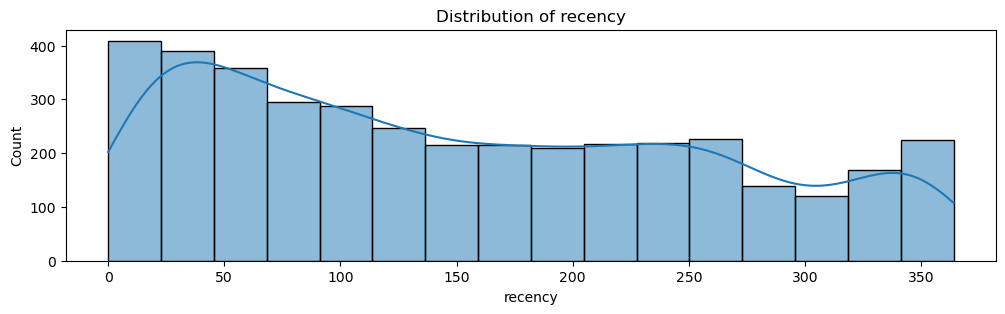

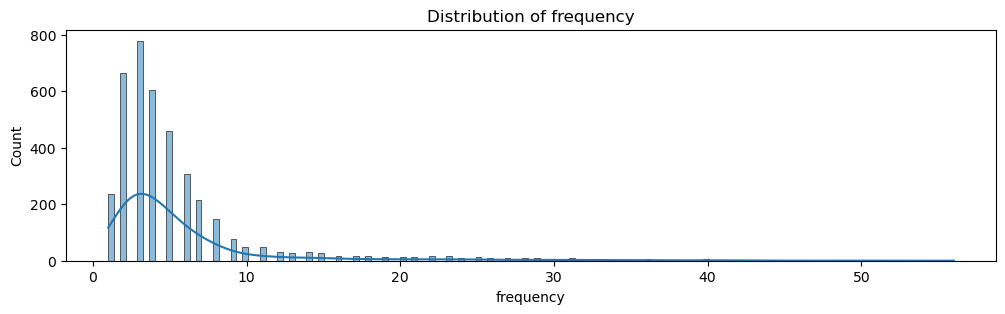

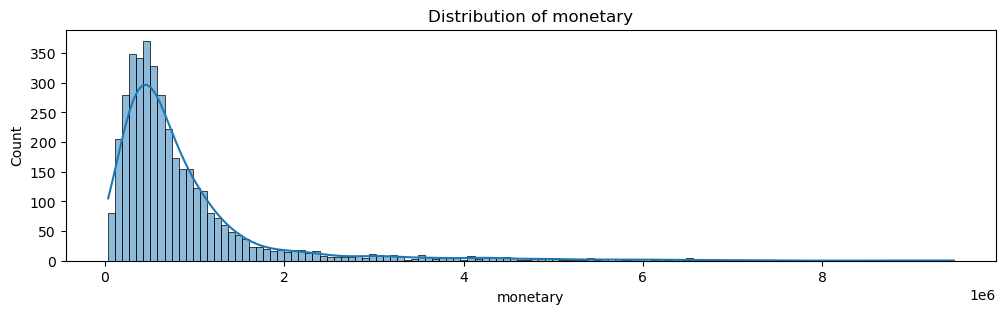

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.histplot(df_rfm[col], ax=ax, kde=True)
    ax.set_title('Distribution of %s' % col)
    plt.show()

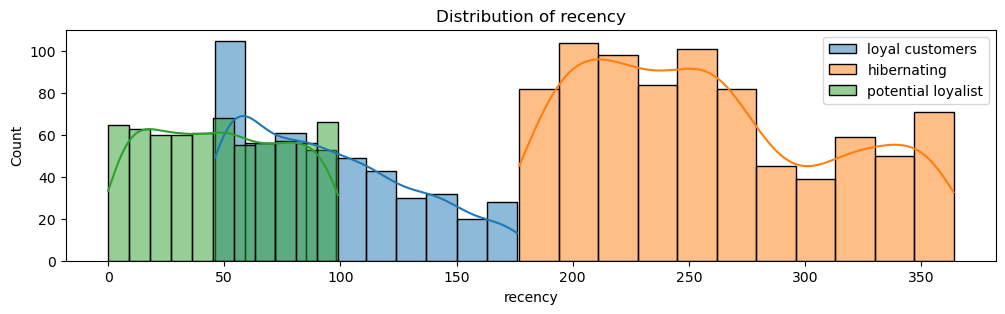

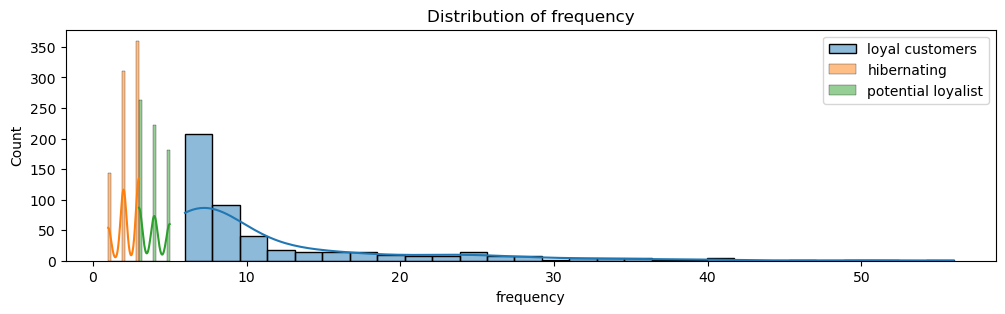

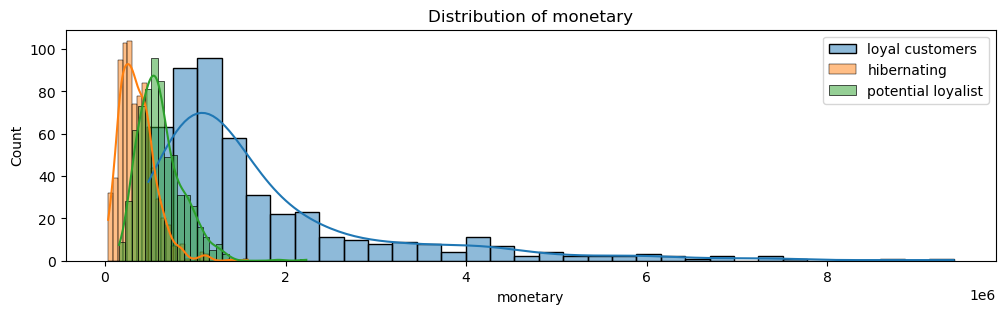

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

colnames = ['recency', 'frequency', 'monetary']
segments = ['loyal customers', 'hibernating', 'potential loyalist']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    for segment in segments:
        sns.histplot(df_rfm[df_rfm['rfm_label']==segment][col], label=segment, kde=True)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()

### Biểu đồ 19a_Python. Số lượng khách hàng phân theo RFM

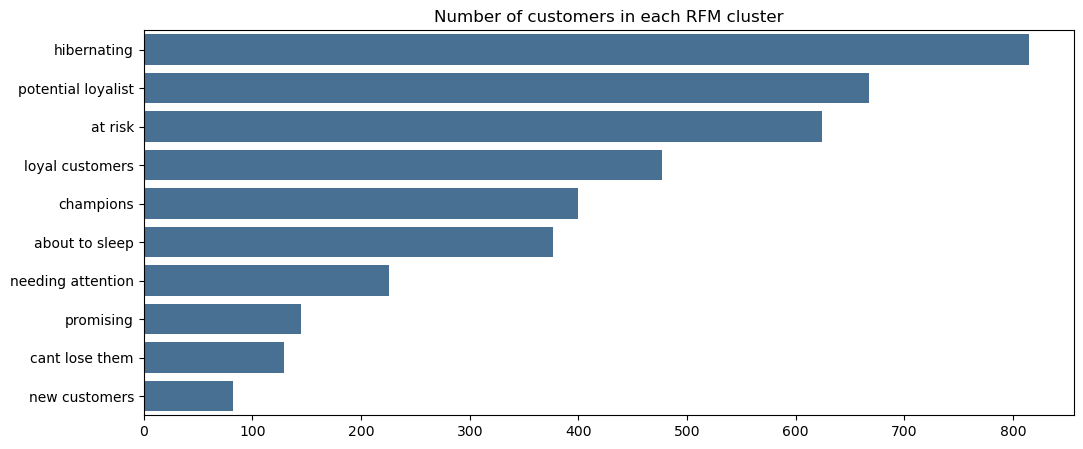

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the count of each category and sort them
rfm_label_counts = df_rfm['rfm_label'].value_counts().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(y='rfm_label', data=df_rfm, color='#3b719f', order=rfm_label_counts)  # Changed x to y
ax.set_title('Number of customers in each RFM cluster')
ax.set_ylabel('')
ax.set_xlabel('')

plt.show()

### Biểu đồ 19b_Python. Tỉ lệ khách hàng phân theo RFM

In [16]:
agg_dict2 = {
    'Mã khách hàng': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'sum'
}

df_analysis = df_rfm.groupby('rfm_label').agg(agg_dict2).sort_values(by='recency').reset_index()
df_analysis.rename({'rfm_label': 'label', 'Mã khách hàng': 'count'}, axis=1, inplace=True)
df_analysis['count_share'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary_share'] = df_analysis['monetary'] / df_analysis['monetary'].sum()
df_analysis['monetary'] = df_analysis['monetary'] / df_analysis['count']

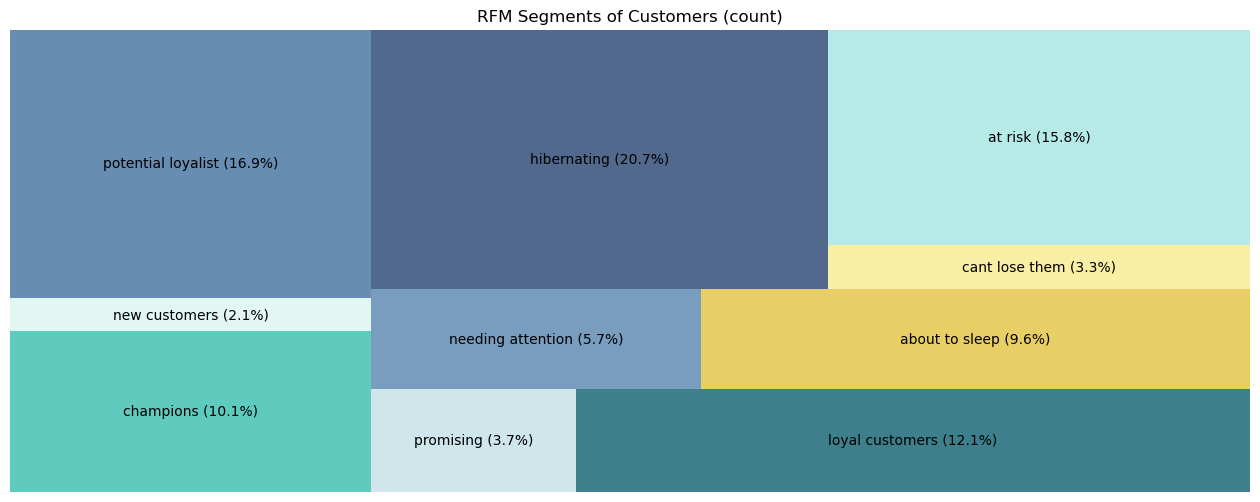

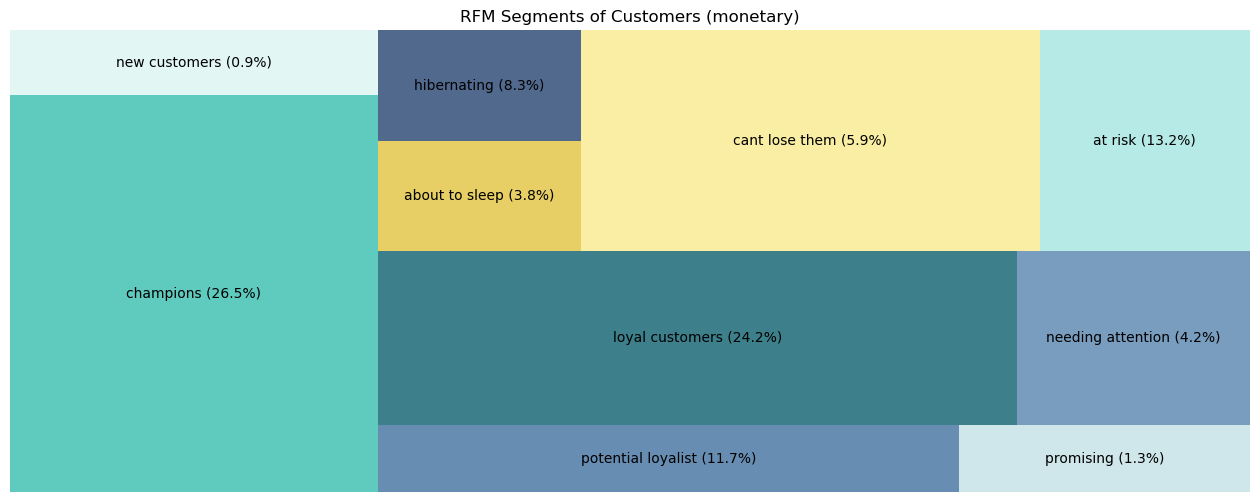

In [17]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + '_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,6))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

In [115]:
import pandas as pd

# Read the current data
treemap_data = df_analysis[['label', 'count_share']].copy()

# Create a new DataFrame to hold the modified data
modified_data = pd.DataFrame(columns=['label', 'count_share', 'parent'])

# Create a new row for the "Overall" category
overall_row = {'label': 'Overall', 'count_share': None, 'parent': None}
modified_data = pd.concat([modified_data, pd.DataFrame([overall_row])], ignore_index=True)

# Update the "parent" column for each segment
treemap_data['parent'] = 'Overall'

# Concatenate the modified data and the original data
modified_data = pd.concat([modified_data, treemap_data[['label', 'count_share', 'parent']]], ignore_index=True)

# Save the modified data to a new CSV file
modified_data.to_csv("../data/rfm.csv", index=False)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\496686787.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  modified_data = pd.concat([modified_data, treemap_data[['label', 'count_share', 'parent']]], ignore_index=True)


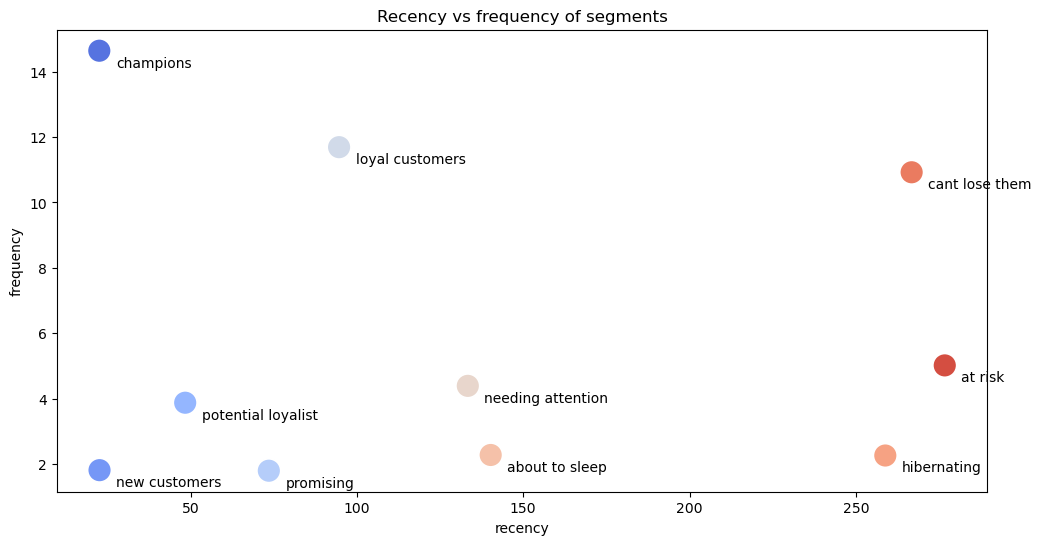

In [18]:
palette = sns.color_palette("coolwarm", 10)

fig, ax = plt.subplots(figsize=(12,6))
plot = sns.scatterplot(x='recency', y='frequency', data=df_analysis, hue='label', s=300, palette=palette)

for i in range(len(df_analysis)):
     plot.text(df_analysis['recency'][i]+5,
               df_analysis['frequency'][i]-0.5,
               df_analysis['label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Recency vs frequency of segments')
ax.get_legend().remove()
plt.show()

# <font color='#0D3AA9'>ANALYSIS</font>


## Kích thước của mỗi PKKH

In [19]:
segment_size = store.groupby(['Mã PKKH'])['Mã khách hàng'].size().reset_index()
segment_size

Mã PKKH  Mã khách hàng
0      A1           9807
1      A2           3616
2      A3           2493
3      B1           2064
4      B2           1102
5      B3            922
6      C1           1596
7      C2            904
8      C3            164

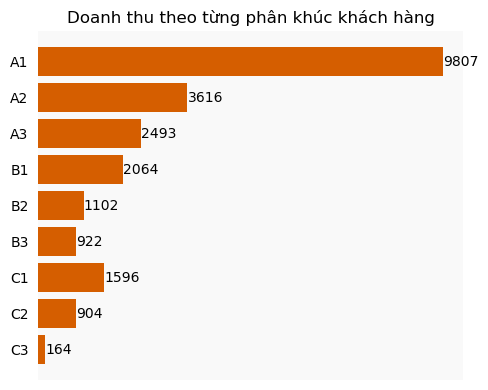

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 4))
ax.set_facecolor(color="#f9f9f9")

segment_size = segment_size.sort_values('Mã PKKH', ascending=False)
bars = ax.barh(segment_size['Mã PKKH'], segment_size['Mã khách hàng'], color='#d55e00')

for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() + 0.5, i, f'{bar.get_width()}', ha='left', va='center')

ax.set_title('Doanh thu theo từng phân khúc khách hàng')

ax.spines[:].set_visible(False)
ax.xaxis.set_visible(False)

ax.tick_params(bottom=False, left=False, top=False, right=False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()


**INSIGHTS:**

Lượng khách hàng chủ đạo, quan tâm chính đến sức khỏe, thể hình là tệp khách hàng chính của cửa hàng bán thực phẩm healthy, nổi bật là nhóm A1 - Huấn luyện viên thể hình, giáo viên yoga, nghề liên quan đến vóc dáng.

Cần phát triển những chiến lược cater to mối quan tâm của những người đi yoga, gym, đó là hiệu quả về giữ dáng hoặc ít nhất là snacking không gây tăng cân, tích mỡ. Những người thuộc nhóm này cũng có những mối quan tâm về sức khỏe tinh thần, wellness, có thể phát triển các chiến lược content liên quan.

Nhóm này vừa đi làm vừa quan tâm đến sức khỏe, đi gym, đi yoga đều --> bận rộn, kỉ luật hơn --> cần sự tiện lợi trong sử dụng, tiện lợi cho meal prep, dễ tích hợp vào thói quen hàng ngày.

## Phân loại các khách hàng theo từng nhóm với cấu trúc 60/30/10

In [21]:
rev_by_segment = store.groupby(['Mã PKKH', 'Mô tả Phân Khúc Khách hàng'])['Thành tiền'].sum().reset_index()
total_revenue = store['Thành tiền'].sum()
rev_by_segment['Phần trăm'] = round(rev_by_segment['Thành tiền'] / total_revenue, 2)

rev_by_segment = rev_by_segment.sort_values(by='Phần trăm', ascending=False)
rev_by_segment['Cumulative Percentage'] = rev_by_segment['Phần trăm'].cumsum()

rev_by_segment['Category'] = np.where(rev_by_segment['Cumulative Percentage'] <= 0.6, '0.6',
                                     np.where(rev_by_segment['Cumulative Percentage'] <= 0.9, '0.3', '0.1'))

rev_by_segment

Mã PKKH                         Mô tả Phân Khúc Khách hàng  Thành tiền  \
0      A1  Huấn luyện viên thể hình, giáo viên yoga, nghề...  1555807000   
1      A2                      Người đi làm tại gia, nội trợ   522024000   
2      A3                                         Mẹ bỉm sữa   405862000   
3      B1  Nhân viên văn phòng, công việc tự do (Chưa kết...   290199000   
6      C1  CBCNV nhà nước, quản lý quan tâm sức khỏe tuổi...   240020000   
4      B2                                Học sinh, sinh viên   167406000   
5      B3  Cán bộ, nhân viên, quản lý, công việc tự do (Đ...   139353000   
7      C2  CBCNV nhà nước, quản lý quan tâm sản phẩm cho ...   135942000   
8      C3  Trưởng phòng, quản lý, cấp cao mua làm quà tặn...    34018000   

   Phần trăm  Cumulative Percentage Category  
0       0.45                   0.45      0.6  
1       0.15                   0.60      0.6  
2       0.12                   0.72      0.3  
3       0.08                   0.80      0.3  
6       0.07                   0.87      0.3  
4       0.05                   0.92      0.1  
5       0.04                   0.96      0.1  
7       0.04                   1.00      0.1  
8       0.01                   1.01      0.1

**INSIGHTS:**

Toàn bộ nhóm A, và B1, C1 đóng góp vào 90% doanh thu.
Nên tập trung nguồn lực để phục vụ nhóm khách hàng này.


Đối với nhóm thuộc 0.1, có thể không cần đầu tư quá nhiều cho việc phát triển các campaign hay sản phẩm phục vụ nhu cầu của họ.

### Doanh thu của từng phân khúc khách hàng

### Biểu đồ 2c_Python. Doanh thu theo phân khúc khách hàng

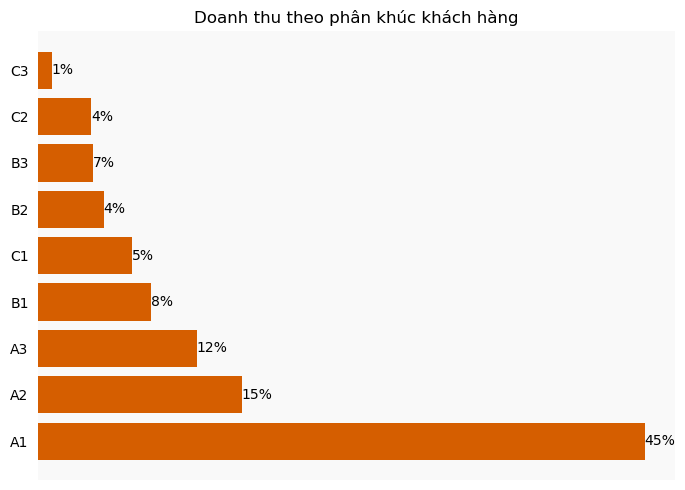

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))
ax.set_facecolor(color="#f9f9f9")

bars = ax.barh(rev_by_segment['Mã PKKH'], rev_by_segment['Thành tiền'], color='#d55e00')

for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() + 0.5, i,
            f"{int(round(rev_by_segment.loc[i, 'Phần trăm']*100))}%",
            ha='left',
            va='center')
ax.set_title('Doanh thu theo phân khúc khách hàng')

ax.spines[:].set_visible(False)
ax.xaxis.set_visible(False)
ax.tick_params(bottom=False, left=False, top=False, right=False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()

## Năm qua, mặt hàng nào tạo ra doanh thu tốt nhất? Mặt hàng nào tạo ra doanh thu kém nhất?

In [23]:
import numpy as np
rev_by_item = store.groupby(['Tên nhóm hàng','Tên mặt hàng'])['Thành tiền'].sum().reset_index()
total_revenue = store['Thành tiền'].sum()
rev_by_item['Phần trăm'] = round(rev_by_item['Thành tiền'] / total_revenue, 2)

rev_by_item = rev_by_item.sort_values(by='Thành tiền', ascending=False)
rev_by_item['Cumulative Percentage'] = rev_by_item['Phần trăm'].cumsum()

rev_by_item['Pareto Category'] = np.where(rev_by_item['Cumulative Percentage'] <= 0.6, '0.6',
                                     np.where(rev_by_item['Cumulative Percentage'] <= 0.9, '0.3', '0.1'))

rev_by_item

Tên nhóm hàng                                       Tên mặt hàng  \
18   Hạt dinh dưỡng                                            Granola   
24      Sữa Organic                       Sữa nghệ Amilac Milk Organic   
12  Gia vị ăn kiêng                                Bơ đậu phộng Skippy   
22      Sữa Organic               Sữa Tươi Hữu Cơ TH True Milk Organic   
13  Gia vị ăn kiêng                                 Đường hộp ăn kiêng   
0     Bánh ăn kiêng                                      Bánh Biscotti   
25      Sữa Organic              Sữa óc chó hạnh nhân đậu đen Hàn Quốc   
21      Sữa Organic                  Sữa 9 loại hạt Vinamilk Super Nut   
20   Hạt dinh dưỡng                                      Hạt hạnh nhân   
19   Hạt dinh dưỡng                                        Hạt chia Úc   
4     Bánh ăn kiêng  Bánh ngũ cốc hữu cơ Annie's organic chewy gran...   
6       Bột ngũ cốc                        Bột ngũ cốc hàn quốc Damtuh   
27    Thực phẩm khô                                        Bún ngũ sắc   
10      Bột ngũ cốc                     Ngũ cốc Sấy khô Calbee (trắng)   
17  Hoa quả sấy khô                                Táo đỏ khô Hàn Quốc   
11      Bột ngũ cốc                        Ngũ cốc Sấy khô Calbee (đỏ)   
3     Bánh ăn kiêng                               Bánh mì hoa cúc pháp   
16  Hoa quả sấy khô                                      Nho khô 3 màu   
14  Hoa quả sấy khô                                 Chà là nguyên cành   
26    Thực phẩm khô                                        Bún gạo lứt   
29    Thực phẩm khô                                   Nui ngũ sắc Fuma   
30    Thực phẩm khô                                        Phở gạo lứt   
5     Bánh ăn kiêng                                  Bánh điều ngũ cốc   
31    Thực phẩm khô                                           Yến mạch   
1     Bánh ăn kiêng                                Bánh chuối yến mạch   
23      Sữa Organic                                   Sữa gạo Hàn Quốc   
15  Hoa quả sấy khô                              Khoai dẻo không đường   
7       Bột ngũ cốc                Ngũ Cốc Hồn Hợp Familia Bio Organic   
28    Thực phẩm khô                                  Miến rau câu keto   
2     Bánh ăn kiêng                            Bánh gạo lứt nguyên hạt   
9       Bột ngũ cốc                                      Ngũ cốc Navan   
8       Bột ngũ cốc                Ngũ Cốc Yến Mạch Hạnh Nhân Hạt Chia   

    Thành tiền  Phần trăm  Cumulative Percentage Pareto Category  
18   483900000       0.14                   0.14             0.6  
24   218250000       0.06                   0.20             0.6  
12   205320000       0.06                   0.26             0.6  
22   180496000       0.05                   0.31             0.6  
13   160380000       0.05                   0.36             0.6  
0    151320000       0.04                   0.40             0.6  
25   143375000       0.04                   0.44             0.6  
21   142560000       0.04                   0.48             0.6  
20   139360000       0.04                   0.52             0.6  
19   137940000       0.04                   0.56             0.6  
4    128895000       0.04                   0.60             0.6  
6    127725000       0.04                   0.64             0.3  
27   125020000       0.04                   0.68             0.3  
10   104040000       0.03                   0.71             0.3  
17    96660000       0.03                   0.74             0.3  
11    93240000       0.03                   0.77             0.3  
3     92365000       0.03                   0.80             0.3  
16    71625000       0.02                   0.82             0.3  
14    69300000       0.02                   0.84             0.3  
26    65400000       0.02                   0.86             0.3  
29    65230000       0.02                   0.88             0.3  
30    65230000       0.02                   0.90             0.1  
5     61940000       0

In [24]:
rev_by_item.to_csv('../data/rev_by_item.csv', index=False)

In [25]:
rev_by_group = rev_by_item.groupby('Tên nhóm hàng')['Thành tiền'].sum().reset_index()

rev_by_group.to_csv('../data/rev_by_group.csv', index=False)

### Biểu đồ 4c_Python. Doanh thu theo mặt hàng (có Pareto)

Mặt hàng bán tốt nhất là Granola [HDD01], với doanh thu là 483,900,000
Mặt hàng bán tệ nhất là Ngũ Cốc Yến Mạch Hạnh Nhân Hạt Chia [BNC04], với doanh thu là 21,630,000


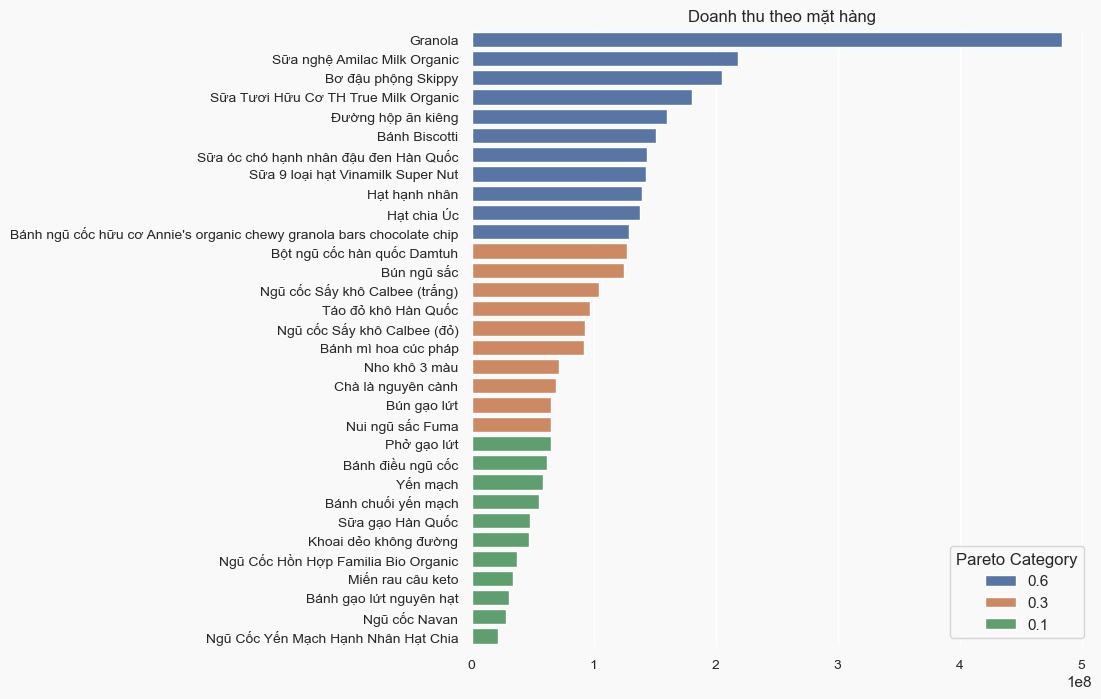

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pivot_table = pd.pivot_table(data= store,
                             index = ['Mã mặt hàng', 'Tên mặt hàng'],
                             values = ['Thành tiền', 'SL'],
                             aggfunc = 'sum')
best_selling = pivot_table[pivot_table['Thành tiền'] == pivot_table['Thành tiền'].max()]
worst_selling = pivot_table[pivot_table['Thành tiền'] == pivot_table['Thành tiền'].min()]

pivot_table = pivot_table.merge(rev_by_item[['Tên mặt hàng', 'Pareto Category']], how='left', on='Tên mặt hàng')

for index, row in best_selling.iterrows():
    print(f"\033[1mMặt hàng bán tốt nhất là {index[1]} [{index[0]}], với doanh thu là {row['Thành tiền']:,.0f}\033[0m")

for index, row in worst_selling.iterrows():
    print(f"\033[1mMặt hàng bán tệ nhất là {index[1]} [{index[0]}], với doanh thu là {row['Thành tiền']:,.0f}\033[0m")

sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#f9f9f9'})

plt.figure(figsize=(8, 8))
ax = sns.barplot(x='Thành tiền', y='Tên mặt hàng', data=pivot_table.sort_values(by='Thành tiền', ascending=False), hue='Pareto Category')
plt.title('Doanh thu theo mặt hàng')

ax.spines[:].set_visible(False)
ax.tick_params(bottom=False, left=False, top=False, right=False, labelsize=10)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

**INSIGHTS:**

Granola là mặt hàng chủ đạo của cửa hàng, chiếm đến 14% doanh thu --> nên ưu tiên tập trung giữ và phát triển sản phẩm này. Đặc biệt, cần đào sâu vào phân tích lí do tại sao mặt hàng này lại nổi trong khách hàng để có thể phát triển những sản phẩm tương tự.

**Một số lí giải về sự phổ biến của Granola:**

1. Giá trị dinh dưỡng cao: Granola thường chứa nhiều ngũ cốc nguyên hạt, hạt, và các thành phần dinh dưỡng như protein, chất xơ, vitamin và khoáng chất, đáp ứng nhu cầu về sức khỏe và dinh dưỡng của người tiêu dùng.

2. Tính tiện lợi và linh hoạt: Có thể được dùng như bữa sáng hoặc snacks. Granola có thể được ăn trực tiếp, trộn với sữa, yaourt, hoặc kết hợp với các món ăn khác, tạo ra nhiều cách thức sử dụng khác nhau.

3. Hương vị đa dạng: Granola có thể được sản xuất với nhiều hương vị và kết hợp khác nhau như chocolate, trái cây, hạt, mật ong, v.v. đáp ứng các sở thích khác nhau của người tiêu dùng.

4. Truyền thông và tiếp thị hiệu quả

5. Nguồn cung đều đặn quanh năm


**Các mặt hàng sữa cũng phổ biến và nằm trong tệp Pareto 0.6, có thể có một số lí giải:**
1. Các khách hàng thường là người có con, mua cho con và gia đình để chăm sóc sức khỏe.

2. Các khách hàng là người lớn tuổi, quan tâm đến sức khỏe bản thân, mà nhóm này thường xuyên có xu hướng "mua sữa uống cho bổ"

3. Nguồn cung đều đặn quanh năm

4. Các hãng sữa mà cửa hàng chọn bán lớn và đáng tin cậy



**Lí giải sự kém phổ biến của các mặt hàng thuộc nhóm 0.1**

1. Có các mặt hàng có thời gian hết hạn nhanh hơn

2. Thị trường còn xa lạ với các mặt hàng này, hương vị hay công dụng chưa được phổ biến rộng rãi

3. Nguồn cung ít hơn, khó sản xuất hơn

4. Không đáp ứng được nhu cầu chính mà các khách hàng quan tâm

Đối với nhóm pareto 0.1, nếu cửa hàng có mong muốn cắt giảm chi phí, có thể ngưng bán *một số* trong những sản phẩm này. Những chi phí sẽ được giảm đi sau khi giảm số mặt hàng đang bán có thể kể đến chi phí tồn kho, chi phí tư vấn của nhân viên, chi phí quảng cáo, chi phí nhập hàng. Không những thế, cửa hàng có thể tập trung tốt hơn vào quảng bá những sản phẩm mang lại doanh thu cao.

Giữ những mặt hàng mà giúp tăng traffic đến cửa hàng (có lượt mua cao, xác suất mua/đơn hàng cao) (phân tích sau).

## Năm qua, nhóm hàng nào tạo ra doanh thu tốt nhất? Nhóm hàng nào tạo ra doanh thu kém nhất?

### Biểu đồ 5c_Python. Doanh thu theo nhóm hàng

Nhóm hàng bán chạy nhất là Hạt dinh dưỡng [HDD], với doanh thu là 761,200,000
Nhóm hàng bán tệ nhất là Hoa quả sấy khô [HQS], với doanh thu là 284,805,000


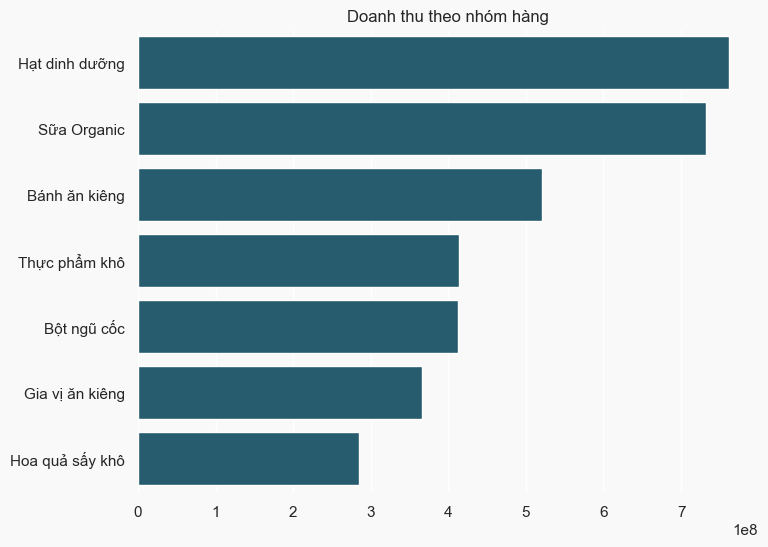

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = pd.pivot_table(data= store,
                             index = ['Mã nhóm hàng', 'Tên nhóm hàng'],
                             values = ['Thành tiền', 'SL'],
                             aggfunc = 'sum')
best_selling = pivot_table[pivot_table['Thành tiền'] == pivot_table['Thành tiền'].max()]
worst_selling = pivot_table[pivot_table['Thành tiền'] == pivot_table['Thành tiền'].min()]

for index, row in best_selling.iterrows():
    print(f"\033[1mNhóm hàng bán chạy nhất là {index[1]} [{index[0]}], với doanh thu là {row['Thành tiền']:,.0f}\033[0m")

for index, row in worst_selling.iterrows():
    print(f"\033[1mNhóm hàng bán tệ nhất là {index[1]} [{index[0]}], với doanh thu là {row['Thành tiền']:,.0f}\033[0m")

plt.figure(figsize=(8, 6))
sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#f9f9f9'})
ax = sns.barplot(x='Thành tiền', y='Tên nhóm hàng', data=pivot_table.sort_values(by='Thành tiền', ascending=False), color='#1a627a')
plt.title('Doanh thu theo nhóm hàng')

ax.spines[:].set_visible(False)
ax.tick_params(bottom=False, left=False, top=False, right=False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

Không ngoài dự đoán, nhóm hàng hạt dinh dưỡng (nhóm hàng của granola) và nhóm hàng sữa có doanh thu dẫn đầu.

## Năm qua, mỗi nhóm hàng chiếm bao nhiêu % doanh số bán?

In [28]:
rev_by_product_group = store.groupby(['Mã nhóm hàng', 'Tên nhóm hàng'])['Thành tiền'].sum().reset_index()
total = rev_by_product_group['Thành tiền'].sum()
rev_by_product_group['Tỉ trọng'] = round(100*(rev_by_product_group['Thành tiền'] / total), 1)
rev_by_product_group = rev_by_product_group.sort_values(by='Tỉ trọng', ascending=False)
rev_by_product_group

Mã nhóm hàng    Tên nhóm hàng  Thành tiền  Tỉ trọng
3          HDD   Hạt dinh dưỡng   761200000      21.8
5          SOG      Sữa Organic   732441000      21.0
0          BAN    Bánh ăn kiêng   520480000      14.9
1          BNC      Bột ngũ cốc   412635000      11.8
6          TPK    Thực phẩm khô   413370000      11.8
2          GVK  Gia vị ăn kiêng   365700000      10.5
4          HQS  Hoa quả sấy khô   284805000       8.2

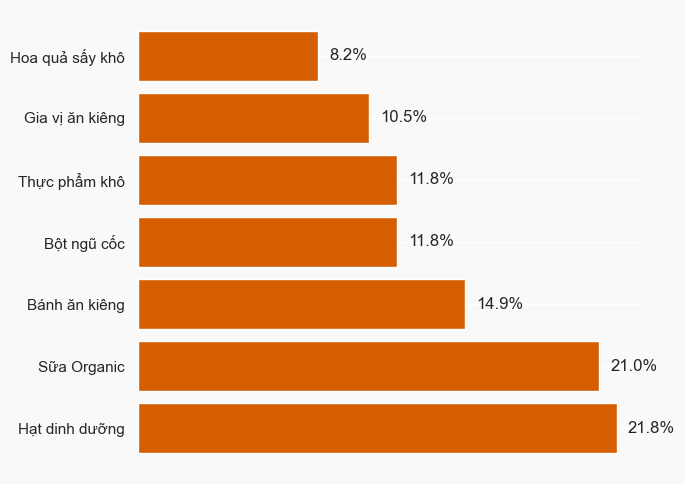

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))
ax.set_facecolor(color="#f9f9f9")

bars = ax.barh(rev_by_product_group['Tên nhóm hàng'], rev_by_product_group['Tỉ trọng'], color='#d55e00')

for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() + 0.5, i, f'{bar.get_width()}%', ha='left', va='center')


ax.spines[:].set_visible(False)
ax.xaxis.set_visible(False)
ax.tick_params(bottom=False, left=False, top=False, right=False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()


## Năm qua, tháng nào bán tốt nhất? Tháng nào bán kém nhất?

### Biểu đồ 1c_Python. Doanh thu theo tháng

Tháng bán chạy nhất là tháng 11 , với doanh thu là 489,873,000
Tháng bán tệ nhất là tháng 02 , với doanh thu là 100,949,000


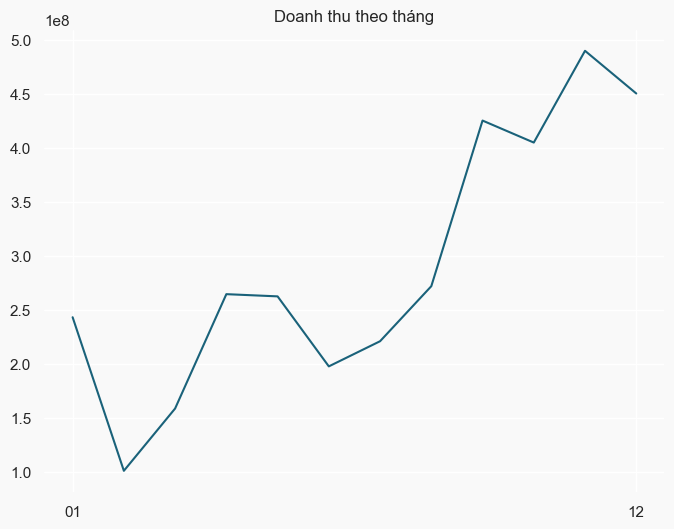

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = pd.pivot_table(data= store,
                             index = ['Month'],
                             values = ['Thành tiền', 'SL'],
                             aggfunc = 'sum')
best_selling = pivot_table[pivot_table['Thành tiền'] == pivot_table['Thành tiền'].max()]
worst_selling = pivot_table[pivot_table['Thành tiền'] == pivot_table['Thành tiền'].min()]

for index, row in best_selling.iterrows():
    print(f"\033[1mTháng bán chạy nhất là tháng {index} , với doanh thu là {row['Thành tiền']:,.0f}\033[0m")

for index, row in worst_selling.iterrows():
    print(f"\033[1mTháng bán tệ nhất là tháng {index} , với doanh thu là {row['Thành tiền']:,.0f}\033[0m")

plt.figure(figsize=(8, 6))
sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#f9f9f9'})
ax = sns.lineplot(y='Thành tiền', x='Month', data=pivot_table.sort_index(), color='#1a627a')
plt.title('Doanh thu theo tháng')

ax.set_xticks(['01','12'])
ax.spines[:].set_visible(False)
ax.tick_params(bottom=False, left=False, top=False, right=False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

**Giải thích biến động doanh thu theo tháng:**


**Tháng 1:** Đầu năm, khách hàng thường đặt mục tiêu về vóc dáng, nên thường tìm đến sản phẩm lành mạnh. Đây là thời điểm thường có khách hàng mới, khi mỗi năm sẽ có thêm những người mới đặt mục tiêu giảm cân đầu năm lần đầu và bắt đầu đầu tư cho mục tiêu này.


**Tháng 2:** Các quyết tâm bắt đầu giảm đi, cũng như đây là dịp chuẩn bị cho Tết và ăn Tết.


**Tháng 3:** Dư âm Tết thường kéo dài đến tháng 3, thế nên doanh thu chưa tăng lại cao. Đồng thời có một số khách hàng đã chuẩn bị "lấy dáng sau Tết". Không chỉ thế, với những khách hàng mới trải nghiệm sản phẩm lần đầu tiên vào đầu năm đến bây giờ đã trải nghiệm Full chất lượng sản phẩm, đã bắt đầu quay lại.

**Tháng 4 - 5:** Chuẩn bị cho summer body.


**Tháng 6:** Học sinh nghỉ học, đây là thời điểm mọi người muốn ăn chơi, nghỉ hè nên không mua các sản phẩm thức ăn, uống giữ sức khỏe, mà muốn tận hưởng xả láng hơn.


**Tháng 7-8:** Mùa hè vẫn còn, nhu cầu giữ dáng cho summer body vẫn còn.


**Tháng 9:** Học sinh vào học lại, mua các sản phẩm tốt cho sức khỏe cho con đi học.


**Tháng 10:** Không có xúc tác nào khiến doanh thu đặc biệt tăng hay giảm.


**Tháng 11-12:** Dịp ôn thi của học sinh, phụ huynh thường muốn đầu tư cho sức khỏe của con. Đồng thời, giai đoạn các bữa tiệc cuối năm, tiệc Giáng sinh nhiều, mọi người có giảm mua các thực phẩm lành mạnh đi đôi chút --> doanh thu trong tháng 12 có giảm nhưng vẫn cao.



**Nhìn chung,** pattern tăng cao vào cuối năm có thể có nguồn gốc từ việc thu hút được nhiều khách hàng mới vào đầu năm, và những khách hàng này thường xuyên quay lại và đặt thêm đơn. Trong khoảng thời gian 1 năm, vẫn chưa hết vòng đời khách hàng, thế nên họ chưa rời đi. Trong suốt cả năm cũng có thêm khách hàng mới và họ có quay lại nhiều lần và chưa rời đi trong năm nay. Số lượng khách hàng quay lại và khách hàng mới xuất hiện along the way tích lũy thêm số khách hàng, dẫn đến tích lũy đơn qua từng tháng trong năm, càng về cuối năm, số đơn càng tăng.

Đối với nhóm **A1**, đây là nhóm mà thường xuyên ưu tiên triệt để cho sức khỏe, vóc dáng và việc này được duy trì đều đặn, thế nên họ sẽ mua nhiều hơn so với nhiều nhóm khác.

## Doanh thu theo tháng của từng phân khúc khách hàng

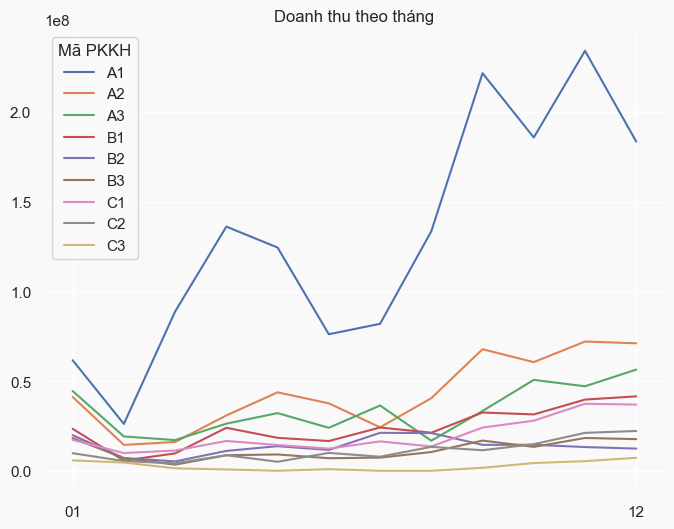

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = pd.pivot_table(data= store,
                             index = ['Mã PKKH', 'Month'],
                             values = ['Thành tiền'],
                             aggfunc = 'sum')
plt.figure(figsize=(8, 6))
sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#f9f9f9'})
ax = sns.lineplot(y='Thành tiền', x='Month', data=pivot_table.sort_index(), hue='Mã PKKH')
plt.title('Doanh thu theo tháng')

ax.set_xticks(['01','12'])
ax.spines[:].set_visible(False)
ax.tick_params(bottom=False, left=False, top=False, right=False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

In [32]:
pkkh_desc = store.groupby(['Mã PKKH'])['Mô tả Phân Khúc Khách hàng'].first().reset_index()
segment_description = pkkh_desc.set_index('Mã PKKH')['Mô tả Phân Khúc Khách hàng'].to_dict()
print(segment_description)

{'A1': 'Huấn luyện viên thể hình, giáo viên yoga, nghề liên quan đến vóc dáng', 'A2': 'Người đi làm tại gia, nội trợ', 'A3': 'Mẹ bỉm sữa', 'B1': 'Nhân viên văn phòng, công việc tự do (Chưa kết hôn)', 'B2': 'Học sinh, sinh viên', 'B3': 'Cán bộ, nhân viên, quản lý, công việc tự do (Đã kết hôn)', 'C1': 'CBCNV nhà nước, quản lý quan tâm sức khỏe tuổi trung niên', 'C2': 'CBCNV nhà nước, quản lý quan tâm sản phẩm cho bệnh lý', 'C3': 'Trưởng phòng, quản lý, cấp cao mua làm quà tặng, biếu gửi'}


### Biểu đồ 3c_Python. Doanh thu hàng tháng theo phân khúc khách hàng

In [33]:
monthly_segment_rev = store.groupby(['Mô tả Phân Khúc Khách hàng', 'Mã PKKH', 'Month'])["Thành tiền"].sum().reset_index()
monthly_segment_rev.to_csv("..\data\monthly_segment_rev.csv", index=False)

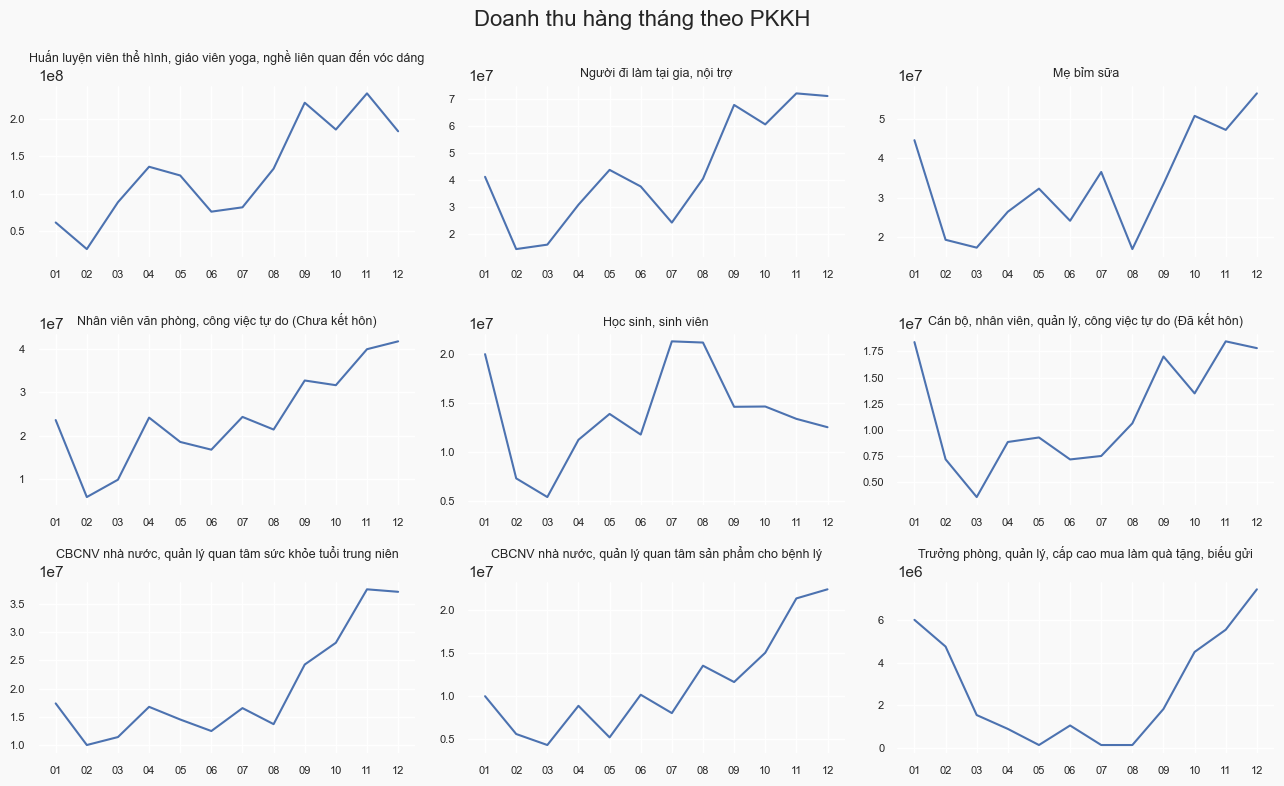

In [34]:
categories = np.sort(store['Mã PKKH'].unique())
category_len = len(categories)
ncols = 3
nrows = math.ceil(category_len / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13,8))
axes = axes.flatten()

for i, cat in enumerate(categories):
  data = pivot_table.loc[cat].reset_index().sort_values('Month', ascending=True)
  sns.lineplot(y='Thành tiền', x='Month', data=data, ax=axes[i])
  axes[i].set_title(f"{segment_description[cat]}", fontsize=9)

  axes[i].spines[:].set_visible(False)
  # axes[i].xaxis.set_visible(False)
  # axes[i].yaxis.set_visible(False)
  axes[i].tick_params(bottom=False, left=False, top=False, right=False, labelsize=8)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

num_plots = category_len
for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes[i])


fig.suptitle('Doanh thu hàng tháng theo PKKH', fontsize=16)
plt.tight_layout()
plt.show()

**Giải thích pattern của từng phân khúc:**

**A1** - *Huấn luyện viên thể hình, giáo viên yoga, nghề liên quan đến vóc dáng*:

Nhóm này quan tâm nhiều nhất đến sức khỏe, vóc dáng nên có đóng góp lớn vào doanh thu qua các tháng. Pattern theo tháng của nhóm này overshadow những nhóm khác, tạo thành pattern theo tháng chính của toàn bộ khách hàng như ở figure đầu tiên.



**A2** - *Người đi làm tại gia, nội trợ*:

Nhóm này khá quan tâm đến ngoại hình, sức khỏe bản thân, tích cực chăm lo cho gia đình. Tháng 1 - new year resolutions. Tháng 2, 3 - Tết. Tháng 4, 5 - bounce back, chuẩn bị summer body. Tháng 6, 7, 8 - nghỉ hè, ăn uống không muốn kiêng khem. Tháng 9 trở đi, con vào học, mua tiếp sức đầu năm cho con và quay về nhịp ăn uống giữ gìn thông thường.

**A3** - *Mẹ bỉm sữa*:

Nhóm này có nhu cầu lấy lại dáng và bổ sung dinh dưỡng sau khi sinh con, đảm bảo sức khỏe cho con bú, tuy nhiên tài chính chưa đủ mạnh bằng các nhóm khác. Tháng 1 - new year resolutions. Tháng 2, 3 - Tết. Tháng 4, 5,6, 7 - bounce back, chuẩn bị summer body. Tháng 8 đi du lịch nghỉ ngơi sẽ rẻ hơn so với mùa du lịch cao điểm đối với nhóm này. Sau khi nghỉ ngơi sẽ tích cực quay lại chăm sóc cho bản thân.

**B1** - *Nhân viên văn phòng, công việc tự do (Chưa kết hôn)*:

Nhóm này về mặt tài chính có phần thong thả hơn, do không phải nuôi gia đình. Trong độ tuổi chưa nuôi gia đình, người thuộc độ tuổi này thường có mối quan tâm về thể hình và sức khỏe cá nhân và có điều kiện để chi tiêu nhiều hơn. Tháng 1 - new year resolutions. Tháng 2, 3 - Tết. Nhóm này không cần phải tranh thủ nghỉ hè vào dịp nghỉ hè của học sinh sinh viên, đồng thời giai đoạn du lịch mùa hè thường vào khoảng tháng 9-10 vì mùa du lịch gần kết thúc, giá sẽ rẻ hơn. Tháng 7-8 (mùa du lịch thông thường), tháng 9-10 có xu hướng giảm nhẹ, có thể vì nhóm này muốn giảm kiêng khem trong chế độ ăn, và tiết kiệm tài chính cho việc du lịch, ăn chơi.

**B2** - *Học sinh, sinh viên*:

Tháng 1 - new year resolutions. Tháng 2, 3 - Tết. Tháng 7, 8 vì được nghỉ hè, về quê với gia đình, nên thoải mái về tài chính hơn so với cuộc sống tự lập trong năm, nên chi tiêu nhiều hơn cho thực phẩm mình thích.



**B3** - *Cán bộ, nhân viên, quản lý, công việc tự do (Đã kết hôn)*:

Giống nhóm nội trợ vì nhu cầu chăm lo cho gia đình, chăm lo cho bản thân, tuy nhiên ở nhóm này thì có thể mua thêm vì nhu cầu biếu xén vào tháng 1, 2, ngày 20/11, giáng sinh, ...


**C1** - *CBCNV nhà nước, quản lý quan tâm sức khỏe tuổi trung niên*:
Quan tâm thường xuyên sức khỏe nên duy trì trong năm. Có thể vì pattern mua lần đầu vào đầu, giữa năm và thường xuyên mua lại --> tăng dần về cuối năm. Đồng thời về mùa đông, nhiều người tuổi này dễ ốm hơn, họ lại càng quan tâm đến sức khỏe và chi tiêu nhiều hơn.

**C2** - *CBCNV nhà nước, quản lý quan tâm sản phẩm cho bệnh lý*:
Giống C1.

**C3** - *Trưởng phòng, quản lý, cấp cao mua làm quà tặng, biếu gửi*:

Các dịp biếu nhiều: Tháng 1,2 - Tết, tháng 9 biếu giáo viên, tháng 10 có 20/10, tháng 11 có 20/11, tháng 12 quà cuối năm, giáng sinh.

## Năm qua, đối với từng tháng, nhóm hàng nào bán tốt nhất? Nhóm hàng nào bán kém nhất?

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = pd.pivot_table(data= store,
                             index = ['Mã nhóm hàng', 'Tên nhóm hàng'],
                             columns = ['Month'],
                             values = ['Thành tiền'],
                             aggfunc = 'sum')

monthly_info = []

for month in pivot_table.columns:
    best_selling_month = pivot_table[month].idxmax()
    worst_selling_month = pivot_table[month].idxmin()

    monthly_info.append({
        'Month': month[1],
        'Best Selling': best_selling_month[1],
        'Best Selling Revenue': pivot_table.loc[best_selling_month, month],
        'Worst Selling': worst_selling_month[1],
        'Worst Selling Revenue': pivot_table.loc[worst_selling_month, month]
    })

monthly_info_df = pd.DataFrame(monthly_info)
monthly_info_df[['Best Selling Revenue', 'Worst Selling Revenue']] = monthly_info_df[['Best Selling Revenue', 'Worst Selling Revenue']].applymap(lambda x: f'{x:,.0f}')

monthly_info_df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\1968217420.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  monthly_info_df[['Best Selling Revenue', 'Worst Selling Revenue']] = monthly_info_df[['Best Selling Revenue', 'Worst Selling Revenue']].applymap(lambda x: f'{x:,.0f}')


Month    Best Selling Best Selling Revenue    Worst Selling  \
0     01  Hạt dinh dưỡng           65,200,000  Gia vị ăn kiêng   
1     02  Hạt dinh dưỡng           29,285,000  Gia vị ăn kiêng   
2     03  Hạt dinh dưỡng           31,625,000  Hoa quả sấy khô   
3     04     Sữa Organic           60,373,000  Hoa quả sấy khô   
4     05     Sữa Organic           63,659,000  Hoa quả sấy khô   
5     06     Sữa Organic           50,425,000  Hoa quả sấy khô   
6     07     Sữa Organic           52,362,000  Hoa quả sấy khô   
7     08  Hạt dinh dưỡng           70,935,000  Hoa quả sấy khô   
8     09  Hạt dinh dưỡng           88,635,000  Hoa quả sấy khô   
9     10  Hạt dinh dưỡng           83,220,000  Hoa quả sấy khô   
10    11     Sữa Organic          108,118,000  Hoa quả sấy khô   
11    12  Hạt dinh dưỡng           99,645,000  Hoa quả sấy khô   

   Worst Selling Revenue  
0             14,175,000  
1              6,545,000  
2             10,325,000  
3             16,900,000  
4             18,755,000  
5             15,700,000  
6             16,205,000  
7             21,115,000  
8             33,625,000  
9             31,490,000  
10            40,925,000  
11            38,880,000

### Biểu đồ 6c_Python. Doanh thu nhóm hàng theo mùa

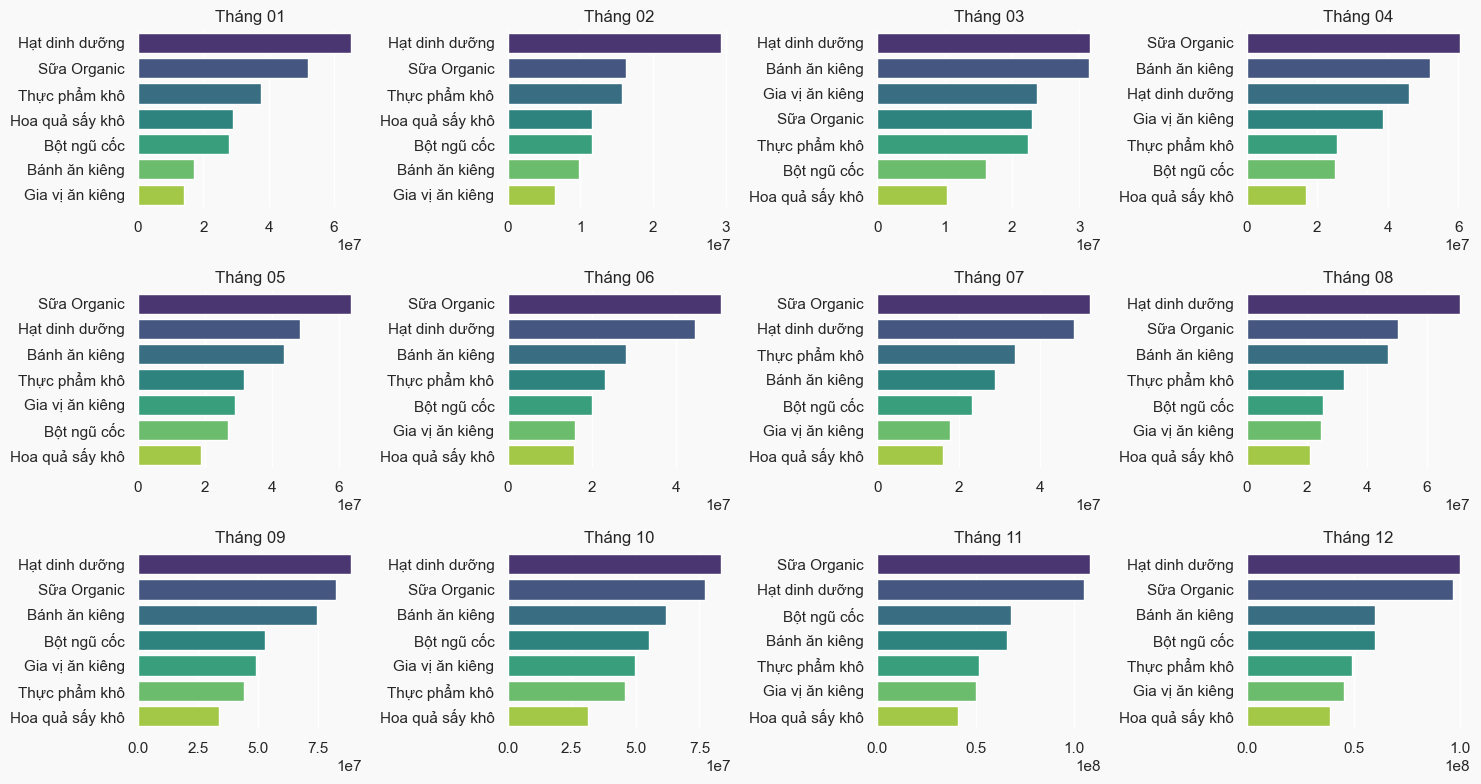

In [36]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

category_len = len(store['Month'].unique())
ncols = 4
nrows = math.ceil(category_len / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,8))
axes = axes.flatten()

for i, month in enumerate(pivot_table.columns):
  data = pivot_table[month].sort_values(ascending=False)
  sns.barplot(y=data.index.get_level_values('Tên nhóm hàng'), x=data, ax=axes[i], hue=data.index.get_level_values('Tên nhóm hàng'), palette="viridis")
  axes[i].set_title(f"Tháng {month[1]}")

  axes[i].spines[:].set_visible(False)
  axes[i].tick_params(bottom=False, left=False, top=False, right=False)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')


num_plots = len(pivot_table.columns)
for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**INSIGHTS:**

Sữa và Hạt dinh dưỡng thay phiên là nhóm hàng bán chạy nhất qua các tháng. Tuy nhiên, trong những tháng thường có giảm chi tiêu thì người dùng vẫn mua nhiều hạt dinh dưỡng, có lẽ vì món này đa dụng, tiện lợi. **Trong tháng Tết (tháng 2),** đa số các nhóm hàng đều kém doanh thu, tuy nhiên nhóm hạt dinh dưỡng vẫn được doanh thu trội hơn hẳn, có lẽ vì khách hàng vẫn mua hạt về dùng cho Tết.

## Năm qua, ở mỗi nhóm hàng, mỗi món hàng (mã hàng) chiếm bao nhiêu % doanh số bán?

In [37]:
rev_item_by_group = store.groupby(['Tên nhóm hàng', 'Tên mặt hàng'])['Thành tiền'].sum().reset_index()
partition = rev_item_by_group.groupby('Tên nhóm hàng')['Thành tiền'].transform('sum')
rev_item_by_group['Tỉ trọng theo nhóm'] = round(100 * (rev_item_by_group['Thành tiền']/partition), 1)
rev_item_by_group = rev_item_by_group.sort_values(['Tên nhóm hàng', 'Tỉ trọng theo nhóm'], ascending=[True, False])
rev_item_by_group.head(10)

Tên nhóm hàng                                       Tên mặt hàng  \
0   Bánh ăn kiêng                                      Bánh Biscotti   
4   Bánh ăn kiêng  Bánh ngũ cốc hữu cơ Annie's organic chewy gran...   
3   Bánh ăn kiêng                               Bánh mì hoa cúc pháp   
5   Bánh ăn kiêng                                  Bánh điều ngũ cốc   
1   Bánh ăn kiêng                                Bánh chuối yến mạch   
2   Bánh ăn kiêng                            Bánh gạo lứt nguyên hạt   
6     Bột ngũ cốc                        Bột ngũ cốc hàn quốc Damtuh   
10    Bột ngũ cốc                     Ngũ cốc Sấy khô Calbee (trắng)   
11    Bột ngũ cốc                        Ngũ cốc Sấy khô Calbee (đỏ)   
7     Bột ngũ cốc                Ngũ Cốc Hồn Hợp Familia Bio Organic   

    Thành tiền  Tỉ trọng theo nhóm  
0    151320000                29.1  
4    128895000                24.8  
3     92365000                17.7  
5     61940000                11.9  
1     55440000                10.7  
2     30520000                 5.9  
6    127725000                31.0  
10   104040000                25.2  
11    93240000                22.6  
7     37440000                 9.1

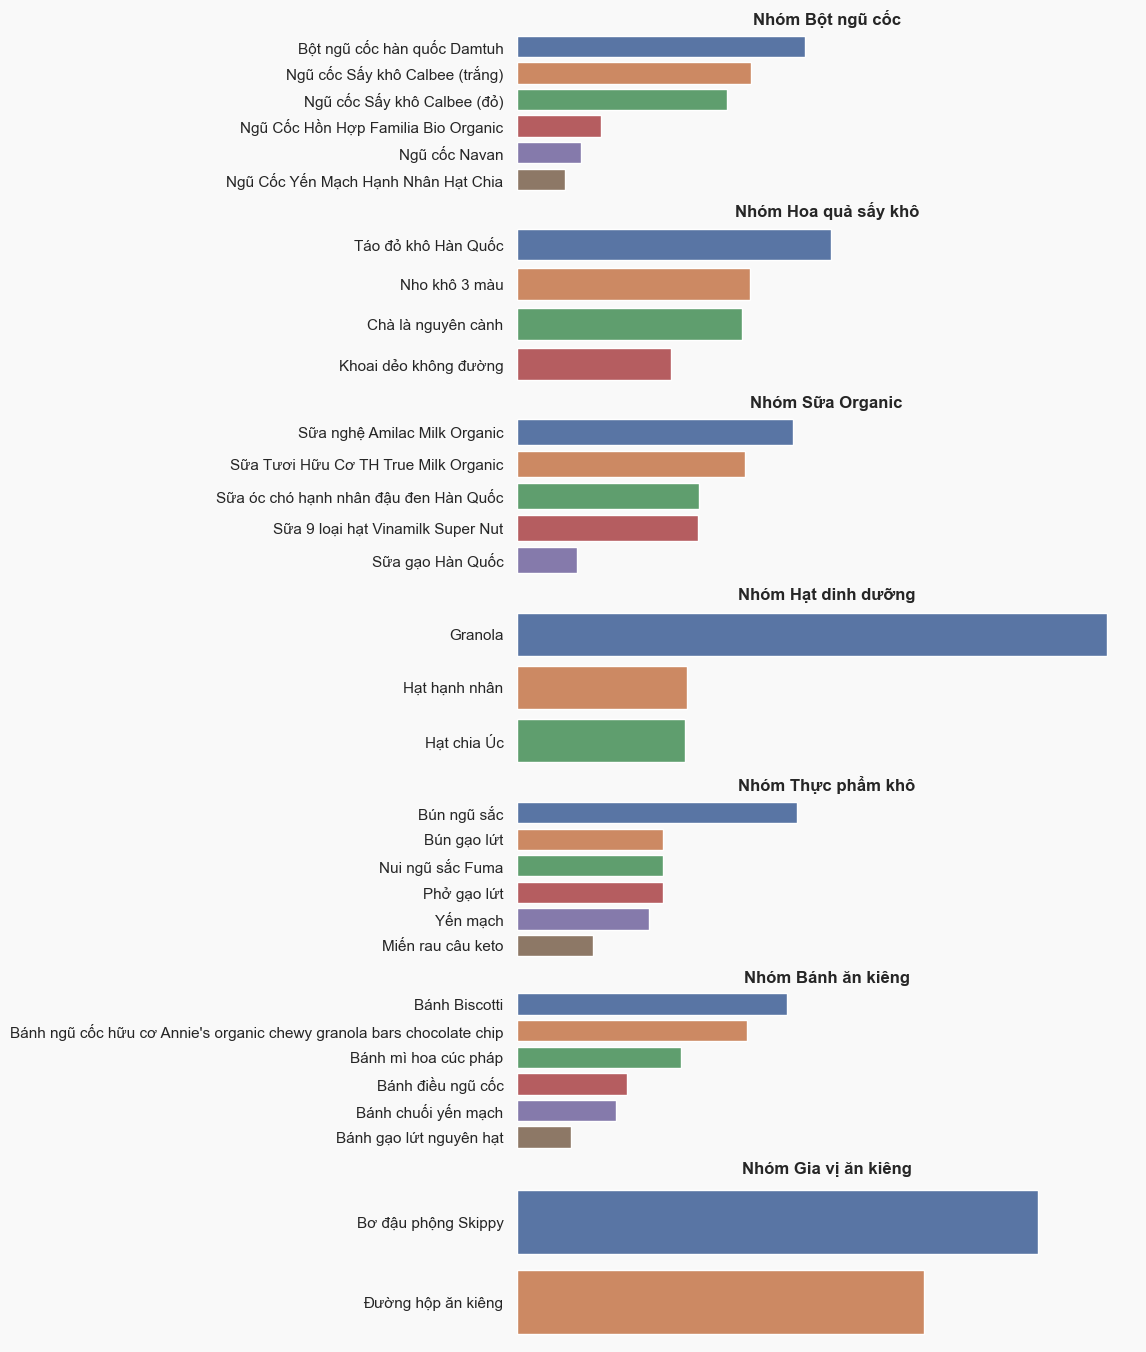

In [38]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

categories = store['Tên nhóm hàng'].unique()
category_len = len(categories)
ncols = 1
nrows = math.ceil(category_len / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,17), sharex=True)
axes = axes.flatten()

for i, cat in enumerate(categories):
  data = rev_item_by_group[rev_item_by_group['Tên nhóm hàng'] == cat]
  sns.barplot(y=data['Tên mặt hàng'], x=data['Tỉ trọng theo nhóm'], ax=axes[i], hue=data['Tên mặt hàng'])
  axes[i].set_title(f"Nhóm {cat}", fontweight="bold")

  axes[i].spines[:].set_visible(False)
  axes[i].xaxis.set_visible(False)
  axes[i].tick_params(bottom=False, left=False, top=False, right=False)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

num_plots = category_len
for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes[i])

plt.show()

**INSIGHTS:**

Có thể nhận thấy, những món hàng phổ biến của mỗi nhóm hàng thường là những cái tên quen thuộc với người dùng, có tính hữu dụng, đa dụng cao. Trong nhóm bánh ăn kiêng, những bánh với shelf life thấp có doanh thu thấp hơn.

## Số lượng tiêu dùng hàng tháng mỗi nhóm hàng của mỗi khách hàng thuộc phân khúc khách hàng

In [39]:
consumtion_per_month_segment = store.groupby(['Mã PKKH', 'Tên nhóm hàng'])['SL'].sum().reset_index()
consumtion_per_month_segment['SL'] = consumtion_per_month_segment['SL']/12
consumtion_per_month_segment


consumtion_per_month_segment = pd.pivot_table(data=store,
                                               index=['Mã PKKH', 'Tên nhóm hàng'],
                                               values=['SL', 'Mã khách hàng'],
                                               aggfunc={'SL': np.sum, 'Mã khách hàng': pd.Series.nunique})
consumtion_per_month_segment['per customer per month'] = consumtion_per_month_segment['SL'] / consumtion_per_month_segment['Mã khách hàng'] / 12
consumtion_per_month_segment

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\4030551347.py:6: FutureWarning: The provided callable <function sum at 0x00000152BF45B2E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  consumtion_per_month_segment = pd.pivot_table(data=store,


Mã khách hàng    SL  per customer per month
Mã PKKH Tên nhóm hàng                                               
A1      Bánh ăn kiêng              692  2679                0.322616
        Bột ngũ cốc                451   867                0.160200
        Gia vị ăn kiêng            497  1092                0.183099
        Hoa quả sấy khô            492  1010                0.171070
        Hạt dinh dưỡng             694  2648                0.317963
        Sữa Organic                480   926                0.160764
        Thực phẩm khô              652  2464                0.314928
A2      Bánh ăn kiêng              295   428                0.120904
        Bột ngũ cốc                324   511                0.131430
        Gia vị ăn kiêng            204   274                0.111928
        Hoa quả sấy khô            244   331                0.113046
        Hạt dinh dưỡng             284   416                0.122066
        Sữa Organic                322   482                0.124741
        Thực phẩm khô              484  1569                0.270145
A3      Bánh ăn kiêng              228   301                0.110015
        Bột ngũ cốc                224   309                0.114955
        Gia vị ăn kiêng             97   108                0.092784
        Hoa quả sấy khô            186   229                0.102599
        Hạt dinh dưỡng             232   320                0.114943
        Sữa Organic                265   382                0.120126
        Thực phẩm khô              424  1120                0.220126
B1      Bánh ăn kiêng              236   345                0.121822
        Bột ngũ cốc                 40    40                0.083333
        Gia vị ăn kiêng             50    51                0.085000
        Hoa quả sấy khô            254   353                0.115814
        Hạt dinh dưỡng             279   427                0.127539
        Sữa Organic                248   366                0.122984
        Thực phẩm khô              331   681                0.171450
B2      Bánh ăn kiêng              157   176                0.093418
        Gia vị ăn kiêng             19    19                0.083333
        Hoa quả sấy khô            183   217                0.098816
        Hạt dinh dưỡng             289   397                0.114475
        Sữa Organic                166   193                0.096888
        Thực phẩm khô              167   210                0.104790
B3      Bánh ăn kiêng              138   175                0.105676
        Bột ngũ cốc                 18    19                0.087963
        Hoa quả sấy khô            186   244                0.109319
        Hạt dinh dưỡng             189   258                0.113757
        Sữa Organic                120   137                0.095139
        Thực phẩm khô               96   132                0.114583
C1      Bánh ăn kiêng              113   128                0.094395
        Bột ngũ cốc                193   235                0.101468
        Gia vị ăn kiêng             82    87                0.088415
        Hoa quả sấy khô             58    62                0.089080
        Hạt dinh dưỡng             204   266                0.108660
        Sữa Organic                258   360                0.116279
        Thực phẩm khô              286   527                0.153555
C2      Bánh ăn kiêng               36    38                0.087963
        Bột ngũ cốc                123   145                0.098238
        Gia vị ăn kiêng             36    37                0.085648
        Hoa quả sấy khô             27    28                0.086420
        Hạt dinh dưỡng             119   142                0.099440
        Sữa Organic                163   215                0.109918
        Thực phẩm khô              178   327                0.153090
C3      Bánh ăn kiêng                3     3                0.083333
        Bột ngũ cốc                 31    32                0.086022
        Hoa quả sấy khô

### Biểu đồ 23c_Python. Doanh thu của nhóm hàng theo từng Phân khúc khách hàng

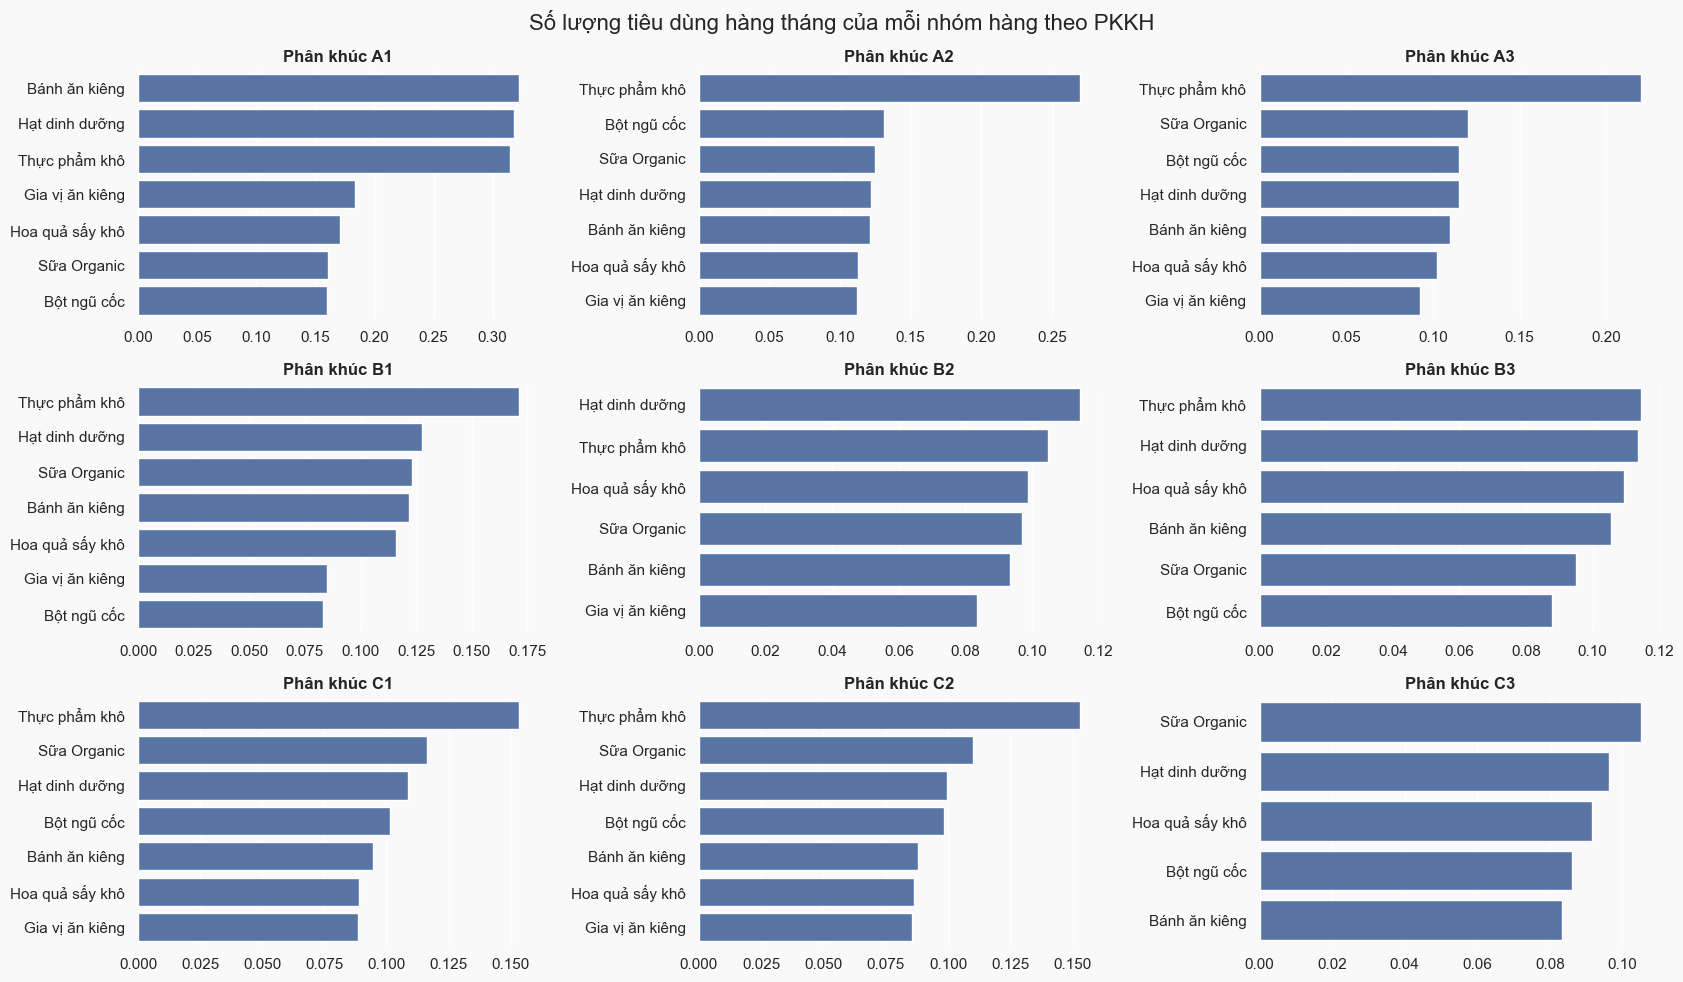

In [40]:
categories = np.sort(store['Mã PKKH'].unique())
category_len = len(categories)
ncols = 3
nrows = math.ceil(category_len / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(17,10))
axes = axes.flatten()

for i, cat in enumerate(categories):
  data = consumtion_per_month_segment.loc[cat].sort_values('per customer per month', ascending=False)
  sns.barplot(data=data, y='Tên nhóm hàng', x='per customer per month', ax=axes[i])
  axes[i].set_title(f"Phân khúc {cat}", fontweight="bold")

  axes[i].spines[:].set_visible(False)
  # axes[i].xaxis.set_visible(False)
  # axes[i].yaxis.set_visible(False)
  axes[i].tick_params(bottom=False, left=False, top=False, right=False)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

num_plots = category_len
for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes[i])


fig.suptitle('Số lượng tiêu dùng hàng tháng của mỗi nhóm hàng theo PKKH', fontsize=16)
plt.tight_layout()
plt.show()

**Giải thích pattern của từng phân khúc:**

**A1** - *Huấn luyện viên thể hình, giáo viên yoga, nghề liên quan đến vóc dáng*:

Nhóm này mua nhiều bánh ăn kiêng, hạt, thực phẩm khô (bún, mì ngũ sắc,...) hàng tháng hơn so với những loại khác. Có thể giải thích là gia vị nhìn chung không cần phải mua số lượng lớn cùng lúc. Hoa quả sấy, sữa thì thường có đường và không nằm trong chế độ ăn thông thường của những người chuộng vóc dáng. Bột ngũ cốc có số lượng hàng tháng nhỏ có thể do kích thước của 1 đơn vị mua lớn, ví dụ như một gói Ngũ Cốc Hữu Cơ Hỗn Hợp - Familia BIO Organic đã có khối lượng 375g, giá thành cũng khá cao.


**A2** - *Người đi làm tại gia, nội trợ*:

Mua nhiều thực phẩm khô (miến, phở,...) để nấu nướng cho gia đình. Đây cũng là những mặt hàng mà kích thước một mặt hàng là 500gr hoặc 1 kí, nhưng tiêu dùng thường xuyên nên số lượng tiêu dùng hàng tháng nhiều.

**A3** - *Mẹ bỉm sữa*:

Mua nhiều thực phẩm khô (miến, phở,...) để nấu nướng cho gia đình. Đây cũng là những mặt hàng mà kích thước một mặt hàng là 500gr hoặc 1 kí, nhưng tiêu dùng thường xuyên nên số lượng tiêu dùng hàng tháng nhiều.

**B1** - *Nhân viên văn phòng, công việc tự do (Chưa kết hôn)*:

Mua nhiều thực phẩm khô (miến, phở,...) hơn so với những nhóm hàng khác, để nấu nướng cho bản thân.

**B2** - *Học sinh, sinh viên*:

Không có nhu cầu nấu ăn cầu kì, thực phẩm khô rank 2, hạt dinh dưỡng có thể work as a quick snack, phù hợp với lối sống sinh viên.



**B3** - *Cán bộ, nhân viên, quản lý, công việc tự do (Đã kết hôn)*:

**C1** - *CBCNV nhà nước, quản lý quan tâm sức khỏe tuổi trung niên*:

**C2** - *CBCNV nhà nước, quản lý quan tâm sản phẩm cho bệnh lý*:

B3 --> C2 có cùng pattern tương tự về thực phẩm khô à sữa.

**C3** - *Trưởng phòng, quản lý, cấp cao mua làm quà tặng, biếu gửi*:

Biếu theo dịp trong năm nên tính ra số lượng chi tiêu hàng tháng ít. Nhóm này chưa có chi tiêu cho thực phẩm khô, có thể vì bao bì sản phẩm chưa phù hợp cho biếu tặng.

## Khoảng cách giữa lần đầu và lần cuối mua hàng trung bình của mỗi khách hàng theo phân khúc khách hàng

In [41]:
first_purchase_dates = store.groupby('Mã khách hàng')['Date'].min()
last_purchase_dates = store.groupby('Mã khách hàng')['Date'].max()

time_diff = (last_purchase_dates - first_purchase_dates)


customer_segments = store.groupby('Mã khách hàng')['Mã PKKH'].first()
time_diff_segments = pd.merge(customer_segments, time_diff, left_index=True, right_index=True)
time_diff_segments['Date'] = pd.to_timedelta(time_diff_segments['Date'])
time_diff_segments['Total Days'] = round(time_diff_segments['Date'].dt.total_seconds() / (24 * 3600), 1)
neat_time_diff_segments = time_diff_segments.copy().reset_index()
neat_time_diff_segments = neat_time_diff_segments[['Mã khách hàng', 'Total Days']].copy()
neat_time_diff_segments.to_csv('first_last_day_diff.csv', encoding='utf-8')

average_time_diff_segment = time_diff_segments.groupby('Mã PKKH')['Total Days'].mean().reset_index()
average_time_diff_segment[average_time_diff_segment['Total Days'] != 0]

Mã PKKH  Total Days
0      A1   49.849682
1      A2   16.397059
2      A3    9.324056
3      B1   11.723404
4      B2    1.618644
5      B3    2.145401
6      C1    7.817978
7      C2    7.345763
8      C3    0.593407

### Biểu đồ 9d_Python. Khoảng cách trung bình giữa ngày đầu và ngày cuối mua hàng của mỗi khách hàng, theo Phân khúc khách hàng

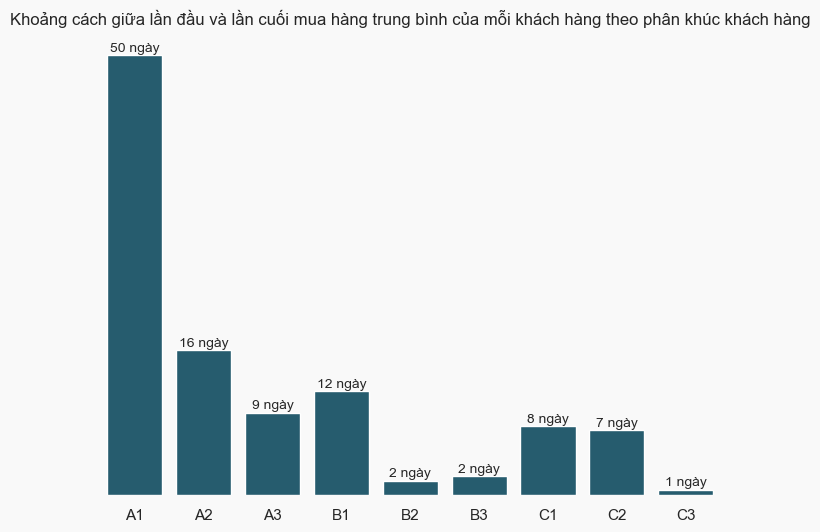

In [42]:
plt.figure(figsize=(8, 6))
sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#f9f9f9'})
ax = sns.barplot(x='Mã PKKH', y='Total Days', data=average_time_diff_segment, color='#1a627a')
plt.title('Khoảng cách giữa lần đầu và lần cuối mua hàng trung bình của mỗi khách hàng theo phân khúc khách hàng')

for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{round(value)} ngày',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize = 10)

ax.spines[:].set_visible(False)
ax.yaxis.set_visible(False)
ax.tick_params(bottom=False, left=False, top=False, right=False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

Chứng tỏ vòng đời của khách hàng trong năm khá ngắn, khách hàng không quay lại nhiều lần liên tục trong năm như chúng ta đã dự đoán trước đó.

==> Doanh nghiệp này nên quan tâm hơn đến các đãi ngộ giúp duy trì sự trung thành khách hàng.

Đây cũng có thể là đặc thù của sản phẩm, khi các sản phẩm mà cửa hàng này bán có tính đại trà khá cao, khách hàng không ưu tiên nhiều cho một cửa hàng cụ thể để trở thành khách hàng trung thành hay ưu tiên trong mỗi lần mua.

In [43]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def make_hist_subplots(df, specific_df_to_filter, col, value, bin_width, num_bins, title_str, sharex=True):
  categories = np.sort(df[col].unique())
  category_len = len(categories)
  ncols = 3
  nrows = math.ceil(category_len / ncols)

  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(17,8), sharex=sharex)
  axes = axes.flatten()

  for i, cat in enumerate(categories):
    subplot_df = specific_df_to_filter[specific_df_to_filter[col] == cat]
    subplot_df = subplot_df[subplot_df[value] != 0]
    if bin_width:
      bin_width = bin_width
      data_range = subplot_df[value].max() - subplot_df[value].min()
      num_bins = int(np.ceil(data_range / bin_width))
    else:
      num_bins = num_bins
    sns.histplot(subplot_df, bins=num_bins, kde=True, color='salmon', ax=axes[i])
    axes[i].set_title(f"{cat}: {segment_description[cat]}")


    axes[i].spines[:].set_visible(False)
    # axes[i].xaxis.set_visible(False)
    axes[i].yaxis.set_visible(False)
    axes[i].tick_params(bottom=False, left=False, top=False, right=False)
    # axes[i].set_xlabel('')
    axes[i].set_ylabel('')

  num_plots = category_len
  for i in range(num_plots, nrows * ncols):
      fig.delaxes(axes[i])

  fig.suptitle(title_str)
  plt.tight_layout()
  plt.show()

### Biểu đồ 9c_Python. Phân phối khoảng cách giữa ngày đầu và ngày cuối mua hàng của những khách hàng có mua lặp lại, theo Phân khúc khách hàng (trục X là số ngày, trục Y là số khách hàng)

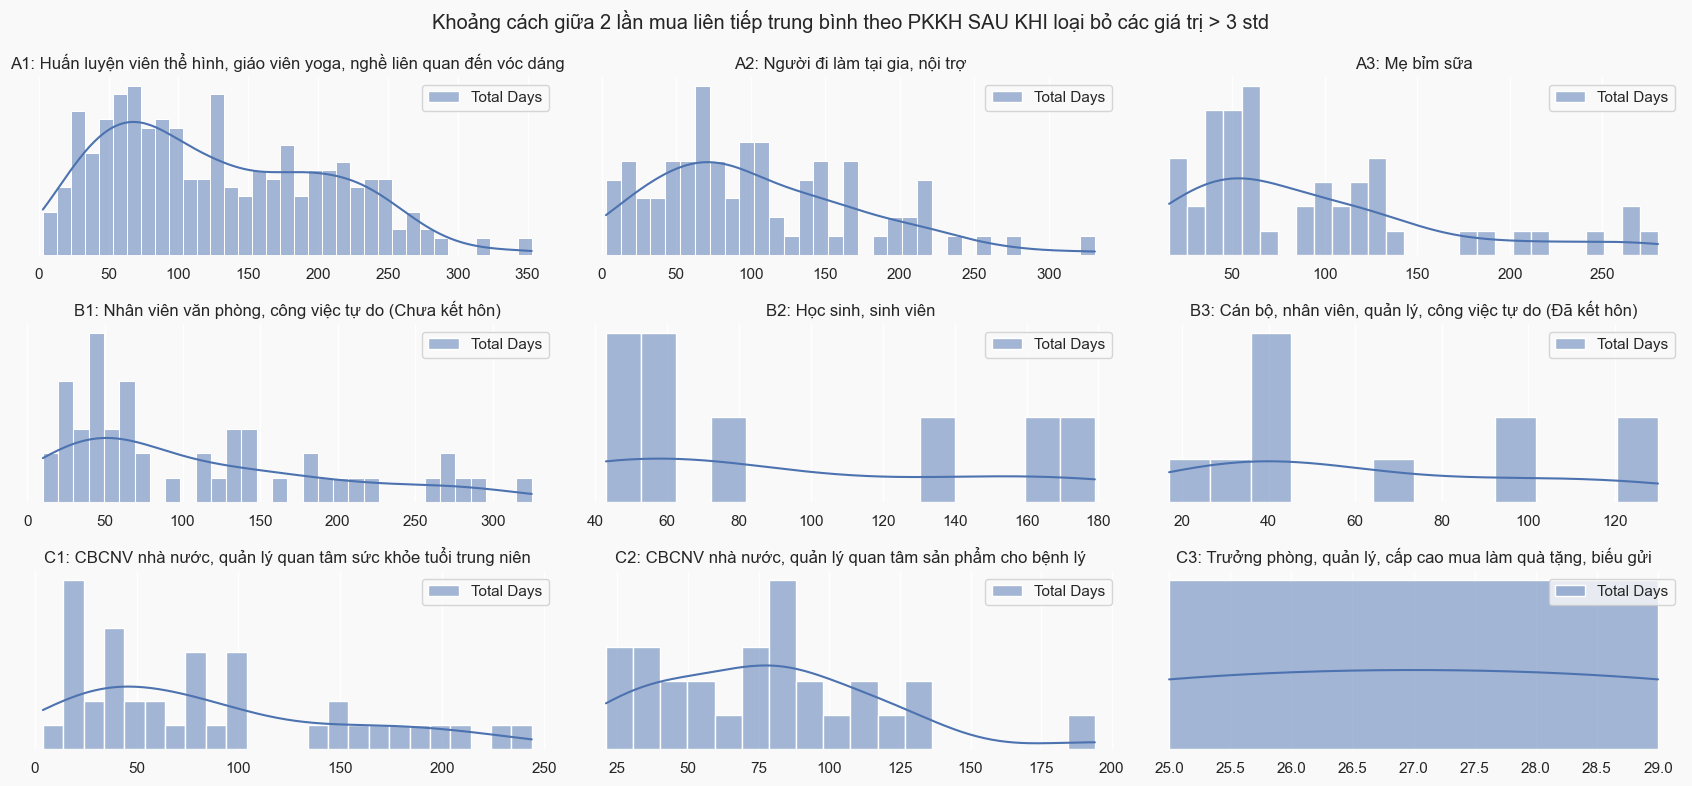

In [44]:
make_hist_subplots(df = store,
                   specific_df_to_filter = time_diff_segments,
                   col = 'Mã PKKH',
                   value = 'Total Days',
                   bin_width = 10,
                   num_bins = None,
                   title_str = 'Khoảng cách giữa 2 lần mua liên tiếp trung bình theo PKKH SAU KHI loại bỏ các giá trị > 3 std',
                   sharex=False)

## Số lượng khách hàng mới

In [45]:
customer_status_df = store.groupby(['Mã PKKH', 'Mã khách hàng'])['Date'].last().reset_index()
customer_status_df['diff from year start to last purchase'] = pd.to_timedelta(customer_status_df['Date'] - store['Date'].min())
customer_status_df['diff from year start to last purchase'] = round(customer_status_df['diff from year start to last purchase'].dt.total_seconds() / (24*3600)).astype(int)

customer_status_df = pd.merge(customer_status_df, average_time_diff_segment, on='Mã PKKH', how='left')
customer_status_df = customer_status_df.rename(columns={'Total Days': 'segment average diff first last day'})
customer_status_df['segment average diff first last day'] = round(customer_status_df['segment average diff first last day']).astype(int)

new_cust_condition = customer_status_df['diff from year start to last purchase'] >= customer_status_df['segment average diff first last day']

customer_status_df['customer status'] = np.where(new_cust_condition, 'new customer', 'old customer from last year')

store = pd.merge(store, customer_status_df[['Mã khách hàng', 'customer status']], on='Mã khách hàng', how='left')
store.head(3)

Thời gian tạo đơn Mã đơn hàng Mã khách hàng   Tên khách hàng Mã PKKH  \
0 2022-01-01 09:55:27  ORD0000001      CUZ00001  Hoàng Minh Tuấn      C1   
1 2022-01-01 09:55:27  ORD0000001      CUZ00001  Hoàng Minh Tuấn      C1   
2 2022-01-01 09:55:27  ORD0000001      CUZ00001  Hoàng Minh Tuấn      C1   

                          Mô tả Phân Khúc Khách hàng Mã nhóm hàng  \
0  CBCNV nhà nước, quản lý quan tâm sức khỏe tuổi...          BNC   
1  CBCNV nhà nước, quản lý quan tâm sức khỏe tuổi...          HQS   
2  CBCNV nhà nước, quản lý quan tâm sức khỏe tuổi...          SOG   

     Tên nhóm hàng Mã mặt hàng                       Tên mặt hàng  ...  \
0      Bột ngũ cốc       BNC01        Bột ngũ cốc hàn quốc Damtuh  ...   
1  Hoa quả sấy khô       HQS03              Khoai dẻo không đường  ...   
2      Sữa Organic       SOG04  Sữa 9 loại hạt Vinamilk Super Nut  ...   

   Đơn giá  Thành tiền  Year  Month Day of Month        Date   Weekday  \
0   325000      325000  2022     01            1  2022-01-01  Saturday   
1    60000       60000  2022     01            1  2022-01-01  Saturday   
2   240000      240000  2022     01            1  2022-01-01  Saturday   

       Time Hour              customer status  
0  09:55:27    9  old customer from last year  
1  09:55:27    9  old customer from last year  
2  09:55:27    9  old customer from last year  

[3 rows x 21 columns]

In [46]:
rates_seasonal_new_customer_df = store.groupby(['Mã PKKH', 'Month', 'customer status']).size().reset_index().sort_values(['Mã PKKH', 'Month'])
rates_seasonal_new_customer_df.columns = ['Mã PKKH', 'Month', 'customer status', 'count']
rates_seasonal_new_customer_df['partition sum'] = rates_seasonal_new_customer_df.groupby(['Mã PKKH', 'Month'])['count'].transform(np.sum)
rates_seasonal_new_customer_df['percentage'] = round(rates_seasonal_new_customer_df['count'] * 100 / rates_seasonal_new_customer_df['partition sum']).astype(int)
rates_seasonal_new_customer_df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\3408553347.py:3: FutureWarning: The provided callable <function sum at 0x00000152BF45B2E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  rates_seasonal_new_customer_df['partition sum'] = rates_seasonal_new_customer_df.groupby(['Mã PKKH', 'Month'])['count'].transform(np.sum)


Mã PKKH Month              customer status  count  partition sum  \
0        A1    01                 new customer    149            391   
1        A1    01  old customer from last year    242            391   
2        A1    02                 new customer     89            182   
3        A1    02  old customer from last year     93            182   
4        A1    03                 new customer    588            588   
..      ...   ...                          ...    ...            ...   
111      C3    08                 new customer      1              1   
112      C3    09                 new customer      8              8   
113      C3    10                 new customer     21             21   
114      C3    11                 new customer     26             26   
115      C3    12                 new customer     35             35   

     percentage  
0            38  
1            62  
2            49  
3            51  
4           100  
..          ...  
111         100  
112         100  
113         100  
114         100  
115         100  

[116 rows x 6 columns]

Lập timeline lần mua của khách hàng, để tìm khách cũ trong số khách mới trong năm.

In [47]:
cust_purchase_timeline = store[['Mã PKKH', 'Mã khách hàng', 'Date','Month', 'customer status']].drop_duplicates().sort_values(['Mã khách hàng', 'Date'])
display(cust_purchase_timeline.head(3))

Mã PKKH Mã khách hàng        Date Month              customer status
0      C1      CUZ00001  2022-01-01    01  old customer from last year
3      B1      CUZ00002  2022-01-01    01  old customer from last year
8      A3      CUZ00003  2022-01-01    01                 new customer

Xác định lần mua đầu tiên của khách mới trong năm sẽ là 'new customer', về sau những new customer sẽ là old customer from this year.

In [48]:
new_customer_dict = {}

for index, row in cust_purchase_timeline.iterrows():
    customer_id = row['Mã khách hàng']
    customer_status = row['customer status']

    # Check if the customer is a new customer
    if customer_status == 'new customer':
        # If this is the first appearance of the customer as new, keep it as is
        if customer_id not in new_customer_dict:
            new_customer_dict[customer_id] = True
        else:
            # If the customer has appeared as new before, update the status
            cust_purchase_timeline.at[index, 'customer status'] = 'old customer from THIS year'

cust_purchase_timeline[cust_purchase_timeline['Mã khách hàng'] == 'CUZ00012']

Mã PKKH Mã khách hàng        Date Month              customer status
44         A1      CUZ00012  2022-01-02    01                 new customer
2693       A1      CUZ00012  2022-03-11    03  old customer from THIS year
5794       A1      CUZ00012  2022-05-14    05  old customer from THIS year
8242       A1      CUZ00012  2022-07-03    07  old customer from THIS year
13717      A1      CUZ00012  2022-09-25    09  old customer from THIS year

In [49]:
monthly_new_cust = cust_purchase_timeline[cust_purchase_timeline['customer status'] == 'new customer'].groupby(['Mã PKKH', 'Month']).size().reset_index()
monthly_new_cust.columns = ['Mã PKKH', 'Month', 'completely new customers']

### Biểu đồ 11c_Python. Số lượng khách hàng mới mua lần đầu qua hàng tháng của từng Phân khúc khách hàng

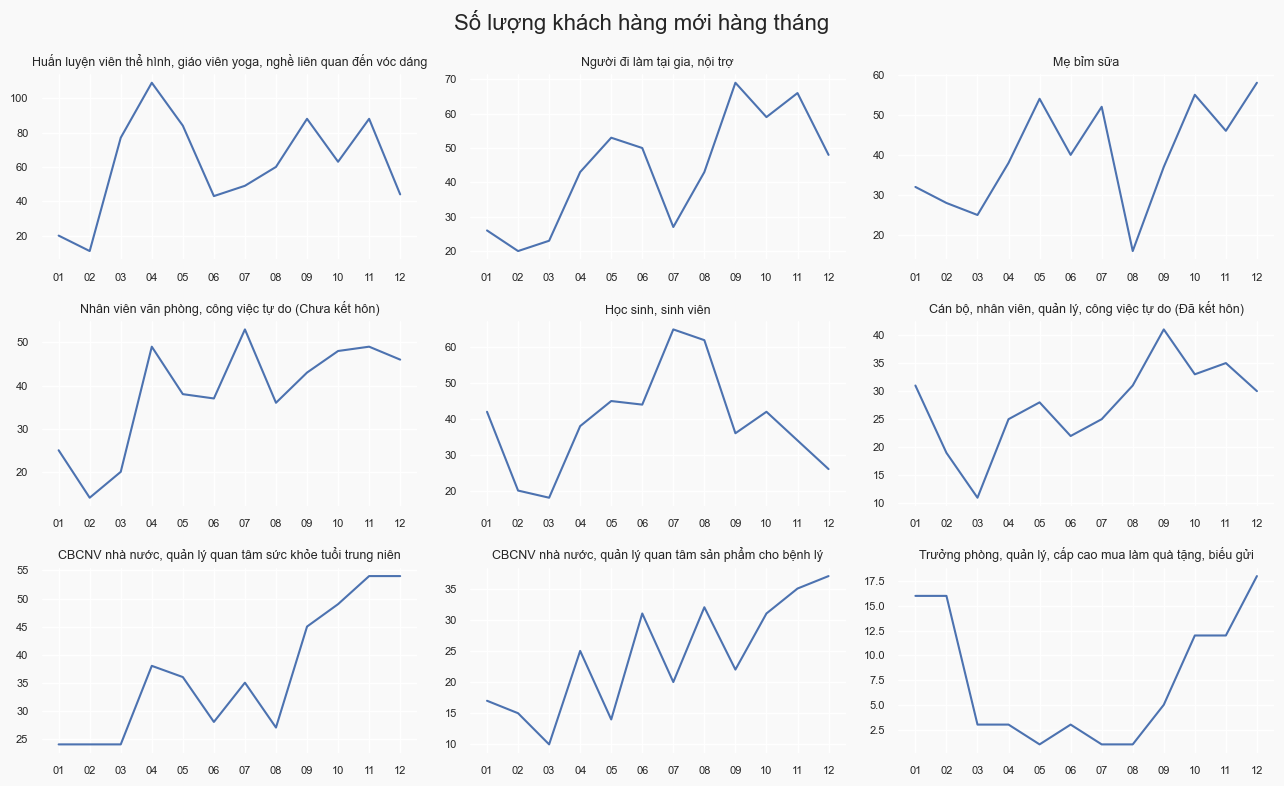

In [50]:
categories = np.sort(store['Mã PKKH'].unique())
category_len = len(categories)
ncols = 3
nrows = math.ceil(category_len / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13,8))
axes = axes.flatten()

for i, cat in enumerate(categories):
  data = monthly_new_cust[monthly_new_cust['Mã PKKH']==cat]
  data = data.sort_values('Month', ascending=True)
  sns.lineplot(y='completely new customers', x='Month', data=data, ax=axes[i])
  axes[i].set_title(f"{segment_description[cat]}", fontsize=9)

  axes[i].spines[:].set_visible(False)
  # axes[i].xaxis.set_visible(False)
  # axes[i].yaxis.set_visible(False)
  axes[i].tick_params(bottom=False, left=False, top=False, right=False, labelsize=8)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

num_plots = category_len
for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes[i])


fig.suptitle('Số lượng khách hàng mới hàng tháng', fontsize=16)
plt.tight_layout()
plt.show()

## Khoảng cách giữa 2 lần mua liên tiếp theo phân khúc khách hàng

In [51]:
cust_unique_order_date = store.groupby(['Mã khách hàng', 'Mã đơn hàng'])['Date'].first().reset_index()

cust_unique_order_date['Time Difference'] = cust_unique_order_date.groupby(['Mã khách hàng'])['Date'].diff()
average_time_difference = cust_unique_order_date.groupby(['Mã khách hàng'])['Time Difference'].mean()

cs_consecutive_day_diff = average_time_difference.reset_index()
cs_consecutive_day_diff['Time Difference'] = pd.to_timedelta(cs_consecutive_day_diff['Time Difference'])
cs_consecutive_day_diff['Total Days'] = round(cs_consecutive_day_diff['Time Difference'].dt.total_seconds() / (24 * 3600), 1)
cs_consecutive_day_diff = cs_consecutive_day_diff.fillna(0)

customer_segments = store.groupby(['Mã khách hàng'])['Mã PKKH'].first()

cs_consecutive_day_diff = pd.merge(cs_consecutive_day_diff, customer_segments, on='Mã khách hàng', how='left')
cs_consecutive_day_diff = cs_consecutive_day_diff[['Mã PKKH','Mã khách hàng', 'Total Days']]
cs_consecutive_day_diff.to_excel('CS Trung bình khoảng cách giữa hai lần mua.xlsx', sheet_name='CS consecutive date diff')
cs_consecutive_day_diff

Mã PKKH Mã khách hàng  Total Days
0         C1      CUZ00001         0.0
1         B1      CUZ00002         0.0
2         A3      CUZ00003        45.5
3         B3      CUZ00004         0.0
4         A1      CUZ00005         0.0
...      ...           ...         ...
3937      A1      CUZ03938         0.0
3938      A3      CUZ03939         0.0
3939      A1      CUZ03940         0.0
3940      A3      CUZ03941         0.0
3941      B1      CUZ03942         0.0

[3942 rows x 3 columns]

In [52]:
cs_consecutive_day_diff.to_csv('../data/cs_consecutive_day_diff.csv', index=False)

### Biểu đồ 8d_Python. Khoảng cách trung bình giữa hai lần mua liên tiếp của từng phân khúc khách hàng

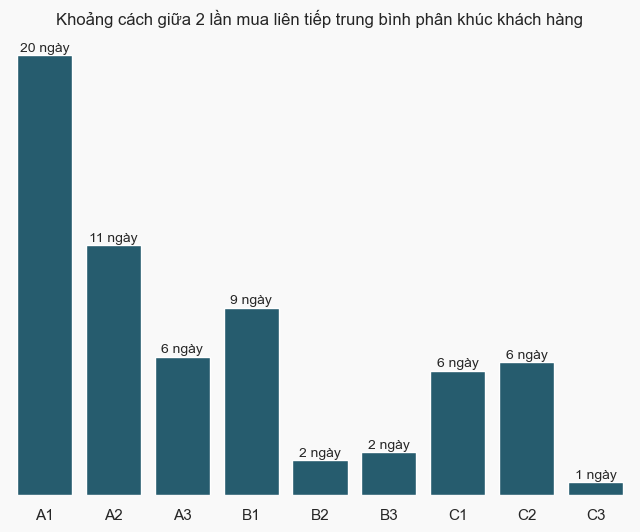

In [53]:
plt.figure(figsize=(8, 6))
sns.set(rc={'axes.facecolor':'#f9f9f9', 'figure.facecolor':'#f9f9f9'})
cs_consecutive_day_diff_mean = cs_consecutive_day_diff.groupby('Mã PKKH')['Total Days'].mean().reset_index()
ax = sns.barplot(x='Mã PKKH', y='Total Days', data=cs_consecutive_day_diff_mean, color='#1a627a', errorbar=('ci', False))
plt.title('Khoảng cách giữa 2 lần mua liên tiếp trung bình phân khúc khách hàng')

for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{round(value)} ngày',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize = 10)

ax.spines[:].set_visible(False)
ax.yaxis.set_visible(False)
ax.tick_params(bottom=False, left=False, top=False, right=False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

### Biểu đồ 8c_Python. Phân phối khoảng cách giữa hai lần mua (ngày) của những khách hàng có mua lặp lại theo phân khúc khách hàng

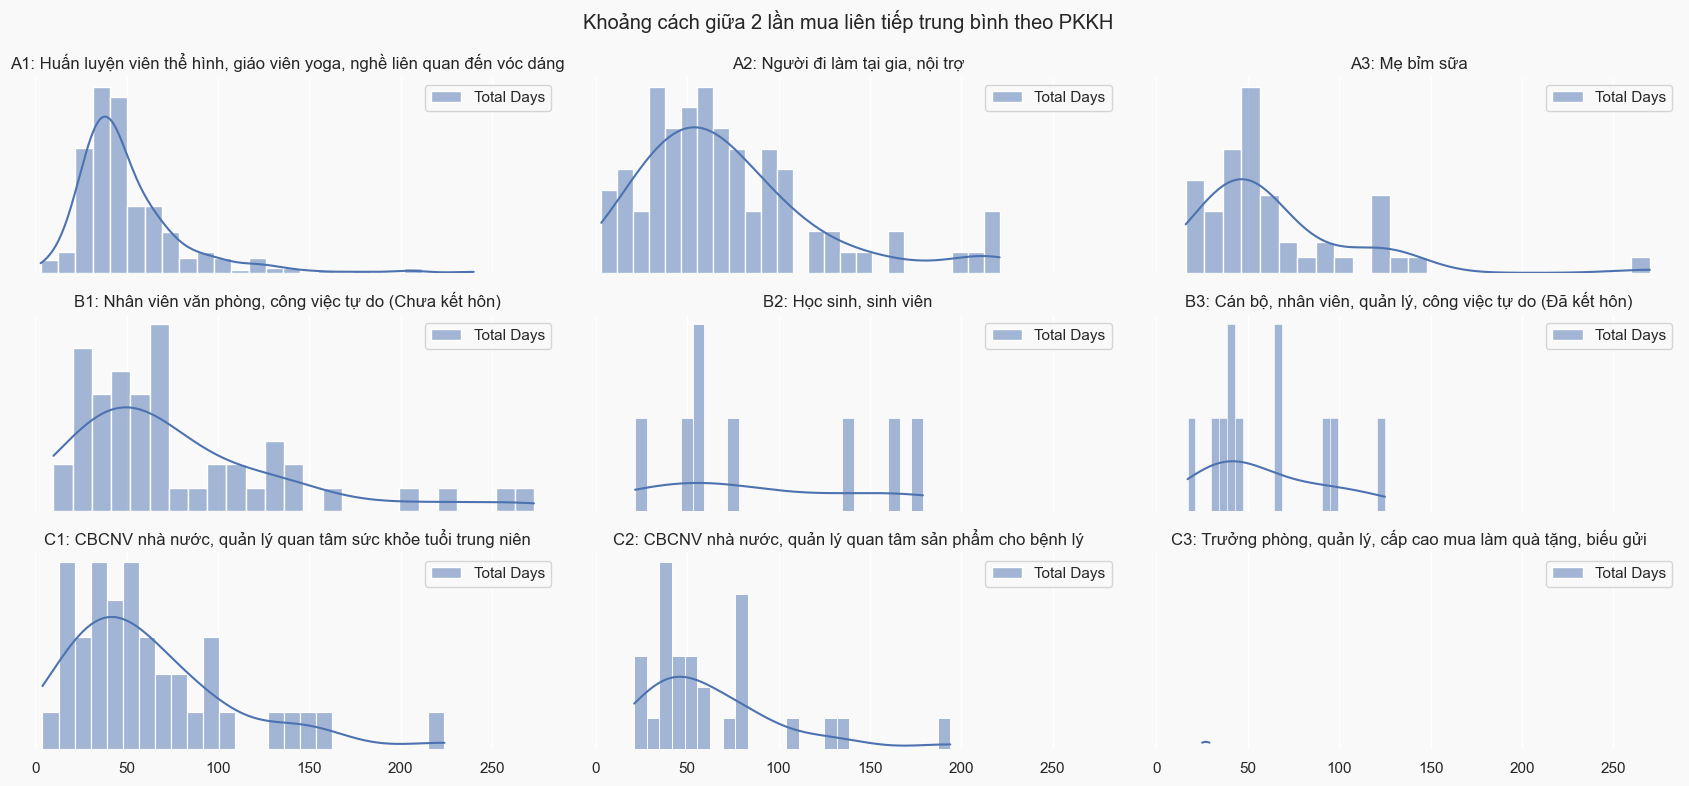

In [54]:
make_hist_subplots(df = store,
                   specific_df_to_filter = cs_consecutive_day_diff,
                   col = 'Mã PKKH',
                   value = 'Total Days',
                   bin_width = None,
                   num_bins = 25,
                   title_str = 'Khoảng cách giữa 2 lần mua liên tiếp trung bình theo PKKH')

### Thử phương pháp lấy peak KDE rồi đối chiếu 2 bên

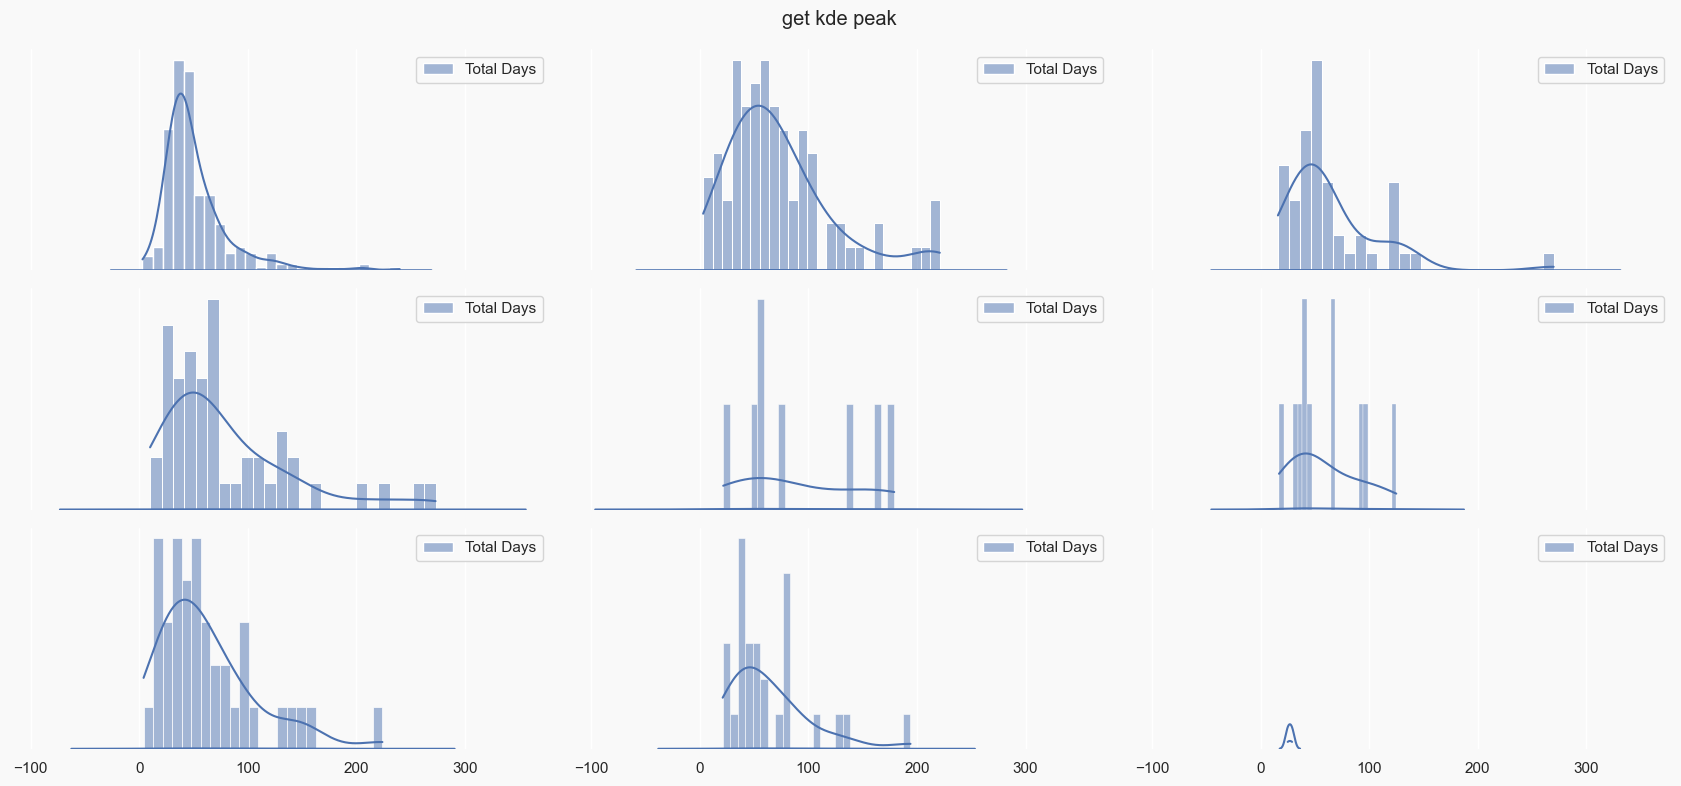

In [55]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### THAM SỐ #####
df = store
col = 'Mã PKKH'
sharex = True
specific_df_to_filter = cs_consecutive_day_diff
title_str = 'get kde peak'
num_bins = 25


#### BẮT ĐẦU
kde_peaks = {}
categories = np.sort(df[col].unique())
category_len = len(categories)
ncols = 3
nrows = math.ceil(category_len / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(17,8), sharex=sharex)
axes = axes.flatten()

for i, cat in enumerate(categories):  # Added enumeration to loop
  # Tạo df riêng cho phân khúc KH này
  subplot_df = specific_df_to_filter[specific_df_to_filter[col] == cat]  # Changed to specific_df_to_filter

  # Loại bỏ giá trị khoảng cách ngày = 0
  subplot_df = subplot_df[subplot_df['Total Days'] != 0]

  # Tìm peak của KDE
  sns.histplot(subplot_df, bins=num_bins, kde=True, color='salmon', ax=axes[i])
  x, y = sns.kdeplot(data=subplot_df, x='Total Days', ax=axes[i]).get_lines()[0].get_data()  # Removed redundant access to subplot_df
  max_y_index = np.argmax(y)
  x_at_max_y = x[max_y_index]
  kde_peaks[cat] = x_at_max_y

  axes[i].spines[:].set_visible(False)
  # axes[i].xaxis.set_visible(False)
  axes[i].yaxis.set_visible(False)
  axes[i].tick_params(bottom=False, left=False, top=False, right=False)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

num_plots = category_len
for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes[i])

fig.suptitle(title_str)
plt.tight_layout()
plt.show()

In [56]:
kde_peaks

{'A1': 38.7286432160804,
 'A2': 53.391959798994975,
 'A3': 46.633165829145725,
 'B1': 49.64824120603015,
 'B2': 55.53266331658292,
 'B3': 41.42211055276382,
 'C1': 41.58793969849246,
 'C2': 46.21105527638191,
 'C3': 26.98994974874372}

### Xử lý dùng mean mới và + std*3

{'A1': 138.13786015146684,
 'A2': 224.3377003788693,
 'A3': 189.57606640616137,
 'B1': 267.2308369027829,
 'B2': 292.0619857515542,
 'B3': 176.71497029501734,
 'C1': 205.52763398895695,
 'C2': 208.76290273289064,
 'C3': 33.46573983146786}

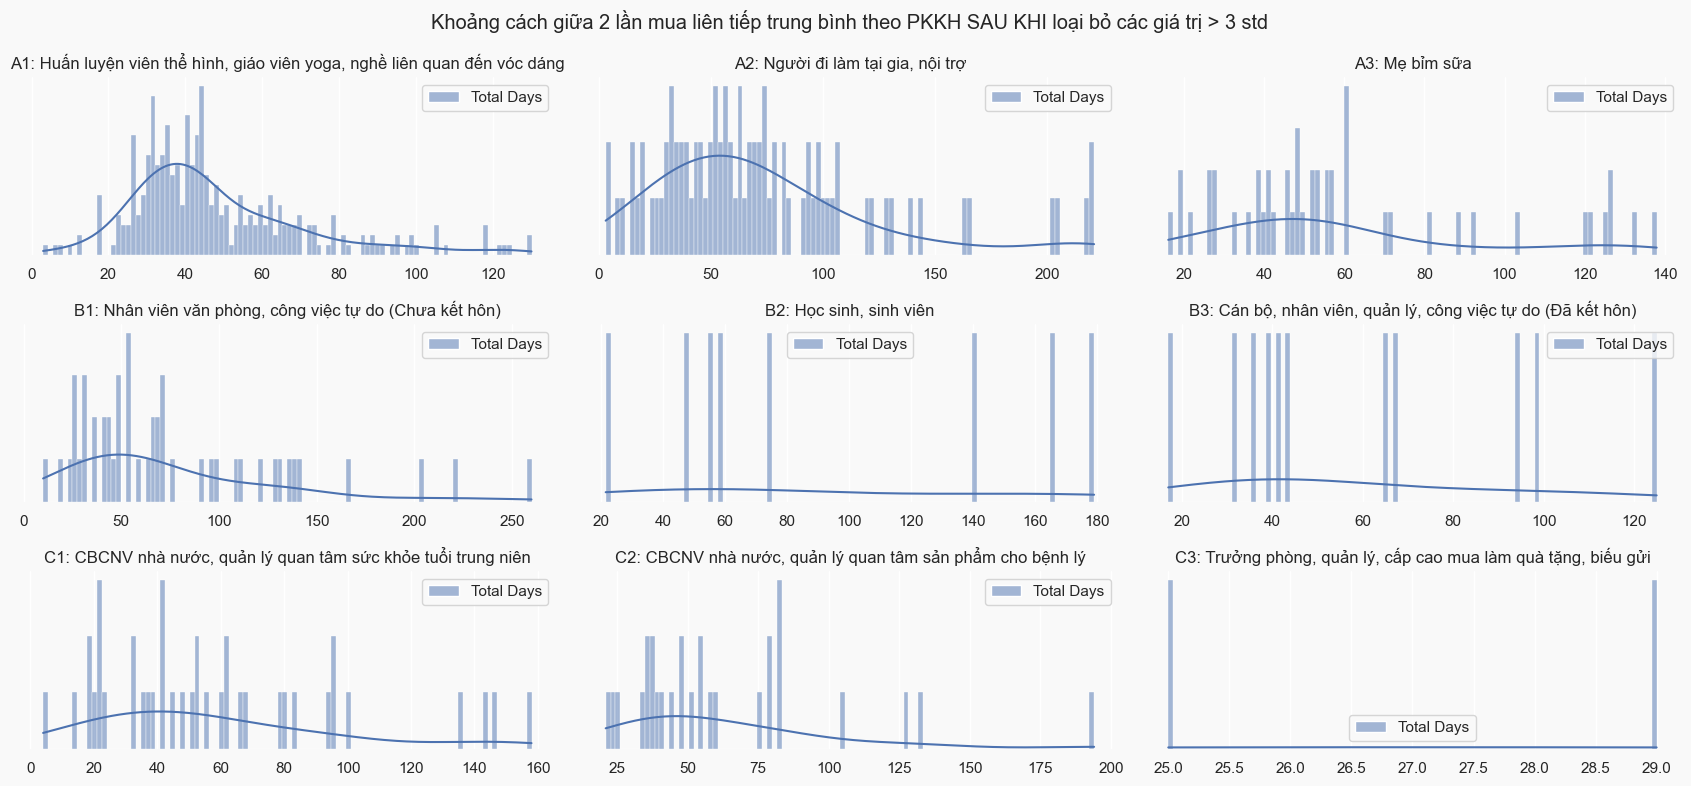

In [57]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import math

cust_segments = store['Mã PKKH'].unique()
cs_consecutive_dates_upper_bound = {}
for seg in cust_segments:
    # Tạo df riêng cho phân khúc KH này
    single_segment_data = cs_consecutive_day_diff[cs_consecutive_day_diff['Mã PKKH'] == seg]

    # Loại bỏ giá trị khoảng cách ngày = 0
    single_segment_data = single_segment_data[single_segment_data['Total Days'] != 0]

    # Tạo bảng tần số với 25 bins, mỗi bin là một khoảng ngày
    freq_distribution = single_segment_data['Total Days'].value_counts(bins=100).sort_index()

    # Trả về khoảng ngày chứa tần số lớn nhất
    max_val_interval_idx = freq_distribution.idxmax()

    # Lấy tâm của khoảng ngày này
    left_bound = max_val_interval_idx.left
    right_bound = max_val_interval_idx.right
    midpoint_of_max_interval_idx = (left_bound + right_bound) / 2


    # Tạo danh sách các khoảng cách ngày rồi tính std của danh sách này
    date_list = single_segment_data['Total Days'].tolist()
    N = len(date_list)
    tu_so = 0
    for d in date_list:
      element = (d - midpoint_of_max_interval_idx)**2
      tu_so += element
    std_dev = math.sqrt(tu_so/N)


    # Lấy tâm của khoảng ngày này + std * 3 của list ngày = Upper Bound --> lưu vào dictionary
    upper_bound_to_remove = midpoint_of_max_interval_idx + std_dev*3
    cs_consecutive_dates_upper_bound[seg] = upper_bound_to_remove


# Sort dictionary cho hiển thị thứ tự PKKH theo đúng thứ tự
my_keys = list(cs_consecutive_dates_upper_bound.keys())
my_keys.sort()
cs_consecutive_dates_upper_bound = {i: float(cs_consecutive_dates_upper_bound[i]) for i in my_keys}
display(cs_consecutive_dates_upper_bound)


# Lọc ra những record mà có khoảng cách giữa 2 ngày liên tiếp nhỏ hơn Upper Bound
filtered_cs_consecutive_day_diff = cs_consecutive_day_diff.copy()
for seg in cust_segments:
    upper_bound = cs_consecutive_dates_upper_bound[seg]
    filtered_cs_consecutive_day_diff = filtered_cs_consecutive_day_diff[~((filtered_cs_consecutive_day_diff['Mã PKKH'] == seg) & (filtered_cs_consecutive_day_diff['Total Days'] > upper_bound))].copy()

make_hist_subplots(df = store,
                   specific_df_to_filter = filtered_cs_consecutive_day_diff,
                   col = 'Mã PKKH',
                   value = 'Total Days',
                   bin_width = None,
                   num_bins = 100,
                   title_str = 'Khoảng cách giữa 2 lần mua liên tiếp trung bình theo PKKH SAU KHI loại bỏ các giá trị > 3 std',
                   sharex=False)

## Tạm ứng dụng KDE peaks để sử dụng cho tính ngưỡng ngày rời bỏ và tỉ lệ rời bỏ hàng tháng
Nếu một khách hàng có lần cuối mua hàng tính cho đến hiện tại vượt quá ngưỡng này, nghĩa là họ đã từ bỏ

In [58]:
churning_threshold = {key: round(value*3) for key, value in kde_peaks.items()}
churning_threshold

{'A1': 116,
 'A2': 160,
 'A3': 140,
 'B1': 149,
 'B2': 167,
 'B3': 124,
 'C1': 125,
 'C2': 139,
 'C3': 81}

In [59]:
churing_check_df = store.groupby(['Mã PKKH', 'Mã khách hàng'])['Date'].last().reset_index()
churing_check_df['diff to today'] = store['Date'].max() - churing_check_df['Date']
churing_check_df['diff to today'] = pd.to_timedelta(churing_check_df['diff to today'])
churing_check_df['diff to today'] = round(churing_check_df['diff to today'].dt.total_seconds() / (24*3600)).astype(int)
churing_check_df['churning_threshold'] = churing_check_df['Mã PKKH'].map(churning_threshold)
churing_check_df['left yet'] = np.where(churing_check_df['diff to today'] > churing_check_df['churning_threshold'], 'left', 'still staying')

tracking_cust = pd.merge(customer_status_df[['Mã PKKH', 'Mã khách hàng', 'customer status']], churing_check_df[['Mã khách hàng', 'left yet']], on='Mã khách hàng', how='left')
tracking_cust.head(3)

Mã PKKH Mã khách hàng              customer status       left yet
0      A1      CUZ00005  old customer from last year           left
1      A1      CUZ00012                 new customer  still staying
2      A1      CUZ00014  old customer from last year           left

Track thời gian mua hàng của từng khách hàng

Xác định lần mua cuối cùng nếu đã rời bỏ. Những lần mua trước đó sẽ được lưu là "vẫn còn ở lại".

In [60]:
# Identify customers who have left
left_customers = tracking_cust[tracking_cust['left yet'] == 'left']['Mã khách hàng'].unique()

# Iterate through left customers
for customer_id in left_customers:
    # Find all rows in cust_purchase_timeline DataFrame for this customer
    customer_rows = cust_purchase_timeline[cust_purchase_timeline['Mã khách hàng'] == customer_id]

    # Find the index of the last occurrence of this customer
    last_occurrence_index = customer_rows.index[-1]

    # Update the 'left yet' column of the last occurrence to 'left'
    cust_purchase_timeline.loc[last_occurrence_index, 'left yet'] = 'left'

# For remaining occurrences, update 'left yet' to 'still staying'
cust_purchase_timeline['left yet'].fillna('still staying', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\2535658899.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_purchase_timeline['left yet'].fillna('still staying', inplace=True)


In [61]:
monthly_left_segment = cust_purchase_timeline.groupby(['Mã PKKH', 'Month', 'left yet']).size().reset_index()
monthly_left_segment.columns = ['Mã PKKH', 'Month', 'left yet', 'count']

total_seg_month = monthly_left_segment.groupby(['Mã PKKH', 'Month'])['count'].sum().reset_index()
total_seg_month.columns = ['Mã PKKH', 'Month', 'total_seg_month']
monthly_left_segment = pd.merge(monthly_left_segment, total_seg_month, on=['Mã PKKH', 'Month'], how='left')
monthly_left_segment.head()

Mã PKKH Month       left yet  count  total_seg_month
0      A1    01           left     33               54
1      A1    01  still staying     21               54
2      A1    02           left     17               30
3      A1    02  still staying     13               30
4      A1    03           left     43               95

In [62]:
monthly_left_segment['left or stay rate'] = (round(monthly_left_segment['count']*100 / monthly_left_segment['total_seg_month'])).astype(int)
monthly_churning_rate = monthly_left_segment[monthly_left_segment['left yet'] == 'left']
monthly_churning_rate = monthly_churning_rate[['Mã PKKH', 'Month', 'left or stay rate']]
monthly_churning_rate.columns = ['Mã PKKH', 'Month', 'churning rate']
monthly_churning_rate['Mô tả Phân Khúc Khách hàng'] = monthly_churning_rate['Mã PKKH'].map(segment_description)
monthly_churning_rate.to_csv('../data/monthly_churning_rate.csv', index=False)

In [63]:
monthly_churning_rate.head()

Mã PKKH Month  churning rate  \
0      A1    01             61   
2      A1    02             57   
4      A1    03             45   
6      A1    04             43   
8      A1    05             37   

                          Mô tả Phân Khúc Khách hàng  
0  Huấn luyện viên thể hình, giáo viên yoga, nghề...  
2  Huấn luyện viên thể hình, giáo viên yoga, nghề...  
4  Huấn luyện viên thể hình, giáo viên yoga, nghề...  
6  Huấn luyện viên thể hình, giáo viên yoga, nghề...  
8  Huấn luyện viên thể hình, giáo viên yoga, nghề...

In [64]:
cust_purchase_timeline.head()

Mã PKKH Mã khách hàng        Date Month              customer status  \
0         C1      CUZ00001  2022-01-01    01  old customer from last year   
3         B1      CUZ00002  2022-01-01    01  old customer from last year   
8         A3      CUZ00003  2022-01-01    01                 new customer   
1681      A3      CUZ00003  2022-02-03    02  old customer from THIS year   
3534      A3      CUZ00003  2022-04-02    04  old customer from THIS year   

           left yet  
0              left  
3              left  
8     still staying  
1681  still staying  
3534           left

In [65]:
cust_purchase_timeline[cust_purchase_timeline['Mã khách hàng']=='CUZ00003']

Mã PKKH Mã khách hàng        Date Month              customer status  \
8         A3      CUZ00003  2022-01-01    01                 new customer   
1681      A3      CUZ00003  2022-02-03    02  old customer from THIS year   
3534      A3      CUZ00003  2022-04-02    04  old customer from THIS year   

           left yet  
8     still staying  
1681  still staying  
3534           left

### Biểu đồ 12c_Python. Tỉ lệ khách hàng rời bỏ hàng tháng theo Phân khúc khách hàng

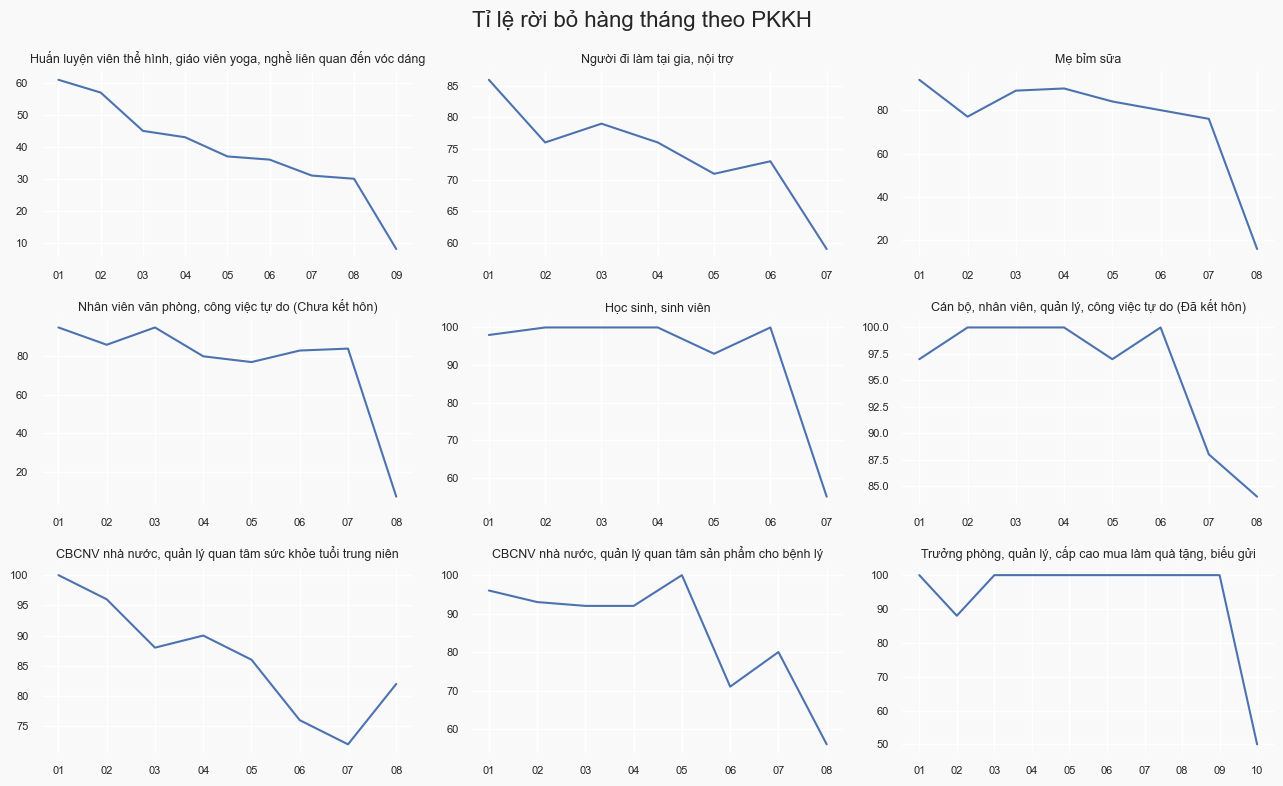

In [66]:
categories = np.sort(store['Mã PKKH'].unique())
category_len = len(categories)
ncols = 3
nrows = math.ceil(category_len / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13,8))
axes = axes.flatten()

for i, cat in enumerate(categories):
  data = monthly_churning_rate[monthly_churning_rate['Mã PKKH']==cat]
  data = data.sort_values('Month', ascending=True)
  sns.lineplot(y='churning rate', x='Month', data=data, ax=axes[i])
  axes[i].set_title(f"{segment_description[cat]}", fontsize=9)

  axes[i].spines[:].set_visible(False)
  # axes[i].xaxis.set_visible(False)
  # axes[i].yaxis.set_visible(False)
  axes[i].tick_params(bottom=False, left=False, top=False, right=False, labelsize=8)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

num_plots = category_len
for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes[i])


fig.suptitle('Tỉ lệ rời bỏ hàng tháng theo PKKH', fontsize=16)
plt.tight_layout()
plt.show()

## Khoảng cách giữa 2 lần mua liên tiếp trung bình nhóm hàng theo mỗi phân khúc khách hàng

In [67]:
store.sort_values(by=['Mã khách hàng', 'Date'])
cust_unique_order_date_of_item_group = store.groupby(['Mã khách hàng', 'Mã đơn hàng', 'Tên nhóm hàng'])['Date'].first().reset_index()

In [68]:
cust_unique_order_date_of_item_group['Time Difference'] = cust_unique_order_date_of_item_group.groupby(['Mã khách hàng', 'Tên nhóm hàng'])['Date'].diff()

average_time_difference = cust_unique_order_date_of_item_group.groupby(['Mã khách hàng', 'Tên nhóm hàng'])['Time Difference'].mean()

consecutive_day_diff = average_time_difference.reset_index()
consecutive_day_diff['Time Difference'] = pd.to_timedelta(consecutive_day_diff['Time Difference'])
consecutive_day_diff['Total Days'] = round(consecutive_day_diff['Time Difference'].dt.total_seconds() / (24 * 3600), 1)
consecutive_day_diff = consecutive_day_diff.fillna(0)

customer_segments = store.groupby(['Mã khách hàng'])['Mã PKKH'].first()
consecutive_day_diff = pd.merge(consecutive_day_diff, customer_segments, on='Mã khách hàng', how='left')

neat_consecutive_day_diff = consecutive_day_diff[['Mã khách hàng', 'Tên nhóm hàng', 'Total Days']]
neat_consecutive_day_diff.to_excel('Trung bình khoảng cách giữa hai lần mua.xlsx')

consecutive_day_diff = consecutive_day_diff[consecutive_day_diff['Total Days'] != 0]
consecutive_day_diff = consecutive_day_diff.groupby(['Mã PKKH', 'Tên nhóm hàng'])['Total Days'].mean().reset_index()
consecutive_day_diff[consecutive_day_diff['Total Days']!=0]

Mã PKKH    Tên nhóm hàng  Total Days
0       A1    Bánh ăn kiêng   57.192279
1       A1      Bột ngũ cốc   73.790210
2       A1  Gia vị ăn kiêng   67.570175
3       A1  Hoa quả sấy khô   70.003727
4       A1   Hạt dinh dưỡng   56.286245
5       A1      Sữa Organic   77.358974
6       A1    Thực phẩm khô   59.731148
7       A2    Bánh ăn kiêng   75.033333
8       A2      Bột ngũ cốc   76.705882
9       A2  Gia vị ăn kiêng  104.500000
10      A2  Hoa quả sấy khô   89.811765
11      A2   Hạt dinh dưỡng   67.034483
12      A2      Sữa Organic   83.581818
13      A2    Thực phẩm khô   70.404545
14      A3    Bánh ăn kiêng   61.000000
15      A3      Bột ngũ cốc   93.380000
16      A3  Gia vị ăn kiêng   65.700000
17      A3  Hoa quả sấy khô   65.777778
18      A3   Hạt dinh dưỡng   67.058333
19      A3      Sữa Organic   51.131579
20      A3    Thực phẩm khô   64.587500
21      B1    Bánh ăn kiêng   93.157895
22      B1  Hoa quả sấy khô   96.217647
23      B1   Hạt dinh dưỡng  103.038095
24      B1      Sữa Organic   83.142857
25      B1    Thực phẩm khô   96.492593
26      B2    Bánh ăn kiêng   57.000000
27      B2  Hoa quả sấy khô   43.000000
28      B2   Hạt dinh dưỡng   50.500000
29      B2    Thực phẩm khô   59.000000
30      B3    Bánh ăn kiêng   65.000000
31      B3  Hoa quả sấy khô   96.333333
32      B3   Hạt dinh dưỡng   66.000000
33      B3      Sữa Organic   17.000000
34      C1    Bánh ăn kiêng   72.833333
35      C1      Bột ngũ cốc   78.200000
36      C1  Gia vị ăn kiêng  105.000000
37      C1  Hoa quả sấy khô  120.000000
38      C1   Hạt dinh dưỡng   75.363636
39      C1      Sữa Organic   68.323529
40      C1    Thực phẩm khô   64.812500
41      C2    Bánh ăn kiêng   44.000000
42      C2      Bột ngũ cốc   77.125000
43      C2  Hoa quả sấy khô   16.000000
44      C2   Hạt dinh dưỡng   57.500000
45      C2      Sữa Organic   77.071429
46      C2    Thực phẩm khô   73.214286
47      C3   Hạt dinh dưỡng   27.000000

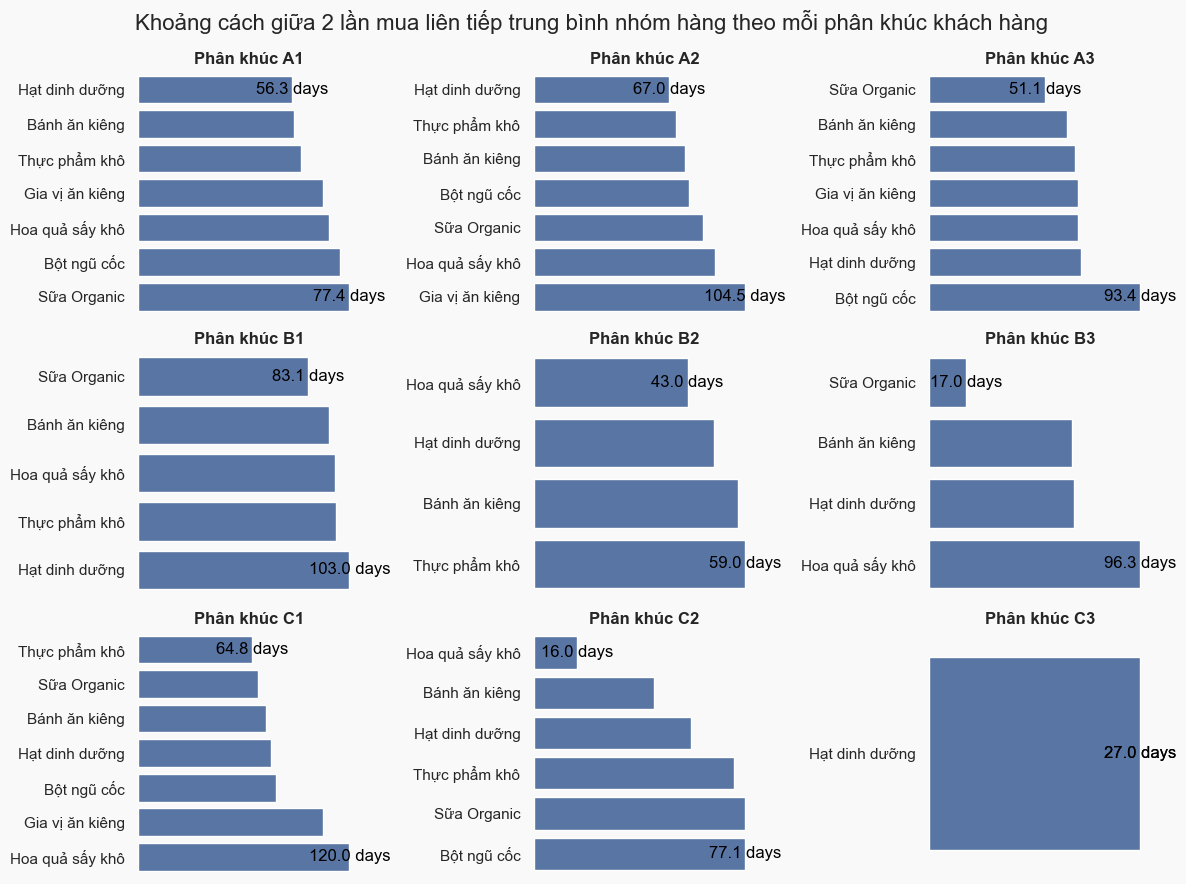

In [69]:
categories = np.sort(store['Mã PKKH'].unique())
category_len = len(categories)
ncols = 3
nrows = math.ceil(category_len / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12,9))
axes = axes.flatten()

for i, cat in enumerate(categories):
  data = consecutive_day_diff[consecutive_day_diff['Mã PKKH'] == cat].sort_values('Total Days', ascending=True)
  sns.barplot(data=data, y='Tên nhóm hàng', x='Total Days', ax=axes[i])
  axes[i].set_title(f"Phân khúc {cat}", fontweight="bold")

  axes[i].spines[:].set_visible(False)
  axes[i].xaxis.set_visible(False)
  # axes[i].yaxis.set_visible(False)
  axes[i].tick_params(bottom=False, left=False, top=False, right=False)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

  first_bar = data.iloc[0]
  last_bar = data.iloc[-1]
  axes[i].text(first_bar['Total Days'], 0, f'{first_bar["Total Days"]:.1f} days', ha='center', va='center', color='black')
  axes[i].text(last_bar['Total Days'], len(data)-1, f'{last_bar["Total Days"]:.1f} days', ha='center', va='center', color='black')


num_plots = category_len
for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes[i])


fig.suptitle('Khoảng cách giữa 2 lần mua liên tiếp trung bình nhóm hàng theo mỗi phân khúc khách hàng', fontsize=16)
plt.tight_layout()
plt.show()

**INSIGHTS:**

Nhìn chung các khách hàng đều nhanh chóng mua lại thực phẩm khô (bún, miến,...) hơn so với những loại thực phẩm khác.

Sữa có khoảng cách giữa 2 lần mua liên tiếp thấp vì bán theo thùng, khách hàng tiêu dùng lâu.

Mặc dù là phân khúc bán chạy nhất, nhưng khoảng cách giữa 2 lần mua nhìn chung của A2 là lâu hơn so với những nhóm khác. Có thể vì mỗi lần mua họ mua nhiều hơn để dùng lâu do thường xuyên tiêu dùng.

Đáng chú ý, với các phân khúc khách hàng càng ít đóng góp vào doanh thu thì khoảng cách giữa 2 lần mua liên tiếp càng ngắn. Có lẽ họ mua ăn để thỏa khẩu vị và sự tò mò một lần rồi không mua nữa.

## Giá trị đơn hàng trung bình theo phân khúc KH

In [70]:
consumption_per_order_by_segment = pd.pivot_table(data=store,
                                               index=['Mã PKKH'],
                                               values=['Thành tiền', 'Mã đơn hàng'],
                                               aggfunc={'Thành tiền': np.sum, 'Mã đơn hàng': pd.Series.nunique})
consumption_per_order_by_segment['spending per order'] = consumption_per_order_by_segment['Thành tiền'] / consumption_per_order_by_segment['Mã đơn hàng']
consumption_per_order_by_segment.reset_index(inplace=True)

for_display = consumption_per_order_by_segment.copy()
for_display[['spending per order', 'Thành tiền']] = for_display[['spending per order', 'Thành tiền']].applymap(lambda x: f'{x:,.0f}')
for_display

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\2867449892.py:1: FutureWarning: The provided callable <function sum at 0x00000152BF45B2E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  consumption_per_order_by_segment = pd.pivot_table(data=store,
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\2867449892.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for_display[['spending per order', 'Thành tiền']] = for_display[['spending per order', 'Thành tiền']].applymap(lambda x: f'{x:,.0f}')


Mã PKKH  Mã đơn hàng     Thành tiền spending per order
0      A1         1616  1,555,807,000            962,752
1      A2          674    522,024,000            774,516
2      A3          579    405,862,000            700,971
3      B1          541    290,199,000            536,412
4      B2          481    167,406,000            348,037
5      B3          349    139,353,000            399,292
6      C1          502    240,020,000            478,127
7      C2          331    135,942,000            410,701
8      C3           93     34,018,000            365,785

### Biểu đồ 14c_Python. Giá trị đơn hàng trung bình theo Phân khúc khách hàng

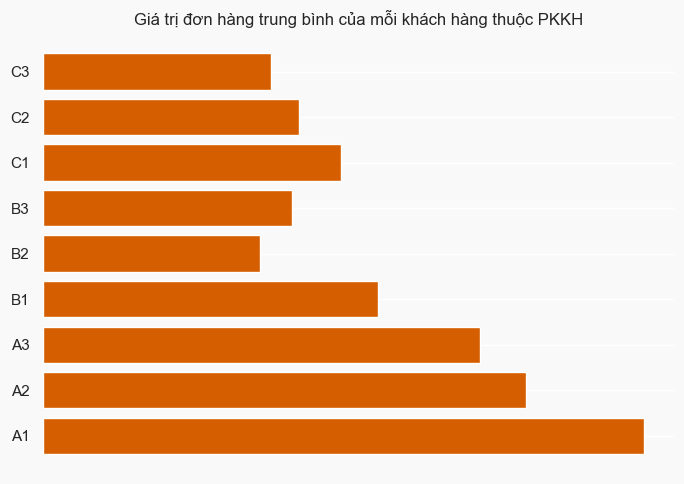

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 5))
ax.set_facecolor(color="#f9f9f9")

bars = ax.barh(consumption_per_order_by_segment['Mã PKKH'], consumption_per_order_by_segment['spending per order'], color='#d55e00')

ax.set_title('Giá trị đơn hàng trung bình của mỗi khách hàng thuộc PKKH')

ax.spines[:].set_visible(False)
ax.xaxis.set_visible(False)
ax.tick_params(bottom=False, left=False, top=False, right=False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()


## Năm qua, khách hàng nào mua nhiều lần nhất? Trung bình mỗi khách hàng đã mua bao nhiêu lần?

In [72]:
table = store.groupby(['Mã PKKH','Mã khách hàng'])['Mã đơn hàng'].nunique().reset_index()
table = table.rename(columns={'Mã đơn hàng':'Lượt mua'})

print('Những khách mua nhiều lần nhất là:')
print(table[table['Lượt mua'] == table['Lượt mua'].max()].to_string())

print()
print(f"Số lần mua trung bình của mỗi khách hàng: {table['Lượt mua'].mean():.0f}")

Những khách mua nhiều lần nhất là:
    Mã PKKH Mã khách hàng  Lượt mua
51       A1      CUZ00330         9
148      A1      CUZ00711         9

Số lần mua trung bình của mỗi khách hàng: 1


## Ở mỗi mức độ mua lặp lại (số lượt mua hàng), thống kê có bao nhiêu khách hàng có mức độ mua lặp lại đó

Tổng số lần mua  Lượng KH
0                1      3361
1                2       285
2                3       128
3                4        72
4                5        48
5                6        22
6                7        19
7                8         5
8                9         2

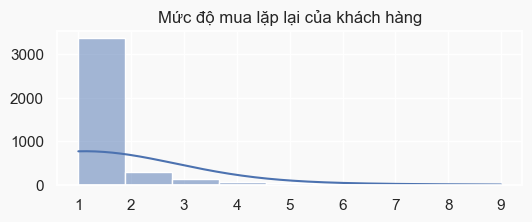

In [73]:
each_cus_purchase = store.groupby(['Mã khách hàng'])['Mã đơn hàng'].nunique().reset_index()
each_cus_purchase = each_cus_purchase.rename(columns={'Mã đơn hàng': 'Tổng số lần mua'})

buying_freq = each_cus_purchase.groupby(['Tổng số lần mua']).size().reset_index(name='Lượng KH')
display(buying_freq)


plt.figure(figsize=(6,2))
sns.histplot(data=buying_freq, x='Tổng số lần mua', weights='Lượng KH', bins=len(buying_freq), kde=True)

plt.title('Mức độ mua lặp lại của khách hàng')
plt.ylabel('')
plt.xlabel('')


plt.show()

**INSIGHTS:**

Gần như các khách hàng đều mua 1 lần --> doanh nghiệp đang có vấn đề về giữ chân khách hàng.

Nguyên do có thể vì tính đại trà của sản phẩm trên sàn TMĐT, không nhất thiết ủng hộ lâu dài hoặc ưu tiên.

## Ở mỗi mức độ mua lặp lại (số lượt mua hàng), thống kê có bao nhiêu khách hàng có mức độ mua lặp lại đó cho mỗi phân khúc khách hàng

In [74]:
each_cus_purchase = store.groupby(['Mã PKKH', 'Mã khách hàng'])['Mã đơn hàng'].nunique().reset_index()
each_cus_purchase = each_cus_purchase.rename(columns={'Mã đơn hàng': 'Tổng số lần mua'})

buying_freq_by_segments = each_cus_purchase.groupby(['Mã PKKH', 'Tổng số lần mua']).size().reset_index(name='Lượng KH')
buying_freq_by_segments = buying_freq_by_segments.sort_values(by='Mã PKKH')
buying_freq_by_segments

Mã PKKH  Tổng số lần mua  Lượng KH
0       A1                1       477
1       A1                2        97
2       A1                3        67
3       A1                4        56
4       A1                5        41
5       A1                6        22
6       A1                7        19
7       A1                8         4
8       A1                9         2
13      A2                5         2
12      A2                4         8
10      A2                2        52
9       A2                1       459
11      A2                3        23
14      A3                1       454
15      A3                2        31
16      A3                3        14
17      A3                4         2
18      A3                5         1
19      A3                8         1
24      B1                5         2
23      B1                4         4
20      B1                1       420
21      B1                2        37
22      B1                3         7
25      B2                1       464
26      B2                2         7
27      B2                3         1
28      B3                1       326
29      B3                2        10
30      B3                3         1
35      C1                5         2
34      C1                4         2
31      C1                1       405
32      C1                2        29
33      C1                3         7
36      C2                1       267
37      C2                2        20
38      C2                3         8
39      C3                1        89
40      C3                2         2

### Biểu đồ 13c_Python. Phân phối khách hàng tại mỗi lượt mua (trục X là số lượt mua)

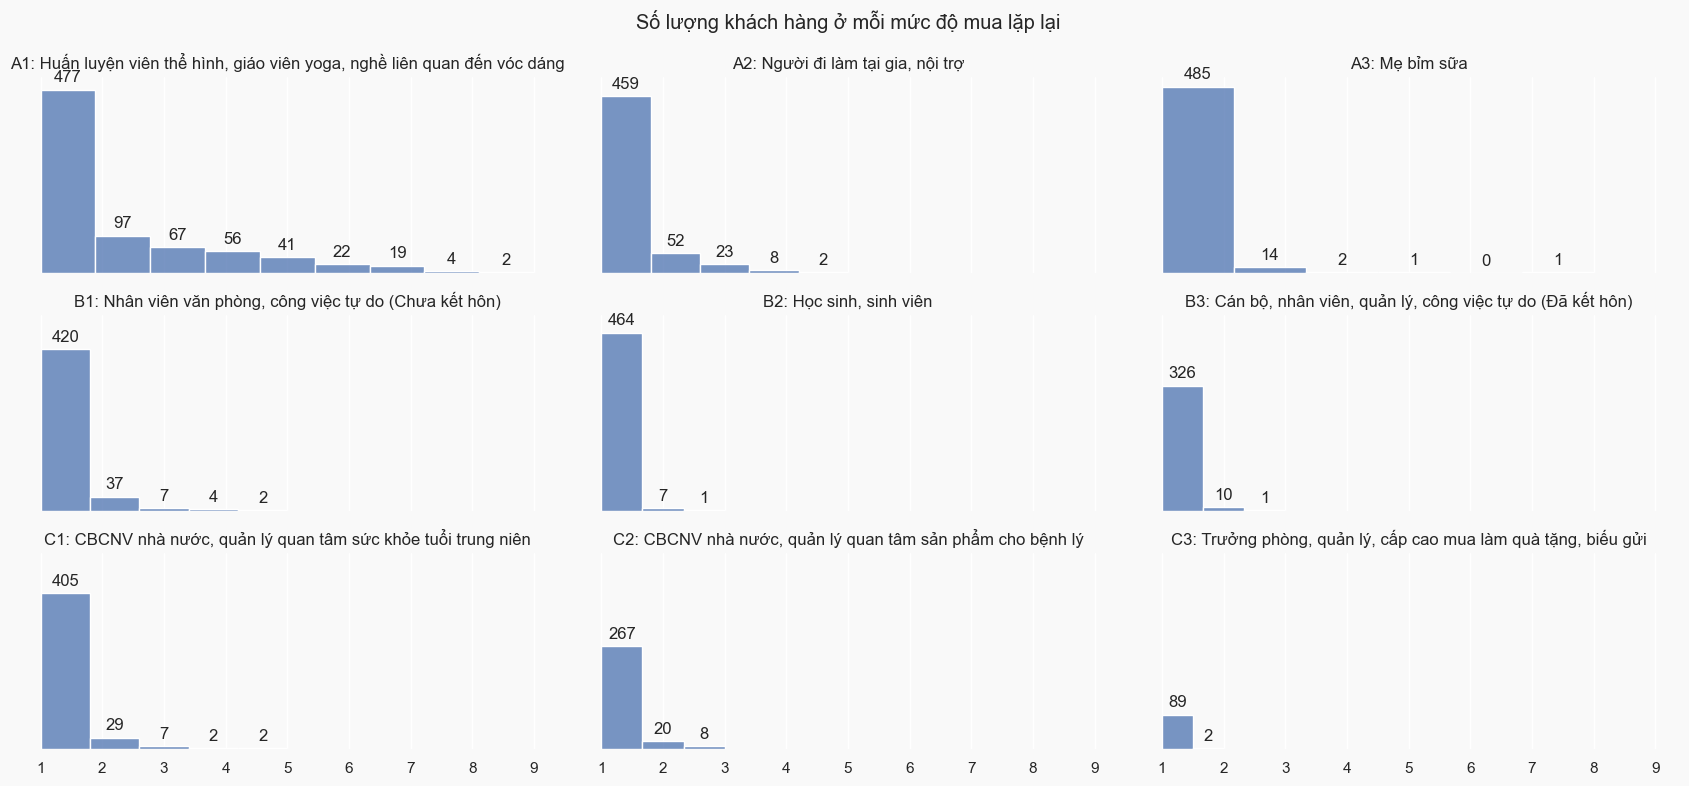

In [75]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

categories = np.sort(store['Mã PKKH'].unique())
category_len = len(categories)
ncols = 3
nrows = math.ceil(category_len / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(17,8), sharey=True, sharex=True)
axes = axes.flatten()

for i, cat in enumerate(categories):
  data = buying_freq_by_segments[buying_freq_by_segments['Mã PKKH'] == cat]
  sns.histplot(data=data, x='Tổng số lần mua', weights='Lượng KH', bins=len(data), ax=axes[i])
  axes[i].set_title(f"{cat}: {segment_description[cat]}")


  for bar in axes[i].patches:
        height = bar.get_height()
        axes[i].annotate(f'{height:.0f}',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

  axes[i].spines[:].set_visible(False)
  # axes[i].xaxis.set_visible(False)
  axes[i].yaxis.set_visible(False)
  axes[i].tick_params(bottom=False, left=False, top=False, right=False)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

num_plots = category_len
for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes[i])

fig.suptitle('Số lượng khách hàng ở mỗi mức độ mua lặp lại')
plt.tight_layout()
plt.show()

**INSIGHTS:**

Với nhóm A1, A2 thì hành vi mua lặp lại có tăng lên, do nhóm này quan trọng sự bền vững, liên tục, kỉ luật hơn đối với sản phẩm họ tiêu dùng.

## Phân phối về số tiền mỗi khách hàng chi tiêu ở doanh nghiệp

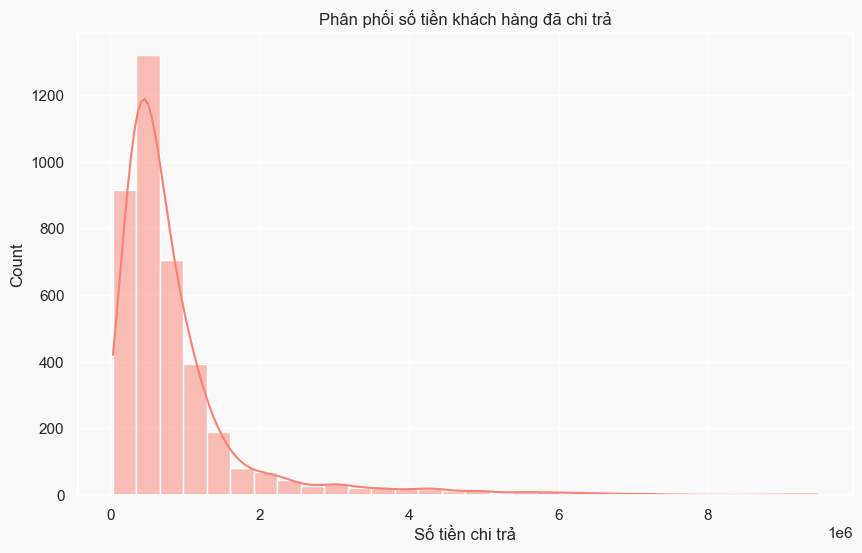

In [76]:
total_spent = store.groupby(['Mã khách hàng'])['Thành tiền'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(total_spent['Thành tiền'], bins=30, kde=True, color='salmon')
plt.title('Phân phối số tiền khách hàng đã chi trả')
plt.xlabel('Số tiền chi trả')
plt.show()

In [77]:
total_spent = store.groupby(['Mã PKKH','Mã khách hàng'])['Thành tiền'].sum().reset_index()
total_spent.to_csv('../data/total_spent.csv', index=False)
total_spent

Mã PKKH Mã khách hàng  Thành tiền
0         A1      CUZ00005     1795000
1         A1      CUZ00012     3905000
2         A1      CUZ00014     1195000
3         A1      CUZ00022     1260000
4         A1      CUZ00023     1350000
...      ...           ...         ...
3937      C3      CUZ03816      510000
3938      C3      CUZ03826      450000
3939      C3      CUZ03885      425000
3940      C3      CUZ03900      645000
3941      C3      CUZ03917      485000

[3942 rows x 3 columns]

In [78]:
total_spent['Thành tiền'].max()

9467000

In [79]:
total_spent = store.groupby(['Mã khách hàng'])['Thành tiền'].sum()
bins = pd.cut(total_spent, bins=30)
frequency_table = pd.value_counts(bins, sort=False).reset_index()
frequency_table.columns = ['Total Spent', 'Frequency']
print(frequency_table)

               Total Spent  Frequency
0      (25568.0, 349400.0]        916
1     (349400.0, 663800.0]       1320
2     (663800.0, 978200.0]        705
3    (978200.0, 1292600.0]        393
4   (1292600.0, 1607000.0]        190
5   (1607000.0, 1921400.0]         82
6   (1921400.0, 2235800.0]         69
7   (2235800.0, 2550200.0]         45
8   (2550200.0, 2864600.0]         28
9   (2864600.0, 3179000.0]         34
10  (3179000.0, 3493400.0]         20
11  (3493400.0, 3807800.0]         23
12  (3807800.0, 4122200.0]         18
13  (4122200.0, 4436600.0]         19
14  (4436600.0, 4751000.0]         12
15  (4751000.0, 5065400.0]         16
16  (5065400.0, 5379800.0]          5
17  (5379800.0, 5694200.0]          9
18  (5694200.0, 6008600.0]         11
19  (6008600.0, 6323000.0]          6
20  (6323000.0, 6637400.0]          6
21  (6637400.0, 6951800.0]          2
22  (6951800.0, 7266200.0]          4
23  (7266200.0, 7580600.0]          2
24  (7580600.0, 7895000.0]          1
25  (7895000

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\4136126222.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequency_table = pd.value_counts(bins, sort=False).reset_index()


In [80]:
total_spent = store.groupby(['Mã khách hàng'])['Thành tiền'].sum().reset_index()

**INSIGHTS:**

Chi tiêu nằm trong khoảng 350-650k mỗi khách hàng chiếm tần số cao, có thể vì **đơn giá bán ra cho mỗi sản phẩm cũng khá lớn hoặc khách hàng thường mua nhiều sản phẩm cùng lúc.**

## Số lượng mặt hàng trên mỗi đơn hàng của khách hàng

In [81]:
item_num_per_order = store.groupby(['Mã PKKH', 'Mã khách hàng'])['Mã đơn hàng'].size().reset_index()
item_num_per_order = item_num_per_order.groupby(['Mã PKKH'])['Mã đơn hàng'].mean().reset_index()
item_num_per_order

Mã PKKH  Mã đơn hàng
0      A1    12.492994
1      A2     6.647059
2      A3     4.956262
3      B1     4.391489
4      B2     2.334746
5      B3     2.735905
6      C1     3.586517
7      C2     3.064407
8      C3     1.802198

## Phân phối (histogram) về số tiền mỗi khách hàng đã mua ở doanh nghiệp, theo mỗi phân khúc khách hàng

In [82]:
total_spent_segments = store.groupby(['Mã PKKH', 'Mã khách hàng'])['Thành tiền'].sum().reset_index()
total_spent_segments

Mã PKKH Mã khách hàng  Thành tiền
0         A1      CUZ00005     1795000
1         A1      CUZ00012     3905000
2         A1      CUZ00014     1195000
3         A1      CUZ00022     1260000
4         A1      CUZ00023     1350000
...      ...           ...         ...
3937      C3      CUZ03816      510000
3938      C3      CUZ03826      450000
3939      C3      CUZ03885      425000
3940      C3      CUZ03900      645000
3941      C3      CUZ03917      485000

[3942 rows x 3 columns]

### Biểu đồ 15c_Python. Phân phối số tiền đã chi tiêu của khách hàng theo từng Phân khúc khách hàng

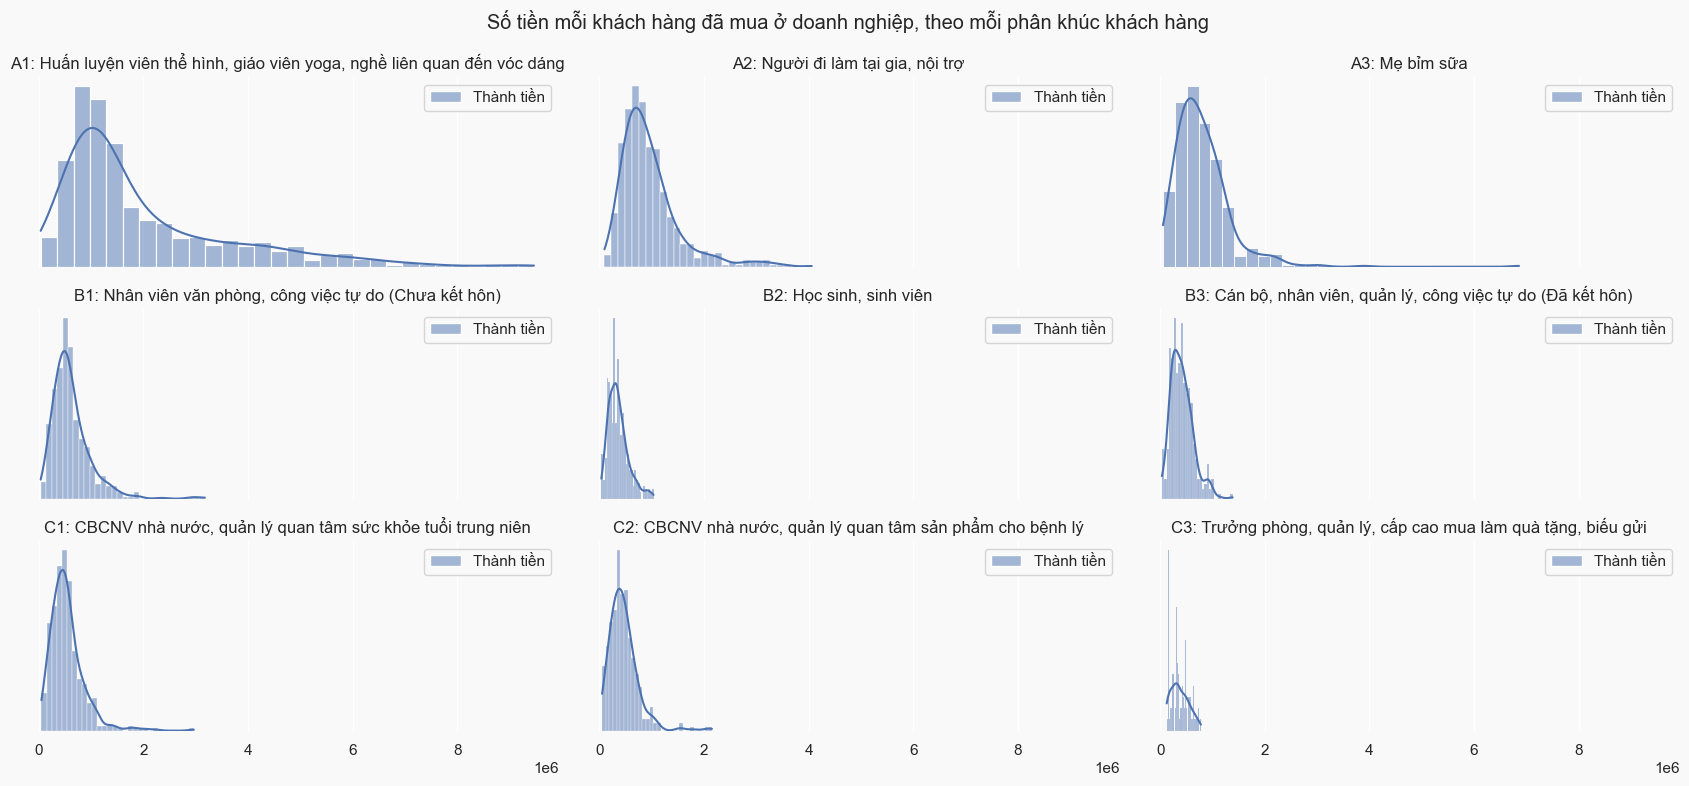

In [83]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

total_spent_segments = store.groupby(['Mã PKKH', 'Mã khách hàng'])['Thành tiền'].sum().reset_index()

categories = np.sort(store['Mã PKKH'].unique())
category_len = len(categories)
ncols = 3
nrows = math.ceil(category_len / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(17,8), sharex=True)
axes = axes.flatten()

for i, cat in enumerate(categories):
  total_spent = total_spent_segments[total_spent_segments['Mã PKKH'] == cat]
  sns.histplot(total_spent, bins=30, kde=True, color='salmon', ax=axes[i])
  axes[i].set_title(f"{cat}: {segment_description[cat]}")


  axes[i].spines[:].set_visible(False)
  # axes[i].xaxis.set_visible(False)
  axes[i].yaxis.set_visible(False)
  axes[i].tick_params(bottom=False, left=False, top=False, right=False)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

num_plots = category_len
for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes[i])

fig.suptitle('Số tiền mỗi khách hàng đã mua ở doanh nghiệp, theo mỗi phân khúc khách hàng')
plt.tight_layout()
plt.show()

**INSIGHTS:**

Khả năng chi tiêu của phân khúc A lớn hơn hẳn so với những phân khúc khác cho cửa hàng. Doanh nghiệp mang lại sản phẩm phù hợp với nhu cầu của họ.

## Phân phối về số tiền mỗi khách hàng chi tiêu cho **mỗi đơn hàng** ở doanh nghiệp

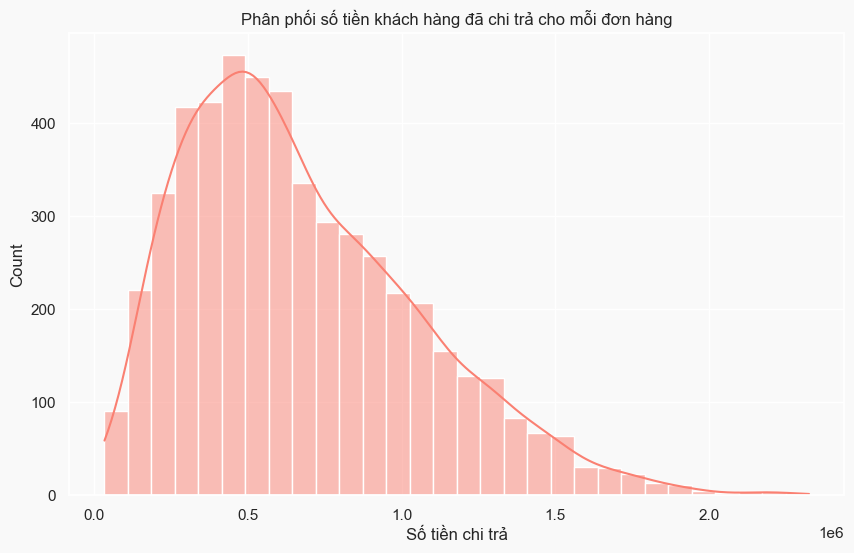

In [84]:
spending_per_order = store.groupby(['Mã khách hàng', 'Mã đơn hàng'])['Thành tiền'].sum()

plt.figure(figsize=(10, 6))
sns.histplot(spending_per_order, bins=30, kde=True, color='salmon')
plt.title('Phân phối số tiền khách hàng đã chi trả cho mỗi đơn hàng')
plt.xlabel('Số tiền chi trả')
plt.show()

## Phân phối về số tiền mỗi khách hàng chi tiêu cho **mỗi đơn hàng** ở doanh nghiệp, phân theo PKKH

In [85]:
total_spent_per_order_segments = store.groupby(['Mã PKKH', 'Mã khách hàng', 'Mã đơn hàng'])['Thành tiền'].sum().reset_index()
formatted = total_spent_per_order_segments.copy()
formatted['Thành tiền'] = formatted['Thành tiền'].apply(lambda x: f'{x:,.0f}')
formatted

Mã PKKH Mã khách hàng Mã đơn hàng Thành tiền
0         A1      CUZ00005  ORD0000005  1,795,000
1         A1      CUZ00012  ORD0000012    820,000
2         A1      CUZ00012  ORD0000608    420,000
3         A1      CUZ00012  ORD0001376    795,000
4         A1      CUZ00012  ORD0002042  1,015,000
...      ...           ...         ...        ...
5161      C3      CUZ03816  ORD0004988    510,000
5162      C3      CUZ03826  ORD0005003    450,000
5163      C3      CUZ03885  ORD0005089    425,000
5164      C3      CUZ03900  ORD0005111    645,000
5165      C3      CUZ03917  ORD0005134    485,000

[5166 rows x 4 columns]

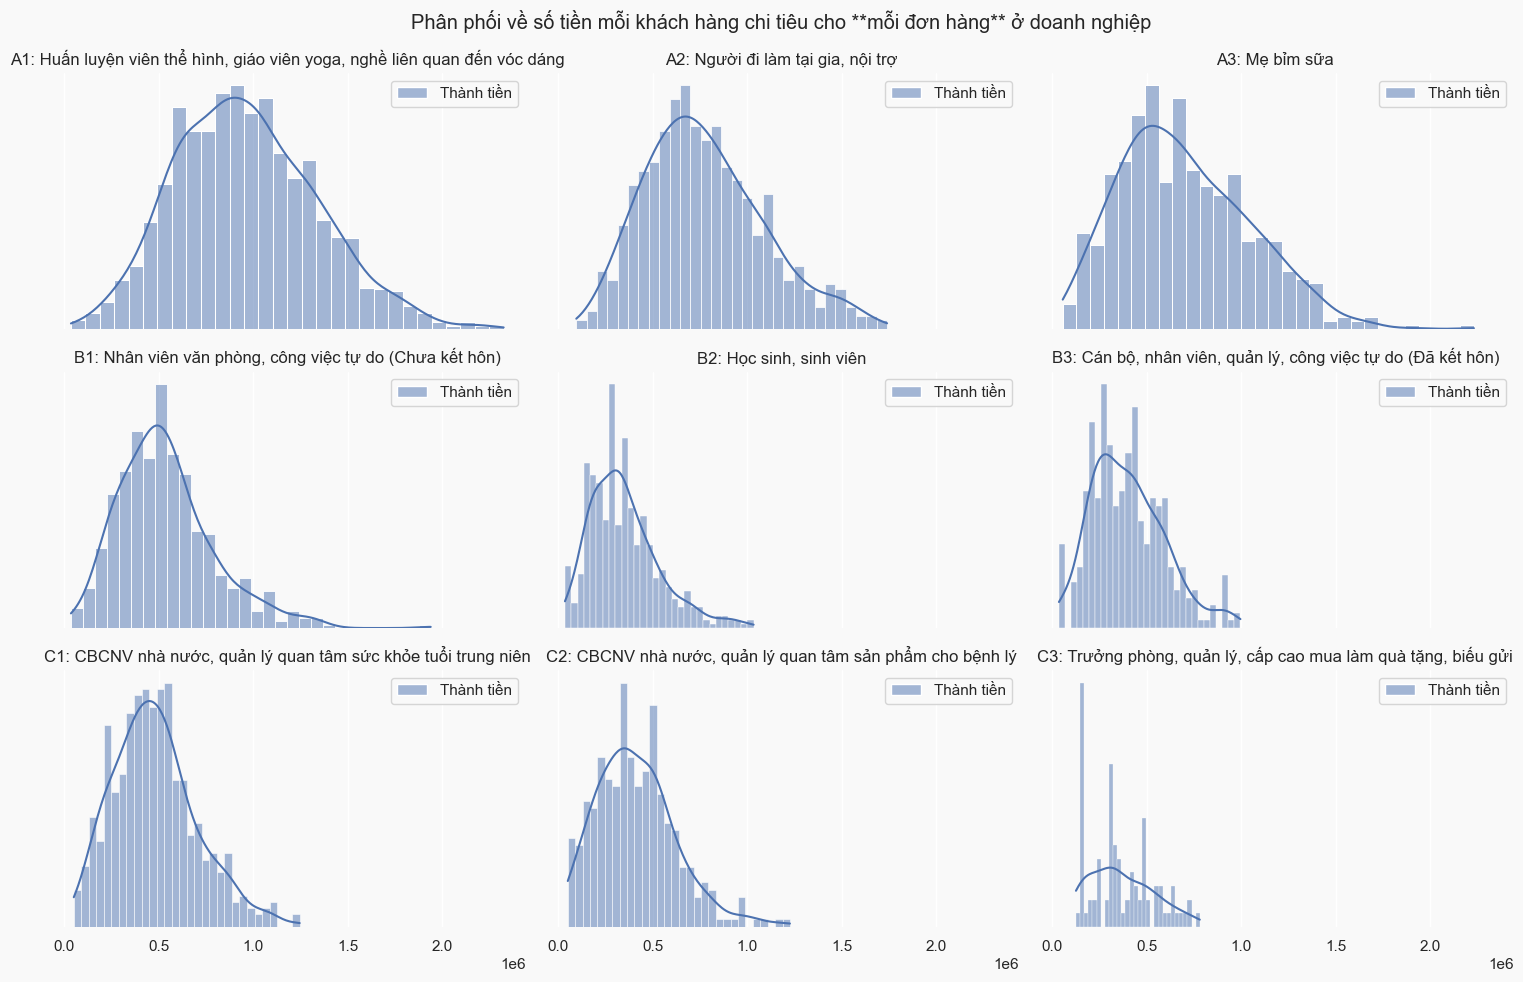

In [86]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


categories = np.sort(store['Mã PKKH'].unique())
category_len = len(categories)
ncols = 3
nrows = math.ceil(category_len / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,10), sharex=True)
axes = axes.flatten()

for i, cat in enumerate(categories):
  total_spent = total_spent_per_order_segments[total_spent_per_order_segments['Mã PKKH'] == cat]
  sns.histplot(total_spent, bins=30, kde=True, color='salmon', ax=axes[i])
  axes[i].set_title(f"{cat}: {segment_description[cat]}")


  axes[i].spines[:].set_visible(False)
  # axes[i].xaxis.set_visible(False)
  axes[i].yaxis.set_visible(False)
  axes[i].tick_params(bottom=False, left=False, top=False, right=False)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

num_plots = category_len
for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes[i])

fig.suptitle('Phân phối về số tiền mỗi khách hàng chi tiêu cho **mỗi đơn hàng** ở doanh nghiệp')
plt.tight_layout()
plt.show()

**INSIGHTS:**

Mỗi đơn hàng-wise, nhóm A cũng chi tiêu nhiều hơn, khoảng có thể chi tiêu mỗi đơn cho doanh nghiệp cũng nhiều hơn. Có thể họ muốn mua 1 lần để dùng lâu dài, thường xuyên.

--> Nên có chiến dịch khuyến khích họ quay lại.

## Năm qua, ngày nào trong tuần thường bán chạy nhất? ngày nào trong tuần thường bán kém nhất?

In [87]:
store.groupby('Weekday')['Mã đơn hàng'].nunique()

Weekday
Friday       774
Monday       668
Saturday     850
Sunday       765
Thursday     732
Tuesday      669
Wednesday    708
Name: Mã đơn hàng, dtype: int64

In [88]:
def single_plot_total_sum_by_category(df, category_column, value_column, fig_size, hilight_list, hilight_color, font_size, horizontal_bar = False):
    total_sum = df.groupby(category_column)[value_column].sum().reset_index()
    if category_column == 'Weekday':
      weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
      total_sum[category_column] = pd.Categorical(total_sum[category_column], categories=weekday_order, ordered=True)
      total_sum.sort_values(by=category_column, inplace=True)
    elif category_column == 'Month':
      total_sum = total_sum.sort_index()
    else:
      total_sum = total_sum.sort_values(by=value_column, ascending=False)

    categories = total_sum[category_column].unique()

    fig, ax = plt.subplots(figsize=fig_size, facecolor='#f9f9f9')

    colors = [hilight_color if pkkh in hilight_list else '#dedede' for pkkh in total_sum[category_column]]
    if horizontal_bar == True:
      ax.barh(total_sum[category_column], total_sum[value_column], color=colors)
    else:
      ax.bar(total_sum[category_column], total_sum[value_column], color=colors)
    ax.set_title(f'Doanh thu theo {category_column}', fontsize=font_size)
    ax.set_facecolor(color="#f9f9f9")
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    ax.tick_params(bottom=True, left=True, top=False, right=False, labelsize=font_size)
    ax.spines[:].set_visible(False)

    for bar, color in zip(ax.patches, colors):
        if color == hilight_color:
            if horizontal_bar == True:
              percentage = (bar.get_width() / df[value_column].sum()) * 100
              ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:,.1f}%', ha='left', va='center',
                    color='black', fontsize=font_size)
            else:
              percentage = (bar.get_height() / df[value_column].sum()) * 100
              ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:,.1f}%', ha='center', va='bottom',
                        color='black', fontsize=font_size)


    plt.tight_layout()
    return total_sum

### Biểu đồ 17c_Python. Doanh thu trung bình theo Ngày trong Tuần (label theo % so với tuần)

Ngày trong tuần bán chạy nhất là Saturday
    Doanh số: 576,516,000 vnđ,
    Số lượng bán được: 4282 sản phẩm.

Ngày trong tuần bán kém nhất là Tuesday
    Doanh số: 431,812,000 vnđ,
    Số lượng bán được: 3185 sản phẩm.


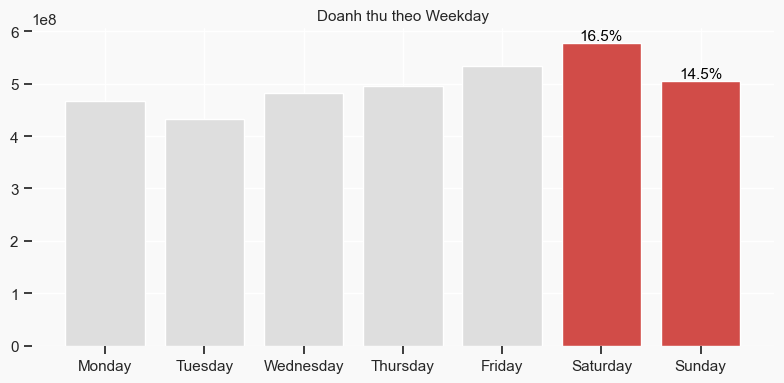

In [89]:
revenue = store.groupby(['Weekday'])['Thành tiền'].sum().reset_index()
number_products_sold = store.groupby(['Weekday'])['SL'].sum().reset_index()
merged_rev_num = pd.merge(revenue, number_products_sold, on=['Weekday'])
merged_rev_num.columns = ['Weekday',	'Doanh số', 'Số lượng bán']

best_selling_item = merged_rev_num[merged_rev_num['Doanh số'] == merged_rev_num['Doanh số'].max()]
worst_selling_item = merged_rev_num[merged_rev_num['Doanh số'] == merged_rev_num['Doanh số'].min()]

print(f"""Ngày trong tuần bán chạy nhất là {best_selling_item['Weekday'].iloc[0]}
    Doanh số: {best_selling_item['Doanh số'].iloc[0]:,} vnđ,
    Số lượng bán được: {best_selling_item['Số lượng bán'].iloc[0]} sản phẩm.""")

print()

print(f"""Ngày trong tuần bán kém nhất là {worst_selling_item['Weekday'].iloc[0]}
    Doanh số: {worst_selling_item['Doanh số'].iloc[0]:,} vnđ,
    Số lượng bán được: {worst_selling_item['Số lượng bán'].iloc[0]} sản phẩm.""")

single_plot_total_sum_by_category(df=store,
                           category_column='Weekday',
                           value_column='Thành tiền',
                           fig_size=(8, 4),
                           hilight_color='#d14c48',
                           hilight_list = ['Saturday', 'Sunday'],
                           font_size=11,
                           horizontal_bar=False)
plt.show()

**INSIGHTS:**

Thứ 7, CN có thời gian rảnh mua sắm.

Tuy nhiên mức chênh lệch không lớn so với những ngày khác do mua sắm online thuận tiện, ngày nào cũng có thể mua.

## Ngày nào trong tháng thường bán chạy nhất? ngày nào trong tháng thường bán kém nhất?

### Biểu đồ 16b_Python. Doanh thu trung bình theo Ngày trong Tháng (label theo % so với tháng)

Ngày bán chạy nhất là 9
    Doanh số: 131,866,000 vnđ,
    Số lượng bán được: 956 sản phẩm.

Ngày bán kém nhất là 31
    Doanh số: 58,649,000 vnđ,
    Số lượng bán được: 457 sản phẩm.


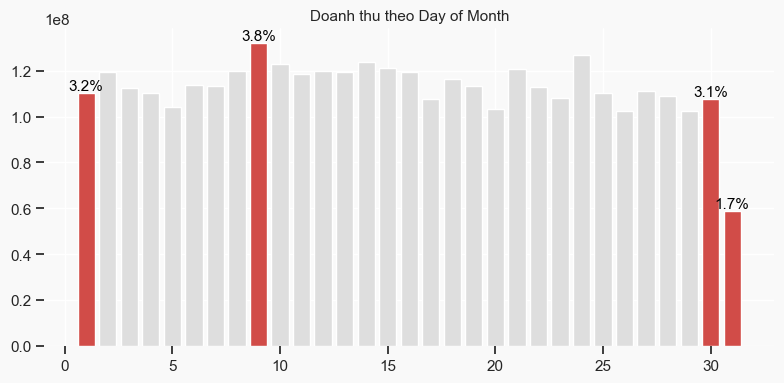

In [90]:
revenue = store.groupby(['Day of Month'])['Thành tiền'].sum().reset_index()
number_products_sold = store.groupby(['Day of Month'])['SL'].sum().reset_index()
merged_rev_num = pd.merge(revenue, number_products_sold, on=['Day of Month'])
merged_rev_num.columns = ['Day of Month',	'Doanh số', 'Số lượng bán']

best_selling_item = merged_rev_num[merged_rev_num['Doanh số'] == merged_rev_num['Doanh số'].max()]
worst_selling_item = merged_rev_num[merged_rev_num['Doanh số'] == merged_rev_num['Doanh số'].min()]

print(f"""Ngày bán chạy nhất là {best_selling_item['Day of Month'].iloc[0]}
    Doanh số: {best_selling_item['Doanh số'].iloc[0]:,} vnđ,
    Số lượng bán được: {best_selling_item['Số lượng bán'].iloc[0]} sản phẩm.""")

print()

print(f"""Ngày bán kém nhất là {worst_selling_item['Day of Month'].iloc[0]}
    Doanh số: {worst_selling_item['Doanh số'].iloc[0]:,} vnđ,
    Số lượng bán được: {worst_selling_item['Số lượng bán'].iloc[0]} sản phẩm.""")


single_plot_total_sum_by_category(df=store,
                           category_column='Day of Month',
                           value_column='Thành tiền',
                           fig_size=(8, 4),
                           hilight_color='#d14c48',
                           hilight_list = [1,9,30, 31],
                           font_size=11,
                           horizontal_bar=False)
plt.show()

**INSIGHTS:**

Đàu tháng có nhỉnh nhẹ về doanh thu, có thể do đa số mọi người mới nhận lương. Giảm nhẹ về cuối tháng. Ngày 31 thấp vì không phải tháng nào cũng có ngày 31.

## Khung giờ nào thường bán chạy nhất? khung giờ nào thường bán kém nhất?

### Biểu đồ 18c_Python. Doanh thu trung bình theo Giờ trong Ngày (label theo % so với ngày)

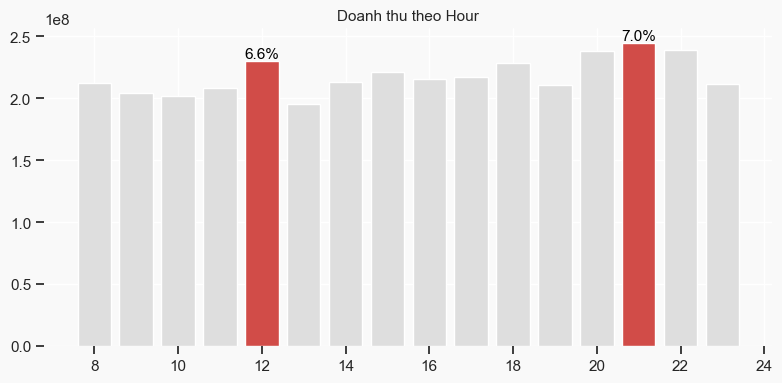

In [91]:
single_plot_total_sum_by_category(df=store,
                           category_column='Hour',
                           value_column='Thành tiền',
                           fig_size=(8, 4),
                           hilight_color='#d14c48',
                           hilight_list = [12,21],
                           font_size=11,
                          horizontal_bar=False)
plt.show()

**INSIGHTS:**

12 giờ trưa và 9 giờ tối là giờ ăn trưa, nghỉ trưa và nghỉ tối.

Assign đủ nhân viên vào những giờ cao điểm.

Chạy quảng cáo vào những giờ cao điểm, 6 khung giờ nên chạy quảng cáo: 21 giờ, 22 giờ, 20 giờ, 12 giờ, 18 giờ, 15 giờ.

In [92]:
total_sum = store.groupby('Hour')['Thành tiền'].sum().reset_index().sort_values('Thành tiền', ascending=False)
formatted = total_sum.copy()
formatted['Thành tiền'] = formatted['Thành tiền'].apply(lambda x: f'{x:,.0f}')
formatted.iloc[:6]

Hour   Thành tiền
13    21  244,244,000
14    22  238,968,000
12    20  238,232,000
4     12  229,818,000
10    18  228,695,000
7     15  220,898,000

## Nhóm hàng nào thường dễ bán nhất (có xác suất bán trên mỗi đơn hàng cao nhất)? nhóm hàng nào khó bán nhất (có xác suất bán trên mỗi đơn hàng thấp nhất)?

Nhóm hàng bán dễ nhất là [TPK] Thực phẩm khô với xác suất bán là 65.27%.
Nhóm hàng bán khó nhất là [TPK] Gia vị ăn kiêng với xác suất bán là 25.34%.


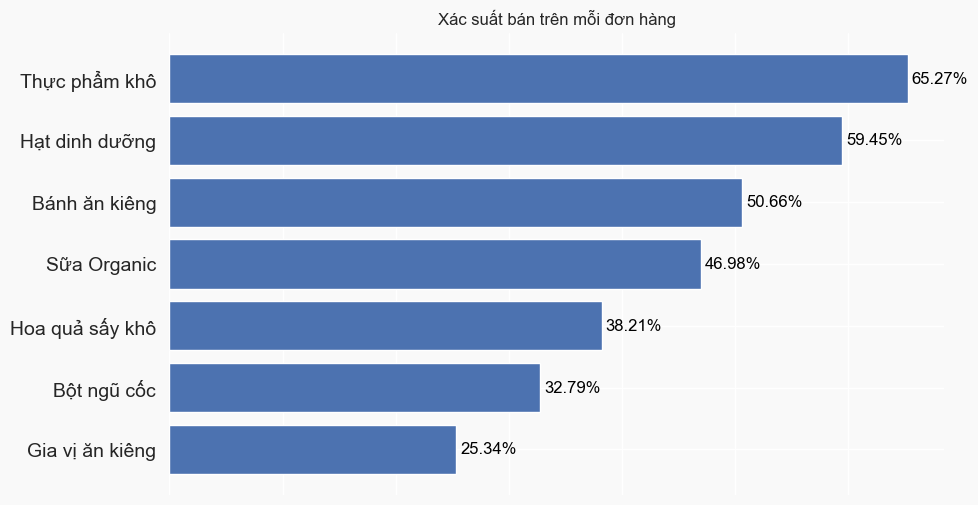

In [93]:
order_counts = store.groupby(['Mã nhóm hàng','Tên nhóm hàng'])['Mã đơn hàng'].nunique().reset_index()
order_counts.columns = ['Mã nhóm hàng', 'Tên nhóm hàng', 'Số lượng đơn hàng']
order_counts['XS'] = round(order_counts['Số lượng đơn hàng']*100/store['Mã đơn hàng'].nunique(), 2)

order_counts = order_counts.sort_values(by='XS', ascending=False).reset_index()

print(f"Nhóm hàng bán dễ nhất là [{order_counts['Mã nhóm hàng'].iloc[0]}] {order_counts['Tên nhóm hàng'].iloc[0]} với xác suất bán là {order_counts['XS'].iloc[0]}%.")
print(f"Nhóm hàng bán khó nhất là [{order_counts['Mã nhóm hàng'].iloc[0]}] {order_counts['Tên nhóm hàng'].iloc[-1]} với xác suất bán là {order_counts['XS'].iloc[-1]}%.")

# PLOT
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(order_counts['Tên nhóm hàng'], order_counts['XS'])
ax.set_title('Xác suất bán trên mỗi đơn hàng')
ax.invert_yaxis()

ax.set_xticklabels([])

ax.tick_params(bottom=False, left=False, top=False, right=False, labelsize=14)
ax.spines[:].set_visible(False)


for bar in bars:
  width = bar.get_width()
  ax.annotate(f'{width}%',
              xy=(width, bar.get_y() + bar.get_height() / 2),  # Position of the label
              xytext=(3, 0),  # Offset of the label from the position
              textcoords='offset points',
              va='center', ha='left', fontsize=12, color='black')


plt.show()

**INSIGHTS:**

Nhóm Thực phẩm khô (miến, bún,...) đứng top 4 về doanh thu nhưng lại có xác suất mua đứng đầu.

Nhóm sản phẩm này có đặc tính dùng nhiều, thường xuyên, đa dụng, phù hợp với nhiều nhóm khách hàng.

Các mặt hàng thuộc nhóm này nằm trong nhóm 0.3, 0.1 theo pareto từ biểu đồ thứ 1 của bài báo cáo này. Tuy nhiên, chính vì nhận được nhiều sự ủng hộ của khách hàng, cửa hàng chưa nên bỏ ngay các mặt hàng thuộc nhóm hàng này. Để từ các đơn mua nhóm hàng này --> **tăng traffic cho cửa hàng và thực hiện bán chéo qua những sản phẩm khác --> tăng doanh thu.**

Tuy nhiên cũng cần cân nhắc giữa chi phí bỏ ra để duy trì nhóm này so với lợi ích đạt được.

**Chi phí duy trì:** Xác suất mua cao nhưng doanh thu rank 4 --> số đơn hàng nhiều so với số doanh thu đạt được --> lượng công sức bỏ ra để gói hàng, tư vấn khách hàng lớn so với doanh thu trực tiếp đạt được.

**Lợi ích potential:** Cơ hội tăng nhận diện, bán chéo.

## Xác xuất mua hàng (trên mỗi đơn hàng) của mỗi nhóm hàng biến thiên như thế nào theo từng tháng trong năm?

### Biểu đồ 25c_Python. Xác suất xuất hiện trên đơn hàng của Nhóm hàng và Xác suất xuất hiện Mặt hàng nếu Nhóm hàng xuất hiện trên đơn, theo mùa

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\1177441955.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'Th{int(m+1)}' for m in ax.get_xticks()])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\1177441955.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(y+1)}%' for y in ax.get_yticks()])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\1177441955.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'Th{int(m+1)}' for m in ax.get_xticks()])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\1177441955.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([

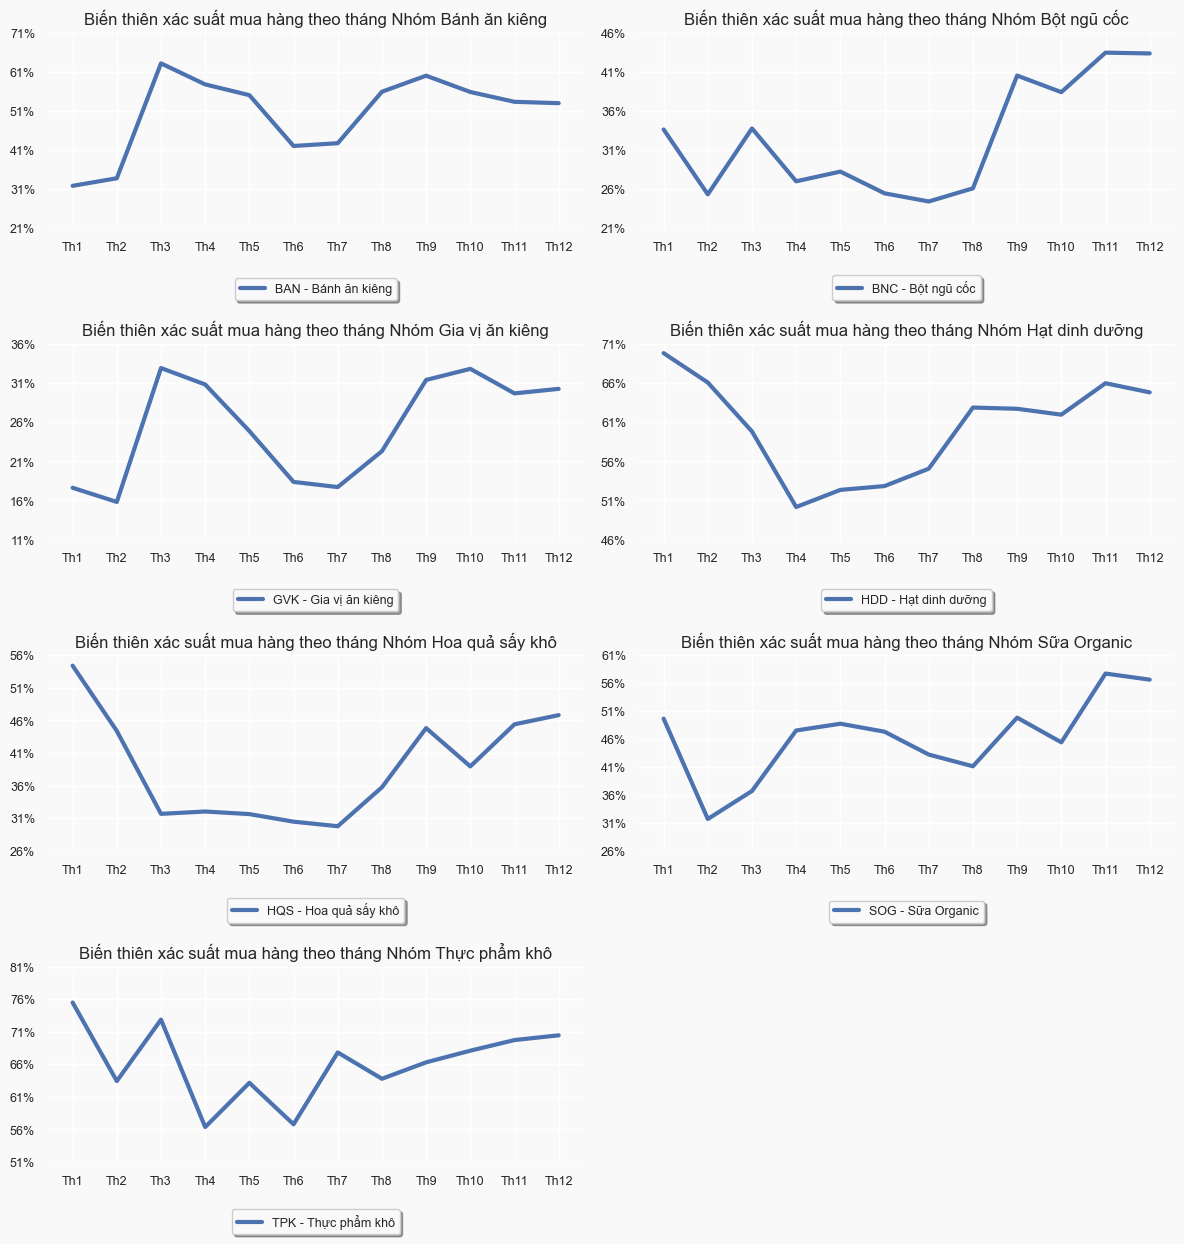

In [94]:
import warnings

# CALCULATION
total_orders_per_month = store.groupby('Month')['Mã đơn hàng'].nunique().reset_index()
total_orders_per_month.columns = ['Month', 'Tổng số đơn hàng']

unique_orders_per_group = store.groupby(['Month', 'Mã nhóm hàng', 'Tên nhóm hàng'])['Mã đơn hàng'].nunique().reset_index()
unique_orders_per_group.columns = ['Month', 'Mã nhóm hàng', 'Tên nhóm hàng', 'Số lượng đơn hàng']

order_counts_monthly = pd.merge(unique_orders_per_group, total_orders_per_month, on='Month', how='left')

order_counts_monthly['XS'] = round(order_counts_monthly['Số lượng đơn hàng'] * 100 / order_counts_monthly['Tổng số đơn hàng'], 2)

# VISUALIZATION
categories = np.sort(store['Mã PKKH'].unique())
category_len = len(categories)
ncols = 2
nrows = math.ceil(category_len / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 15))

axes = axes.flatten()
product_group_ids = order_counts_monthly['Mã nhóm hàng'].unique()


for i, product_group_id in enumerate(product_group_ids):
    data_subset = order_counts_monthly[order_counts_monthly['Mã nhóm hàng'] == product_group_id]
    ax = axes[i]

    for group, data in data_subset.groupby(['Mã nhóm hàng', 'Tên nhóm hàng']):
        ax.plot(data['Month'], data['XS'], label=f"{group[0]} - {group[1]}", linewidth=3)

    ax.set_title(f'Biến thiên xác suất mua hàng theo tháng Nhóm {group[1]}')
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), shadow=True, ncol=2, fontsize=9)

    warnings.filterwarnings("ignore", message="FixedFormatter should only be used together with FixedLocator")
    ax.set_xticklabels([f'Th{int(m+1)}' for m in ax.get_xticks()])
    ax.set_yticklabels([f'{int(y+1)}%' for y in ax.get_yticks()])
    ax.set_yticks(ax.get_yticks())

    ax.spines[:].set_visible(False)
    # ax.xaxis.set_visible(False)
    # ax.yaxis.set_visible(False)
    ax.tick_params(bottom=False, left=False, top=False, right=False, labelsize=9)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hide any unused subplots
for i in range(len(product_group_ids), nrows*ncols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**INSIGHTS:**

Với nhóm HDD và Hoa quả sấy, đây là những sản phẩm có thể dùng cho dịp Tết --> khách hàng mua nhiều cho Tết nếu có mua --> qua Tết (tháng 3, 4) vẫn còn nhiều thức ăn Tết nên chưa mua lại. KH prolly mua HDD và HQS ở chỗ khác nữa nên còn nhiều và chưa có nhu cầu quay thêm những sản phẩm này lại vào giỏ hàng sau Tết.

Bột ngũ cốc thường có supply nhiều vào cuối hạ, thu --> cung nhiều --> campaign bán --> add to cart nhiều hơn.

## Năm qua, đối với từng nhóm hàng thì mặt hàng nào thường dễ bán nhất (có xác suất bán trên mỗi đơn hàng cao nhất)? mặt hàng nào khó bán nhất (có xác suất bán trên mỗi đơn hàng thấp nhất)?

### Biểu đồ 28_Python. Xác suất xuất hiện Mặt hàng nếu Nhóm hàng xuất hiện trên đơn, theo Nhóm hàng

Đối với nhóm hàng TPK - Thực phẩm khô
+ Mặt hàng bán dễ nhất là [TPK02] Bún gạo lứt với xác xuất bán (mặt hàng/nhóm hàng) là 34.55% .
+ Mặt hàng bán khó nhất là [TPK01] Miến rau câu keto với xác xuất bán (mặt hàng/nhóm hàng) là 25.12% .

Đối với nhóm hàng HDD - Hạt dinh dưỡng
+ Mặt hàng bán dễ nhất là [HDD01] Granola với xác xuất bán (mặt hàng/nhóm hàng) là 72.32% .
+ Mặt hàng bán khó nhất là [HDD03] Hạt chia Úc với xác xuất bán (mặt hàng/nhóm hàng) là 24.62% .

Đối với nhóm hàng BAN - Bánh ăn kiêng
+ Mặt hàng bán dễ nhất là [BAN02] Bánh Biscotti với xác xuất bán (mặt hàng/nhóm hàng) là 36.99% .
+ Mặt hàng bán khó nhất là [BAN03] Bánh chuối yến mạch với xác xuất bán (mặt hàng/nhóm hàng) là 14.25% .

Đối với nhóm hàng SOG - Sữa Organic
+ Mặt hàng bán dễ nhất là [SOG05] Sữa gạo Hàn Quốc với xác xuất bán (mặt hàng/nhóm hàng) là 30.7% .
+ Mặt hàng bán khó nhất là [SOG01] Sữa Tươi Hữu Cơ TH True Milk Organic với xác xuất bán (mặt hàng/nhóm hàng) là 18.38% .

Đối với nhóm hàng HQS - Hoa quả 

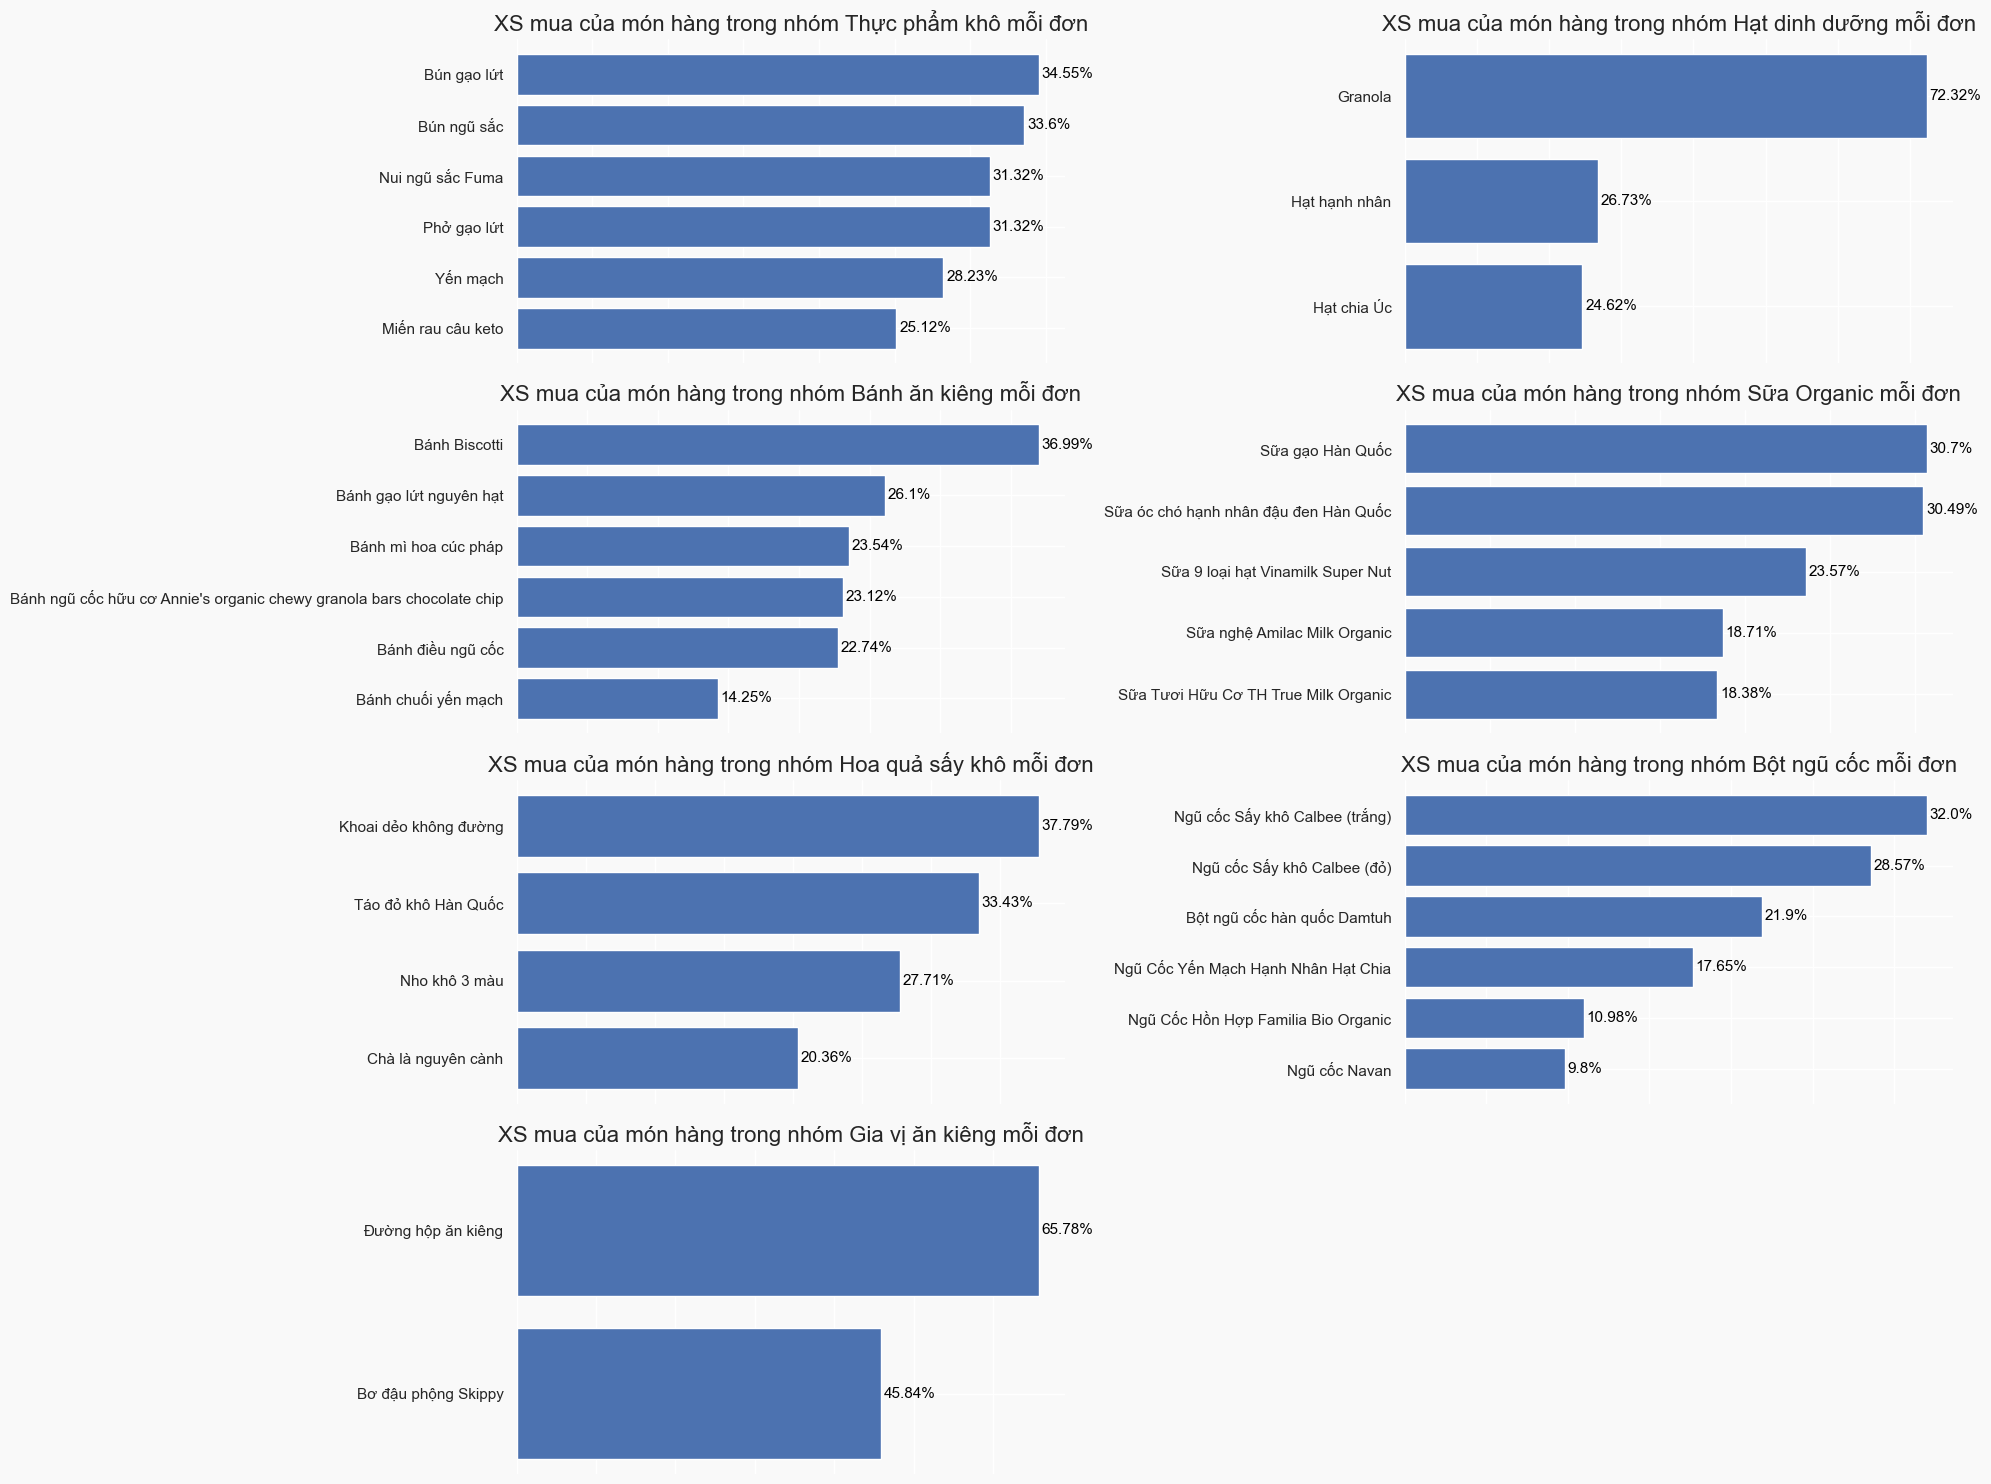

In [95]:
unique_group_names = order_counts['Tên nhóm hàng'].unique()

num_cols = 2

num_rows = math.ceil(len(unique_group_names) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)

for i, group_name in enumerate(unique_group_names):
    row = i // num_cols
    col = i % num_cols

    group_data = store[store['Tên nhóm hàng'] == group_name]

    item_counts = group_data.groupby(['Mã mặt hàng','Tên mặt hàng'])['Mã đơn hàng'].nunique().reset_index()
    item_counts.columns = ['Mã mặt hàng','Tên mặt hàng', 'Số lượng đơn hàng']

    item_counts['pct_item_purchased_in_category'] = round(item_counts['Số lượng đơn hàng'] * 100 / group_data['Mã đơn hàng'].nunique(), 2)

    item_counts = item_counts.sort_values(by='pct_item_purchased_in_category', ascending=False).reset_index()

    product_group_id = order_counts.loc[order_counts['Tên nhóm hàng'] == group_name, 'Mã nhóm hàng'].iloc[0]

    print(f'Đối với nhóm hàng {product_group_id} - {group_name}')
    if group_name == 'Bột':
      print('+ Chỉ có một mặt hàng.')
    else:

      print(f"+ Mặt hàng bán dễ nhất là [{item_counts['Mã mặt hàng'].iloc[0]}] {item_counts['Tên mặt hàng'].iloc[0]} với xác xuất bán (mặt hàng/nhóm hàng) là {item_counts['pct_item_purchased_in_category'].iloc[0]}% .")
      print(f"+ Mặt hàng bán khó nhất là [{item_counts['Mã mặt hàng'].iloc[-1]}] {item_counts['Tên mặt hàng'].iloc[-1]} với xác xuất bán (mặt hàng/nhóm hàng) là {item_counts['pct_item_purchased_in_category'].iloc[-1]}% .")
    print()
    ax = axes[row, col]
    bars = ax.barh(item_counts['Tên mặt hàng'], item_counts['pct_item_purchased_in_category'])

    ax.set_title(f'XS mua của món hàng trong nhóm {group_name} mỗi đơn', fontsize=16)
    ax.invert_yaxis()
    ax.set_xticklabels([])

    ax.tick_params(bottom=False, left=False, top=False, right=False, labelsize=11)
    ax.spines[:].set_visible(False)
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width}%',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(num_cols, 0),
                    textcoords='offset points',
                    va='center', ha='left', fontsize=11, color='black')

# Hide empty subplots
for i in range(len(unique_group_names), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

**INSIGHTS:**

**Thực phẩm khô**

Sự ưa thích cho các mặt hàng trong nhóm này khá đồng đều. Nguyên nhân có thể do giữa các mặt hàng không có sự khác biệt lớn về chất lượng, công dụng và độ 'quen mặt' với khách hàng.


**Hạt dinh dưỡng**

Đối với nhóm này, granola vẫn là mặt hàng được yêu thích nhất vì mang đến hương vị đa dạng hơn so với chỉ 1 loại hạt.


**Bánh ăn kiêng**

Biscotti nổi tiếng hơn, có xác suất được mua out of this product category nổi bật. Bánh chuối yến mạch có lẽ vì shelf life thấp và không phù hợp với thị hiếu thị trường nên ko đc ưa chuộng.

**Sữa organic**

Trong nhóm sữa, sữa HQ nhận được sự ưa thích lớn, có thể vì hương vị thơm ngon và thiết kế bắt mắt hơn. Tỉ lệ chọn sữa nghệ cũng thấp hơn. Chứng tỏ sữa nghệ ít phổ biến hơn so với những loại sữa khác. Tuy nhiên chúng ta biết ở trên là sữa nghệ lại mang lại doanh thu lớn --> *nên market mặt hàng này thêm vì có tiềm năng.*


**Gia vị ăn kiêng**

Trong nhóm này, đường ăn kiêng là một gia vị dùng nhiều, thường xuyên mua lại, hoặc nhìn chung là được yêu thích hơn so với bơ đậu Skippy.

## Xác xuất mua hàng (trên mỗi đơn hàng) của mỗi mặt hàng trong mỗi nhóm hàng biến thiên như thế nào theo từng tháng trong năm?

### Biểu đồ 29_Python. Xác suất xuất hiện Mặt hàng nếu Nhóm hàng xuất hiện trên đơn qua từng tháng, theo Nhóm hàng

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\2092134186.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'Th{int(m+1)}' for m in ax.get_xticks()])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\2092134186.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(y+1)}%' for y in ax.get_yticks()])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\2092134186.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'Th{int(m+1)}' for m in ax.get_xticks()])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\2092134186.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([

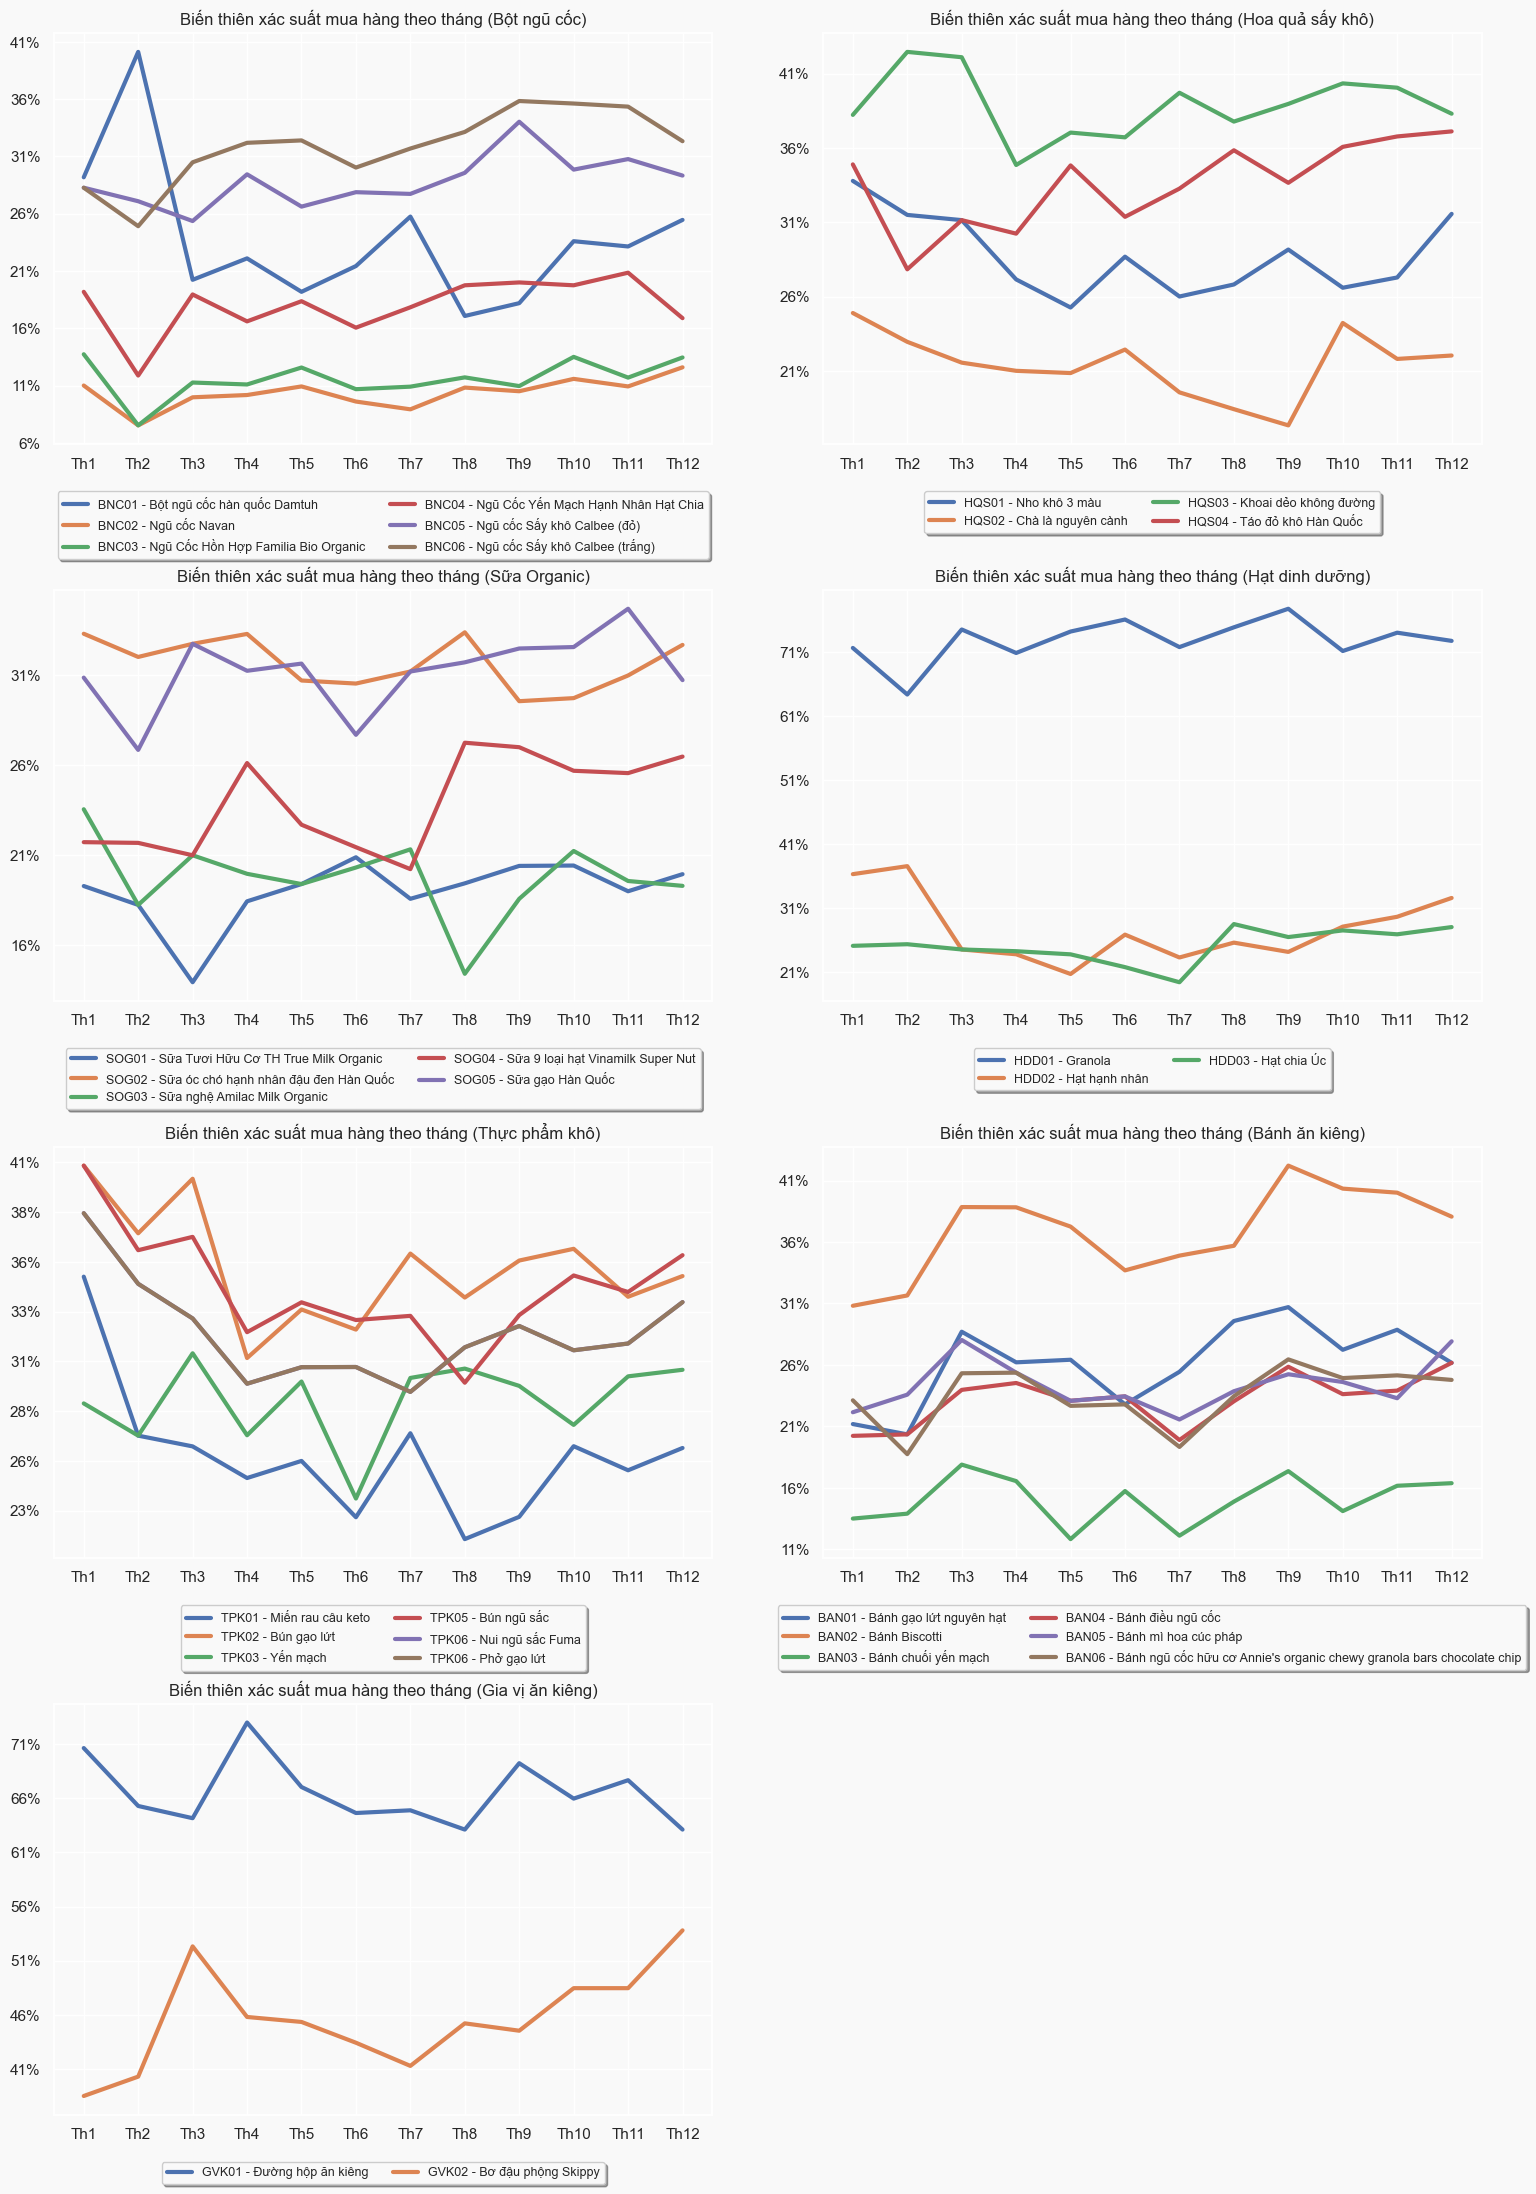

In [96]:
import warnings
unique_group_names = store['Tên nhóm hàng'].unique()

col = 2
row = math.ceil(len(unique_group_names) / col)

fig, axes = plt.subplots(row, col, figsize=(16, 22))
fig.subplots_adjust(hspace=0.5)

for i, group_name in enumerate(unique_group_names):
    r = i // col
    c = i % col

    df = store[store['Tên nhóm hàng'] == group_name]

    total_orders_per_month = df.groupby('Month')['Mã đơn hàng'].nunique().reset_index()
    total_orders_per_month.columns = ['Month', 'Tổng số đơn hàng']

    unique_orders_per_group = df.groupby(['Month', 'Mã mặt hàng', 'Tên mặt hàng'])['Mã đơn hàng'].nunique().reset_index()
    unique_orders_per_group.columns = ['Month', 'Mã mặt hàng', 'Tên mặt hàng', 'Số lượng đơn hàng']

    order_counts_monthly = pd.merge(unique_orders_per_group, total_orders_per_month, on='Month', how='left')

    order_counts_monthly['XS'] = round(order_counts_monthly['Số lượng đơn hàng'] * 100 / order_counts_monthly['Tổng số đơn hàng'], 2)

    ax = axes[r, c]

    for group, data in order_counts_monthly.groupby(['Mã mặt hàng', 'Tên mặt hàng']):
        ax.plot(data['Month'], data['XS'], label=f"{group[0]} - {group[1]}", linewidth=3)

    ax.set_title(f'Biến thiên xác suất mua hàng theo tháng ({group_name})')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2, fontsize=9)

    warnings.filterwarnings("ignore", message="FixedFormatter should only be used together with FixedLocator")
    ax.set_xticklabels([f'Th{int(m+1)}' for m in ax.get_xticks()])
    ax.set_yticklabels([f'{int(y+1)}%' for y in ax.get_yticks()])

for i in range(len(unique_group_names), row * col):
    r = i // col
    c = i % col
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()


## Tỷ lệ khách hàng của mỗi phân khúc muốn mua nhóm hàng này

In [97]:
pct_buying = store.groupby(['Mã PKKH', 'Mã nhóm hàng'])['Mã khách hàng'].nunique().reset_index()
segment_size = store.groupby('Mã PKKH')['Mã khách hàng'].nunique().reset_index()

pct_buying = pd.merge(pct_buying, segment_size, on='Mã PKKH', suffixes=('', '_total'))

pct_buying['pct_buying'] = round(pct_buying['Mã khách hàng'] / pct_buying['Mã khách hàng_total'], 2)
pct_buying.drop(columns=['Mã khách hàng', 'Mã khách hàng_total'], inplace=True)

pct_buying.sort_values(by=['Mã PKKH', 'Mã nhóm hàng'], inplace=True)
pct_buying


Mã PKKH Mã nhóm hàng  pct_buying
0       A1          BAN        0.88
1       A1          BNC        0.57
2       A1          GVK        0.63
3       A1          HDD        0.88
4       A1          HQS        0.63
5       A1          SOG        0.61
6       A1          TPK        0.83
7       A2          BAN        0.54
8       A2          BNC        0.60
9       A2          GVK        0.38
10      A2          HDD        0.52
11      A2          HQS        0.45
12      A2          SOG        0.59
13      A2          TPK        0.89
14      A3          BAN        0.45
15      A3          BNC        0.45
16      A3          GVK        0.19
17      A3          HDD        0.46
18      A3          HQS        0.37
19      A3          SOG        0.53
20      A3          TPK        0.84
21      B1          BAN        0.50
22      B1          BNC        0.09
23      B1          GVK        0.11
24      B1          HDD        0.59
25      B1          HQS        0.54
26      B1          SOG        0.53
27      B1          TPK        0.70
28      B2          BAN        0.33
29      B2          GVK        0.04
30      B2          HDD        0.61
31      B2          HQS        0.39
32      B2          SOG        0.35
33      B2          TPK        0.35
34      B3          BAN        0.41
35      B3          BNC        0.05
36      B3          HDD        0.56
37      B3          HQS        0.55
38      B3          SOG        0.36
39      B3          TPK        0.28
40      C1          BAN        0.25
41      C1          BNC        0.43
42      C1          GVK        0.18
43      C1          HDD        0.46
44      C1          HQS        0.13
45      C1          SOG        0.58
46      C1          TPK        0.64
47      C2          BAN        0.12
48      C2          BNC        0.42
49      C2          GVK        0.12
50      C2          HDD        0.40
51      C2          HQS        0.09
52      C2          SOG        0.55
53      C2          TPK        0.60
54      C3          BAN        0.03
55      C3          BNC        0.34
56      C3          HDD        0.56
57      C3          HQS        0.22
58      C3          SOG        0.46

In [98]:
heatmap = store.groupby(['Mã PKKH', 'Mã mặt hàng'])['Mã khách hàng'].nunique().reset_index()
segment_size = store.groupby('Mã PKKH')['Mã khách hàng'].nunique().reset_index()

heatmap = pd.merge(heatmap, segment_size, on='Mã PKKH', suffixes=('', '_total'))

heatmap['percentage'] = round(heatmap['Mã khách hàng'] / heatmap['Mã khách hàng_total'], 2)
heatmap.drop(columns=['Mã khách hàng', 'Mã khách hàng_total'], inplace=True)

heatmap.sort_values(by=['Mã PKKH', 'Mã mặt hàng'], inplace=True)
heatmap


Mã PKKH Mã mặt hàng  percentage
0        A1       BAN01        0.44
1        A1       BAN02        0.53
2        A1       BAN03        0.27
3        A1       BAN04        0.36
4        A1       BAN05        0.27
..      ...         ...         ...
242      C3       SOG01        0.08
243      C3       SOG02        0.18
244      C3       SOG03        0.04
245      C3       SOG04        0.19
246      C3       SOG05        0.10

[247 rows x 3 columns]

In [99]:
heatmap.to_csv('../data/heatmap.csv', index=False)

In [100]:
print(len(heatmap[heatmap['Mã PKKH'].str.contains('A')]))
print(len(heatmap[heatmap['Mã PKKH'].str.contains('B')]))
print(len(heatmap[heatmap['Mã PKKH'].str.contains('C')]))

93
81
73


In [101]:
test = store.groupby(['Mã PKKH', 'Mã mặt hàng'])['Mã khách hàng'].nunique().reset_index()

for i in ['A', 'C', 'B']:
    for j in (1,2,3):
        print(i+str(j),":", set(test['Mã mặt hàng'][test['Mã PKKH'].str.contains(i+str(j))].unique()))

A1 : {'SOG04', 'TPK01', 'GVK02', 'TPK03', 'BAN04', 'SOG05', 'BAN02', 'HDD02', 'BNC05', 'HDD01', 'HQS03', 'SOG02', 'HDD03', 'BAN06', 'BAN03', 'BNC04', 'GVK01', 'SOG01', 'BNC02', 'TPK06', 'BNC06', 'HQS02', 'BNC01', 'HQS01', 'BNC03', 'TPK02', 'BAN01', 'TPK05', 'SOG03', 'HQS04', 'BAN05'}
A2 : {'SOG04', 'TPK01', 'GVK02', 'TPK03', 'BAN04', 'SOG05', 'BAN02', 'HDD02', 'BNC05', 'HDD01', 'HQS03', 'SOG02', 'HDD03', 'BAN06', 'BAN03', 'BNC04', 'GVK01', 'SOG01', 'BNC02', 'TPK06', 'BNC06', 'HQS02', 'BNC01', 'HQS01', 'BNC03', 'TPK02', 'BAN01', 'TPK05', 'SOG03', 'HQS04', 'BAN05'}
A3 : {'SOG04', 'TPK01', 'GVK02', 'TPK03', 'BAN04', 'SOG05', 'BAN02', 'HDD02', 'BNC05', 'HDD01', 'HQS03', 'SOG02', 'HDD03', 'BAN06', 'BAN03', 'BNC04', 'GVK01', 'SOG01', 'BNC02', 'TPK06', 'BNC06', 'HQS02', 'BNC01', 'HQS01', 'BNC03', 'TPK02', 'BAN01', 'TPK05', 'SOG03', 'HQS04', 'BAN05'}
C1 : {'SOG04', 'TPK01', 'GVK02', 'TPK03', 'BAN04', 'SOG05', 'BAN02', 'HDD02', 'BNC05', 'HDD01', 'HQS03', 'SOG02', 'HDD03', 'BAN06', 'BAN03', 'BNC

In [102]:
import pandas as pd

# Assuming 'store' is your original DataFrame

# Step 1: Calculate the number of unique customers for each combination of 'Mã PKKH', 'Mã mặt hàng', and 'Tên mặt hàng'
heatmap = store.groupby(['Mã PKKH', 'Mã mặt hàng', 'Tên mặt hàng'])['Mã khách hàng'].nunique().reset_index()

# Step 2: Calculate the total number of unique customers for each 'Mã PKKH'
segment_size = store.groupby('Mã PKKH')['Mã khách hàng'].nunique().reset_index()

# Step 3: Rename the columns for clarity
segment_size.rename(columns={'Mã khách hàng': 'Mã khách hàng_total'}, inplace=True)

# Step 4: Merge the two DataFrames to get the total number of unique customers in each segment
heatmap = pd.merge(heatmap, segment_size, on='Mã PKKH')

# Step 5: Calculate the percentage
heatmap['percentage'] = round(heatmap['Mã khách hàng'] / heatmap['Mã khách hàng_total'], 2)

# Step 6: Drop the unnecessary columns
heatmap.drop(columns=['Mã khách hàng', 'Mã khách hàng_total'], inplace=True)

# Step 7: Create a DataFrame with all possible combinations of 'Mã PKKH' and 'Mã mặt hàng', 'Tên mặt hàng'
unique_pkkh = store['Mã PKKH'].unique()
unique_mat_hang = store[['Mã mặt hàng', 'Tên mặt hàng']].drop_duplicates()

# Using merge with how='cross' to get all combinations of 'Mã PKKH' and 'Mã mặt hàng', 'Tên mặt hàng'
all_combinations = pd.merge(pd.DataFrame(unique_pkkh, columns=['Mã PKKH']), unique_mat_hang, how='cross')

# Step 8: Merge all combinations with the heatmap DataFrame to fill missing combinations with NaN
heatmap = pd.merge(all_combinations, heatmap, on=['Mã PKKH', 'Mã mặt hàng', 'Tên mặt hàng'], how='left')

# Step 9: Fill NaN values in the 'percentage' column with 0
heatmap['percentage'].fillna(0, inplace=True)

# Step 10: Sort the DataFrame by 'Mã PKKH' and 'Mã mặt hàng', 'Tên mặt hàng'
heatmap.sort_values(by=['Mã PKKH', 'Mã mặt hàng', 'Tên mặt hàng'], inplace=True)

# Printing the counts for 'Mã PKKH' containing 'A', 'B', and 'C'
print(len(heatmap[heatmap['Mã PKKH'].str.contains('A')]))
print(len(heatmap[heatmap['Mã PKKH'].str.contains('B')]))
print(len(heatmap[heatmap['Mã PKKH'].str.contains('C')]))

heatmap
heatmap.to_csv('../data/heatmap.csv', index=False)


96
96
96


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\1353545137.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heatmap['percentage'].fillna(0, inplace=True)


In [103]:
import pandas as pd

# Assuming 'store' is your original DataFrame

# Step 1: Calculate the number of unique customers for each combination of 'Mã PKKH', 'Mã mặt hàng', and 'Tên mặt hàng'
heatmap = store.groupby(['Mã PKKH', 'Mã mặt hàng', 'Tên mặt hàng'])['Mã khách hàng'].nunique().reset_index()

# Step 2: Calculate the total number of unique customers for each 'Mã PKKH'
segment_size = store.groupby('Mã PKKH')['Mã khách hàng'].nunique().reset_index()

# Step 3: Rename the columns for clarity
segment_size.rename(columns={'Mã khách hàng': 'Mã khách hàng_total'}, inplace=True)

# Step 4: Merge the two DataFrames to get the total number of unique customers in each segment
heatmap = pd.merge(heatmap, segment_size, on='Mã PKKH')

# Step 5: Calculate the percentage
heatmap['percentage'] = round(heatmap['Mã khách hàng'] / heatmap['Mã khách hàng_total'], 2)

# Step 6: Drop the unnecessary columns
heatmap.drop(columns=['Mã khách hàng', 'Mã khách hàng_total'], inplace=True)

# Step 7: Create a DataFrame with all possible combinations of 'Mã PKKH' and 'Mã mặt hàng', 'Tên mặt hàng'
unique_pkkh = store['Mã PKKH'].unique()
unique_mat_hang = store[['Mã mặt hàng', 'Tên mặt hàng']].drop_duplicates()

# Using merge with how='cross' to get all combinations of 'Mã PKKH' and 'Mã mặt hàng', 'Tên mặt hàng'
all_combinations = pd.merge(pd.DataFrame(unique_pkkh, columns=['Mã PKKH']), unique_mat_hang, how='cross')

# Step 8: Merge all combinations with the heatmap DataFrame to fill missing combinations with NaN
heatmap = pd.merge(all_combinations, heatmap, on=['Mã PKKH', 'Mã mặt hàng', 'Tên mặt hàng'], how='left')

# Step 9: Fill NaN values in the 'percentage' column with 0
heatmap['percentage'].fillna(0, inplace=True)

# Step 10: Sort the DataFrame by 'Mã PKKH' and 'Mã mặt hàng', 'Tên mặt hàng'
heatmap.sort_values(by=['Mã PKKH', 'Mã mặt hàng', 'Tên mặt hàng'], inplace=True)

# Step 11: Merge the 'Mô tả Phân Khúc Khách hàng' column from the 'store' DataFrame to the 'heatmap' DataFrame
heatmap = pd.merge(heatmap, store[['Mã PKKH', 'Mô tả Phân Khúc Khách hàng']], on='Mã PKKH', how='left')

# Step 12: Drop duplicate rows
heatmap.drop_duplicates(inplace=True)

# Step 13: Reorder the columns for clarity
heatmap = heatmap[['Mã PKKH', 'Mô tả Phân Khúc Khách hàng', 'Mã mặt hàng', 'Tên mặt hàng', 'percentage']]

# Printing the counts for 'Mã PKKH' containing 'A', 'B', and 'C' after merging
print(len(heatmap[heatmap['Mã PKKH'].str.contains('A')]))
print(len(heatmap[heatmap['Mã PKKH'].str.contains('B')]))
print(len(heatmap[heatmap['Mã PKKH'].str.contains('C')]))

# Writing the final DataFrame to CSV
heatmap
heatmap.to_csv('../data/heatmap.csv', index=False)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25140\4032090247.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heatmap['percentage'].fillna(0, inplace=True)


96
96
96


In [104]:
store.columns

Index(['Thời gian tạo đơn', 'Mã đơn hàng', 'Mã khách hàng', 'Tên khách hàng',
       'Mã PKKH', 'Mô tả Phân Khúc Khách hàng', 'Mã nhóm hàng',
       'Tên nhóm hàng', 'Mã mặt hàng', 'Tên mặt hàng', 'SL', 'Đơn giá',
       'Thành tiền', 'Year', 'Month', 'Day of Month', 'Date', 'Weekday',
       'Time', 'Hour', 'customer status'],
      dtype='object')